# 0. INTORDUCTION: TRIP & TRAVEL CUSTOMER RECOMMENDATIONS MODEL

![App Platorm](https://holidayturn.com/wp-content/uploads/2017/09/International-travel.jpg)

## Problem Given:
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Goals:
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Dataset Feature Descriptions:
* `CustomerID`               : Unique customer ID
* `ProdTaken`                : Whether or not the customer bought a product
* `Age`                      : Customer age
* `TypeofContact`            : How was the customer contacted
* `CityTier`                 : City tier depends on the development of a city, population, facilities, and living standards
* `DurationOfPitch`          : Duration of the pitch by a salesperson to the customer
* `Occupation`               : Occupation of customer
* `Gender`                   : Gender of customer
* `NumberOfPersonVisiting`   : Total number of persons planning to take the trip with the customer
* `NumberOfFollowups`        : Total number of follow-ups has been done by the salesperson after the sales pitch
* `ProductPitched`           : Product pitched by the salesperson
* `PreferredPropertyStar`    : Preferred hotel property rating by customer
* `MaritalStatus`            : Marital status of customer
* `NumberOfTrips`            : Average number of trips in a year by customer
* `Passport`                 : If customer has passport or not
* `PitchSatisfactionScore`   : Sales pitch satisfaction score
* `OwnCar`                   : Does the customer own a car
* `NumberOfChildrenVisiting` : Number of children traveling with the customer
* `Designation`              : Designation of the customer in the current organization
* `MonthlyIncome`            : Gross monthly income of the customer

# 1. Load Dataset

In [102]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('Travel.csv')

display(df.head())

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

# 2. Dataset Basic Info

## 2.1. Feature Information

In [104]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

None

**Insight:**

1. Data contains 20 columns and 4888 rows
2. Some data has missing values, but not really a big number (Age, TypeofContact, DurationOfPitch, ...).
3. Dtypes of the features doesn't really represent the real type of data yet. for example: CityTier, as from the origin, is Ordinal Category, but represented as Integer. This could be a further problem since Machine can not recognize real meanings of data types.

In [105]:
#list of numerical columns
#descrete numerical columns
dnum_col = [
    'NumberOfPersonVisiting',
    'NumberOfFollowups',
    'NumberOfTrips',
    'PitchSatisfactionScore',
    'NumberOfChildrenVisiting',
]

#continuous numerical columns
cnum_col = [
    'Age',
    'DurationOfPitch',
    'MonthlyIncome'
]

#list of categorical columns
ncat_col = [
    'CustomerID',
    'Occupation',
    'Gender',
    'TypeofContact',
    'MaritalStatus',
    'Passport',
    'OwnCar'
]

ocat_col = [
    'ProductPitched',
    'CityTier',
    'PreferredPropertyStar',
    'Designation'
]

#target column
target_col = ['ProdTaken']


#total numerical column
num_col = dnum_col + cnum_col
#total categorical column
cat_col = ncat_col + ocat_col

In [106]:
#see the statistical describtion of numerical columns
num_df = df[dnum_col+cnum_col].copy()
num_df.describe().T

count          mean          std     min      25%  \
NumberOfPersonVisiting    4888.0      2.905074     0.724891     1.0      2.0   
NumberOfFollowups         4843.0      3.708445     1.002509     1.0      3.0   
NumberOfTrips             4748.0      3.236521     1.849019     1.0      2.0   
PitchSatisfactionScore    4888.0      3.078151     1.365792     1.0      2.0   
NumberOfChildrenVisiting  4822.0      1.187267     0.857861     0.0      1.0   
Age                       4662.0     37.622265     9.316387    18.0     31.0   
DurationOfPitch           4637.0     15.490835     8.519643     5.0      9.0   
MonthlyIncome             4655.0  23619.853491  5380.698361  1000.0  20346.0   

                              50%      75%      max  
NumberOfPersonVisiting        3.0      3.0      5.0  
NumberOfFollowups             4.0      4.0      6.0  
NumberOfTrips                 3.0      4.0     22.0  
PitchSatisfactionScore        3.0      4.0      5.0  
NumberOfChildrenVisiting      1.0      2.0      3.0  
Age                          36.0     44.0     61.0  
DurationOfPitch              13.0     20.0    127.0  
MonthlyIncome             22347.0  25571.0  98678.0

In [107]:
#see the statistical describtion of categorical columns
cat_df = df[ncat_col + ocat_col].copy().astype('str')
cat_df.describe().T

count unique           top  freq
CustomerID             4888   4888        200000     1
Occupation             4888      4      Salaried  2368
Gender                 4888      3          Male  2916
TypeofContact          4888      3  Self Enquiry  3444
MaritalStatus          4888      4       Married  2340
Passport               4888      2             0  3466
OwnCar                 4888      2             1  3032
ProductPitched         4888      5         Basic  1842
CityTier               4888      3             1  3190
PreferredPropertyStar  4888      4           3.0  2993
Designation            4888      5     Executive  1842

In [108]:
df.drop(columns = 'CustomerID', inplace=True)
ncat_col.remove('CustomerID')
cat_col = ncat_col + ocat_col
cat_df = cat_df[cat_col]

In [109]:
for col in cat_df.columns:
    display(cat_df[col].value_counts())
    print("=="*10,"\n")

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

TypeofContact
Self Enquiry       3444
Company Invited    1419
nan                  25
Name: count, dtype: int64

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

Passport
0    3466
1    1422
Name: count, dtype: int64

OwnCar
1    3032
0    1856
Name: count, dtype: int64

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
nan      26
Name: count, dtype: int64

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

**Insight:**

1. For Occupation, `Free Lancer` and `Salaried` can be combined into `Others`
2. For Marital Status, `Single` and `Unmarried` refer to the same thing, so we will change `Single` into `Unmarried`
3. For TypeofContact contains nan. We assume that for nan values, customers come take the product as self-enquiry

In [110]:
#fill NaN for Type of Contact
df.TypeofContact.fillna("Self Enquiry", inplace=True)

## 2.2. Target Information

In [111]:
#see target
df[target_col].value_counts()

ProdTaken
0            3968
1             920
Name: count, dtype: int64

In [112]:
labels = ['Take The Product', 'Not Take Product']
values = [920, 3968]
colors = ['rgb(254, 153, 0)', 'rgb(89, 108, 250)']

# Use `hole` to create a donut-like pie chart
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, 
                     values=values, 
                     hole=.3,
                     marker_colors=colors,
                     textinfo='label+value+percent',
                     texttemplate='%{label}<br>%{value} people<br>(%{percent})<br>',
                     textfont_size=11,
                     showlegend=False))

fig.update_layout(
    title=go.layout.Title(
        text="Proportion of Customer That Buy New Product <br><sup>From All Customers in Last Year, only 18,8% Customers Take The Product</sup>"
    ), width=500, height=500)

fig.show()

In [113]:
#Customized Plotting Function
def create_crosstab(df, index, column, normalize=True):
    res = pd.crosstab(index=df[index],
                      columns=df[column],
                      normalize="index")
    return res

def plot_cat(df, xc, hue,
             ax_xlabel, legend_labels,
             suptitle, title,
             xsuptitle, xtitle,
             figsize=(10,6), xlabel_rotation = 0, 
             palette = "Paired", backcolor = "#eeeeee"):
    
    df_comp = create_crosstab(df, index=xc, column=hue)
    cust_palette = sns.color_palette(palette)
    
    
    fig, (x1,x2) = plt.subplots(2,1, sharex=True,
                                figsize=figsize)

    #first plot
    bar = sns.countplot(df, x=xc, hue=hue, 
                        palette = cust_palette, order = df_comp.index.values, 
                        ax=x1)
    
    for i in bar.containers:
        bar.bar_label(i,)
    
    x1.spines.right.set_visible(False)
    x1.spines.top.set_visible(False)
    x1.spines.left.set_visible(False)
    
    x1.set_ylabel("")
    x1.set_xlabel("")
    x1.get_yaxis().set_visible(False)
    x1.set_xticklabels(labels = x1.get_xticklabels(), rotation = xlabel_rotation)
    x1.legend("")

    #second plot
    df_comp.plot(kind='bar', stacked=True, 
                 color = cust_palette, ax=x2)
    for n, x in enumerate([*df_comp.index.values]):
        for (proportion, y_loc) in zip(df_comp.loc[x],
                                       df_comp.loc[x].cumsum()):

            plt.text(x=n - 0.1,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black")
                               
    x2.spines.right.set_visible(False)
    x2.spines.top.set_visible(False)
    x2.spines.left.set_visible(False)
                               
    x2.legend("")
    x2.set_ylabel("")
    x2.get_yaxis().set_visible(False)
    x2.set_xlabel(ax_xlabel)
    x2.set_xticklabels(labels = x2.get_xticklabels(), rotation = xlabel_rotation)

     # Menambahkan judul
    plt.suptitle(
        t = suptitle,
        x = xsuptitle,
        fontsize = 2*figsize[0],
        fontweight = 'bold'
    )
    x1.set_title(
        label = title,
        x = xtitle,
        fontsize = figsize[0])
    
    fig.legend(title = hue,
               loc='center left', bbox_to_anchor=(1, 0.5), 
               labels = legend_labels)
    
    fig.patch.set_facecolor(backcolor)
    x1.patch.set_facecolor(backcolor)
    x2.patch.set_facecolor(backcolor)
    
    fig.tight_layout()
    plt.show();

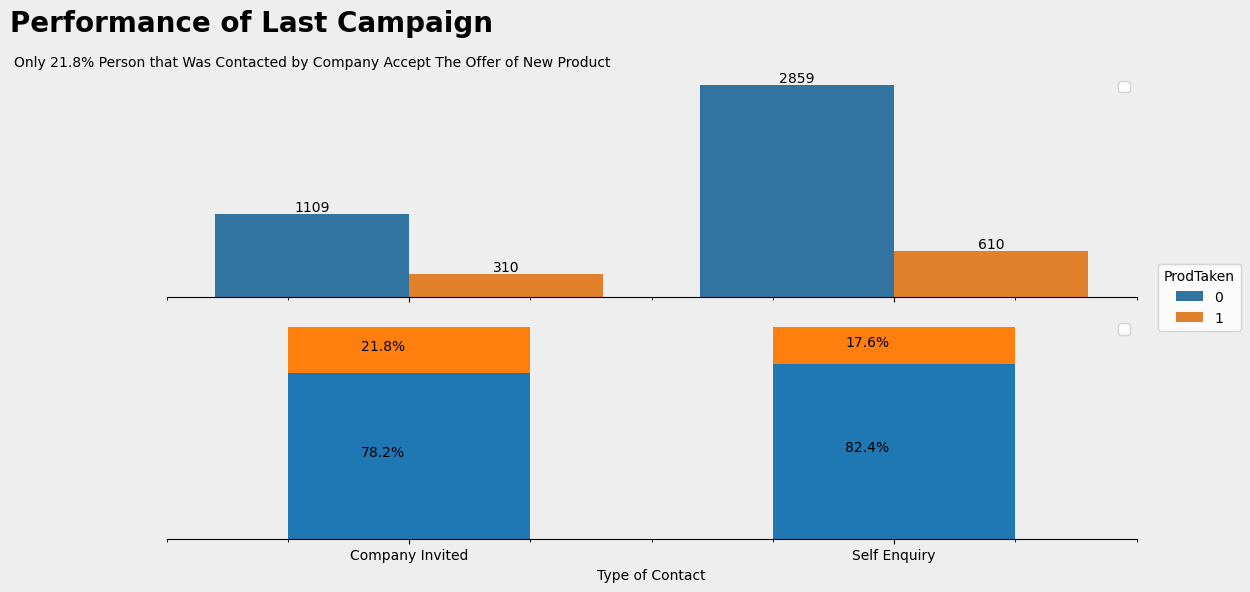

In [114]:
fig = plot_cat(df, 
               xc = "TypeofContact", 
               hue = "ProdTaken",
               ax_xlabel = "Type of Contact", 
               legend_labels = [0, 1],
               suptitle = "Performance of Last Campaign",
               title = "Only 21.8% Person that Was Contacted by Company Accept The Offer of New Product",
               palette = None,
               xsuptitle = .1, xtitle=.15)

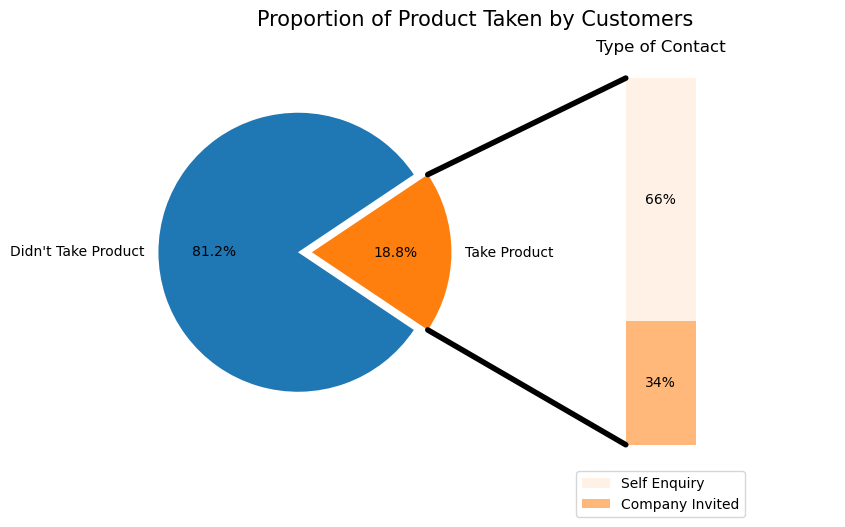

In [115]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.188, .812]
labels = ["Take Product","Didn't Take Product"]
explode = [0, 0.1]

# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, colors = (sns.color_palette("tab10")[1], sns.color_palette("tab10")[0]), explode=explode)

# bar chart parameters
age_ratios = [.338, .662]
age_labels = ["Self Enquiry", "Company Invited"]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=sns.color_palette("tab10")[1], 
                 label=label,
                 alpha=0.1 + 0.45 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Type of Contact')
ax2.legend(age_labels,
           loc = "upper center", bbox_to_anchor=[0.5, -0.05])
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

fig.suptitle("Proportion of Product Taken by Customers", size=15)

plt.show()

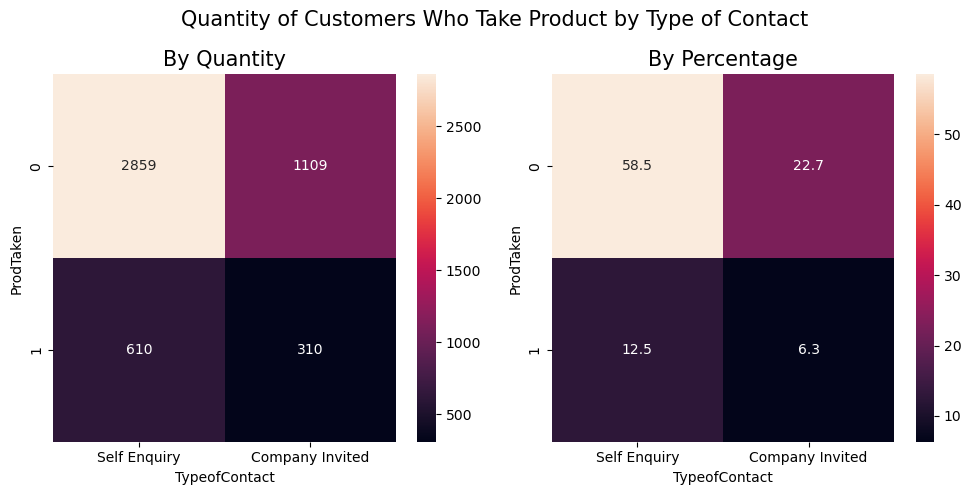

In [116]:
#creating crosstab by QTY
crosstabQTY = pd.crosstab(df.TypeofContact, df.ProdTaken)
crosstabQTY = crosstabQTY.loc[['Self Enquiry','Company Invited'],:].T

#creating crosstab by Percentage
crosstabPCT = pd.crosstab(df.TypeofContact, df.ProdTaken, normalize='all')
crosstabPCT = crosstabPCT.loc[['Self Enquiry','Company Invited'],:].T
crosstabPCT = crosstabPCT.apply(lambda x: 100*x)

#plot crosstab using Heatmap
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(crosstabQTY, 
            annot=True, fmt='.0f', ax=ax1)
ax1.set_title("By Quantity", size=15)

sns.heatmap(crosstabPCT, 
            annot=True, fmt='.1f', ax=ax2)
ax2.set_title("By Percentage", size=15)

fig.suptitle("Quantity of Customers Who Take Product by Type of Contact", size=15)
fig.tight_layout()
fig.show();

**Insight:**

1. Customers who take product only 18.8% from the overall customers (equals to 917 customers from 4888 customers)
2. From 18.8% customers, only 34% (qty=310) of customers who come take the product from Company Invitations. 66% (qty=607) remaining come as self enquiry.
3. Only 310 from 1419 invited customers that Take Product (around 21,8%, not far from the overall population which is 18.8%). And yet the proportion of customers that was invited and take the product was very low since the customers were invited randomly.

## 2.3. Fixing Categorical Data

In [117]:
# Fixing Occupation
df.loc[df[(df['Occupation']=='Free Lancer') | (df['Occupation']=='Salaried')].index, 'Occupation'] = "Others"

# Fixing Marital Status
df.loc[df[df['MaritalStatus']=='Single'].index,'MaritalStatus'] = "Unmarried"


df.rename(columns={
    'Gender' : 'GenderMale',
    'TypeofContact' : 'CompanyInvited',
    'Passport' : 'HasPassport'
}, inplace=True)

#list of categorical columns
ncat_col = [
    'Occupation',
    'GenderMale',
    'CompanyInvited',
    'MaritalStatus',
    'HasPassport',
    'OwnCar'
]
cat_col = ncat_col + ocat_col

df.GenderMale = df.GenderMale.map({
    'Male' : 1,
    'Female' : 0
})

df.CompanyInvited = df.CompanyInvited.map({
    'Company Invited' : 1,
    'Self Enquiry' : 0
})

In [118]:
df.Occupation.value_counts()

Occupation
Others            2370
Small Business    2084
Large Business     434
Name: count, dtype: int64

In [119]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

# 3. Exploratory Data Analysis

## 3.1. Univariate Analysis

### 3.1.1. Continuous Numerical Features

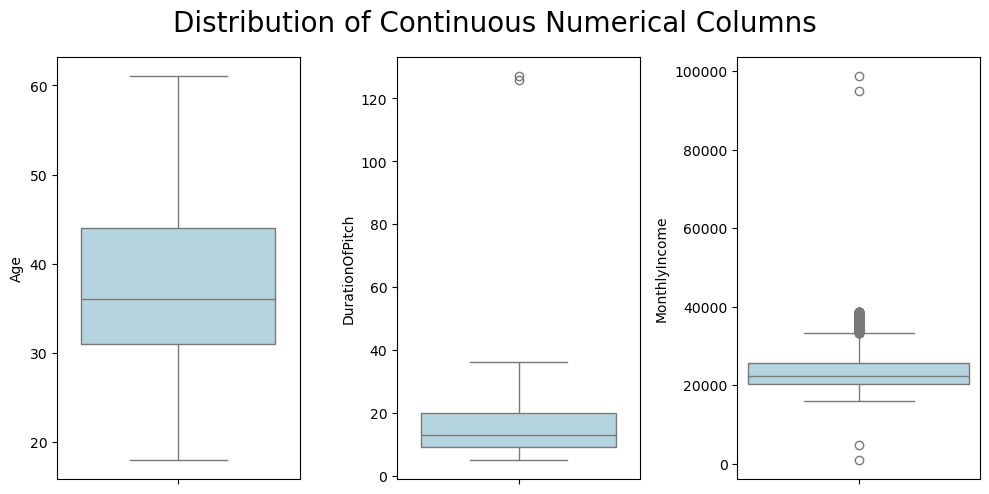

In [120]:
ncol = df[cnum_col].shape[1]

fig, axs = plt.subplots(1, ncol, figsize=(10, 5))
axs = axs.flatten()

for i, col in enumerate(cnum_col):
    sns.boxplot(df, y=col, color='lightblue', ax = axs[i])

fig.suptitle("Distribution of Continuous Numerical Columns", size=20)
fig.tight_layout()
plt.plot();

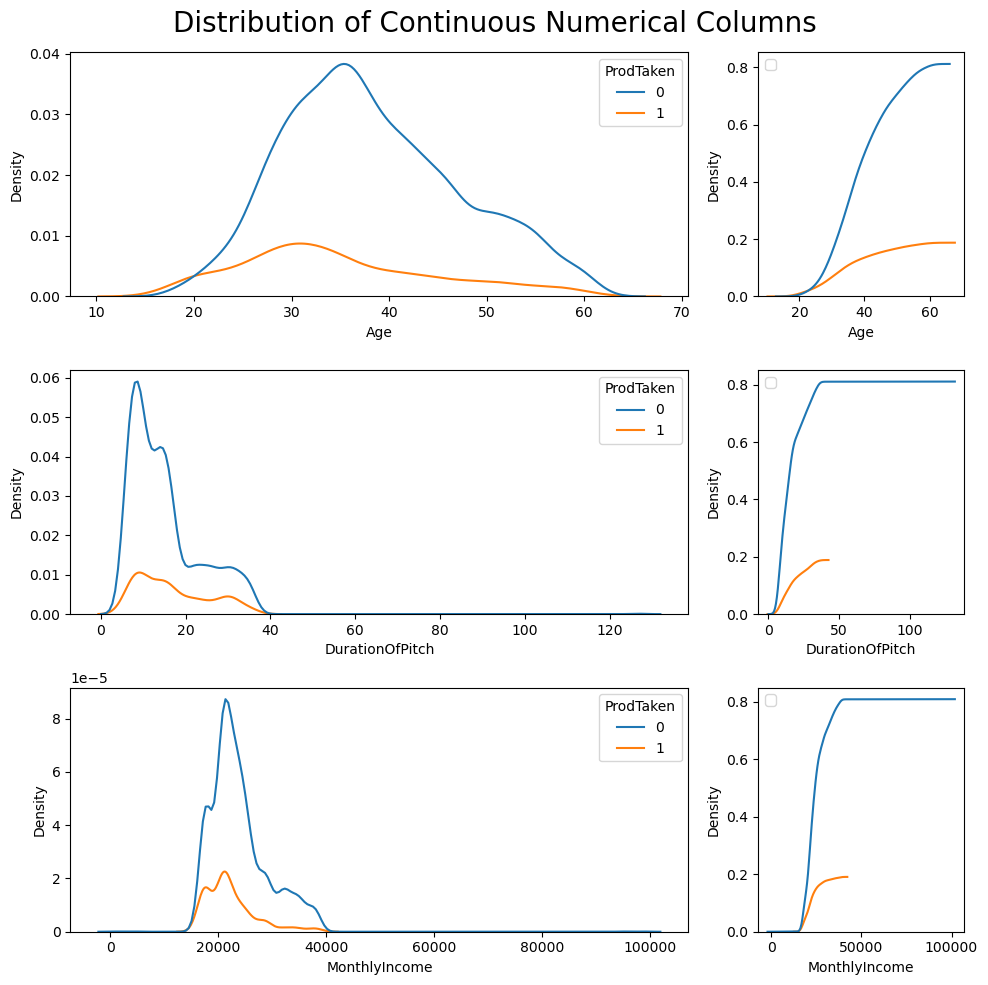

In [121]:
ncol = df[cnum_col].shape[1]

fig, axs = plt.subplots(ncol, 2, figsize=(10, 10),
                        gridspec_kw={'width_ratios': [3, 1]})

for i, col in enumerate(cnum_col):
    sns.kdeplot(df, x=col, hue = 'ProdTaken',
                ax = axs[i,0])

for i, col in enumerate(cnum_col):
    sns.kdeplot(df, x=col, hue = 'ProdTaken', cumulative=True,
                ax = axs[i,1])
    axs[i,1].legend([])
    
#fig.legend(loc = 'center left', bbox_to_anchor=(1,.5))
fig.suptitle("Distribution of Continuous Numerical Columns", size=20)
fig.tight_layout()
plt.plot();

**Insight:**

1. Age 20, is the point where customers tendencies to take or not to take product is equals. Customers with age <20 tend to take product more. And older customers, above 40, is less likely to take product offers.
2. Monthly income between 20000 to 25000 has high probability to take offers, otherwise, higher income is less likely to take.

### 3.1.2. Descrete Numerical Features

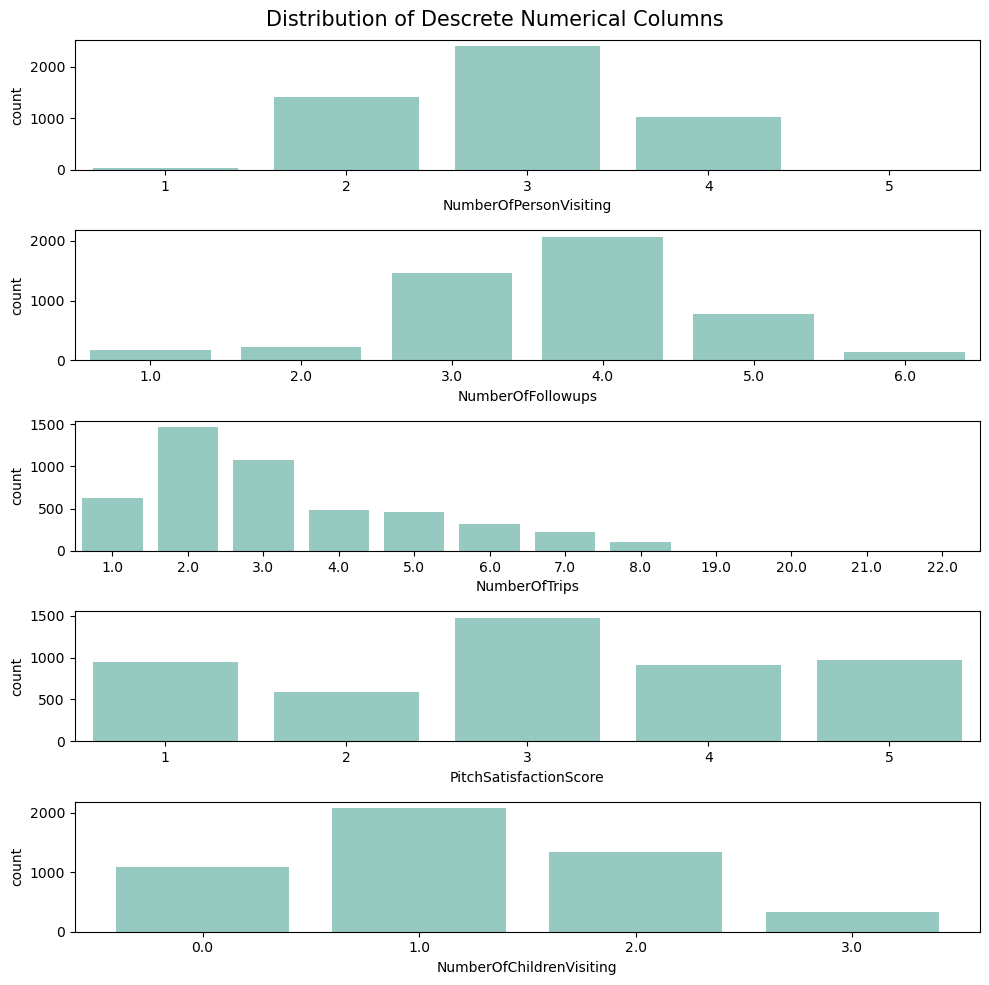

In [122]:
ncol = df[dnum_col].shape[1]

fig, axs = plt.subplots(ncol, 1, figsize=(10,10))
axs = axs.flatten()

for i, col in enumerate(dnum_col):
    sns.countplot(df, x=col, color = sns.color_palette('Set3')[0], ax = axs[i])

fig.suptitle("Distribution of Descrete Numerical Columns", size=15)
fig.tight_layout()
plt.plot();

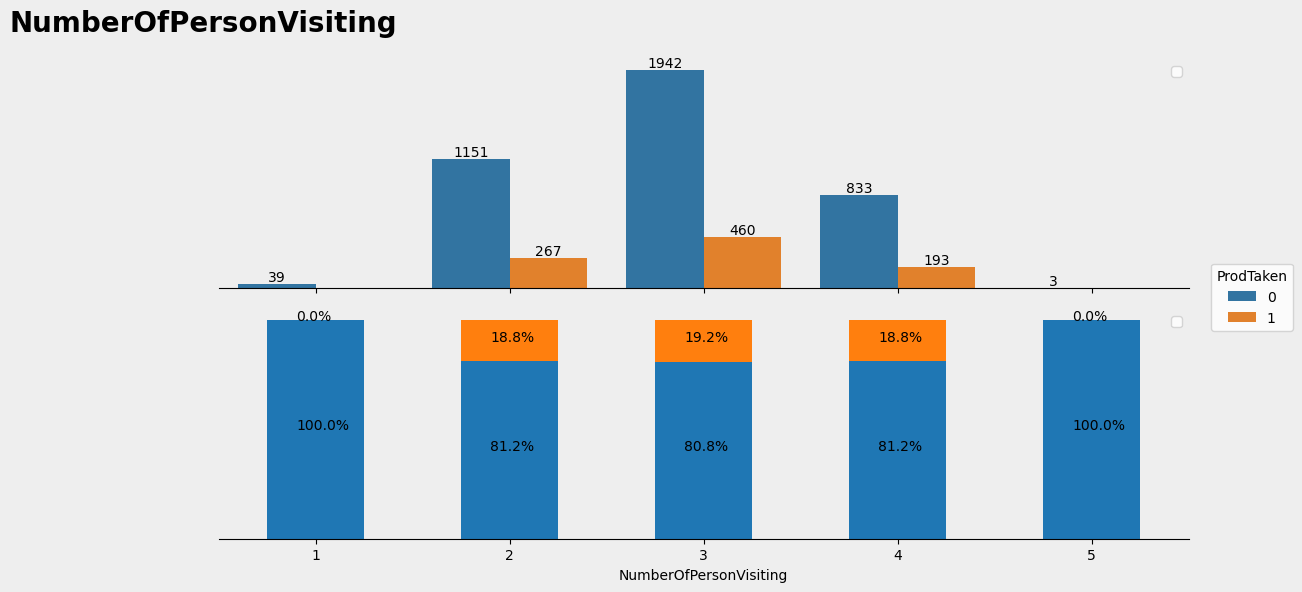

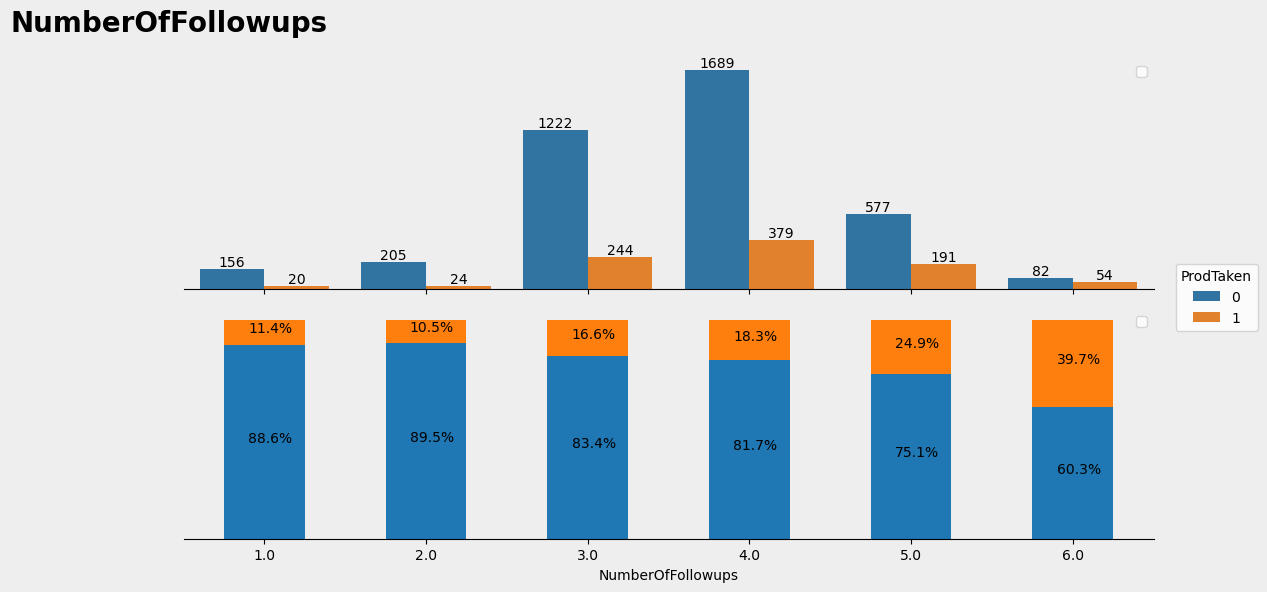

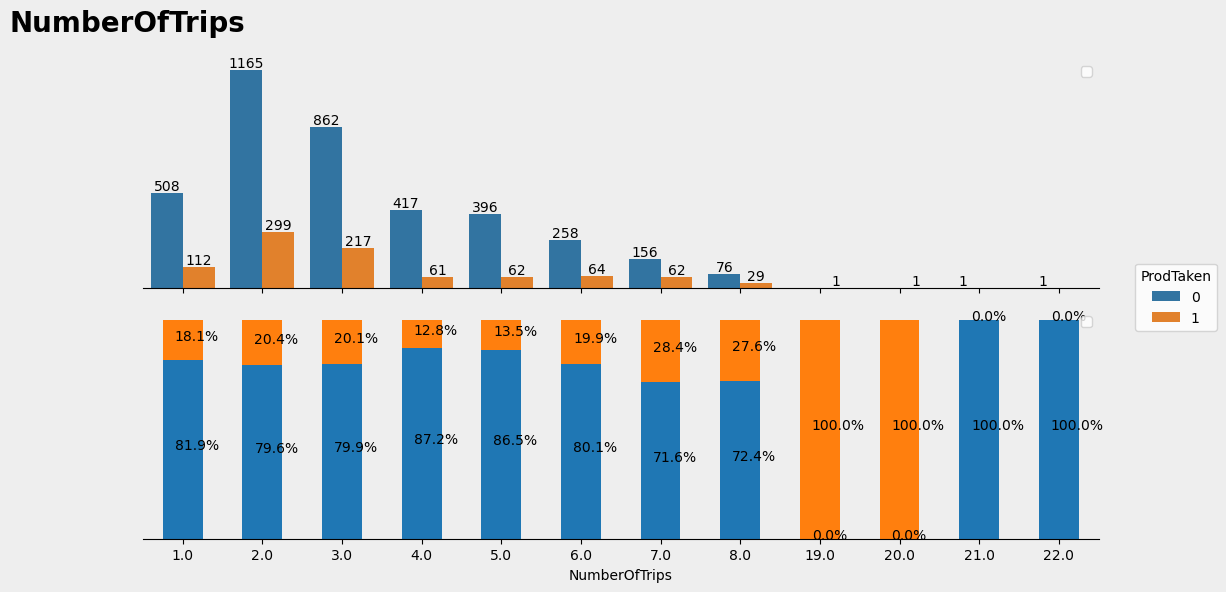

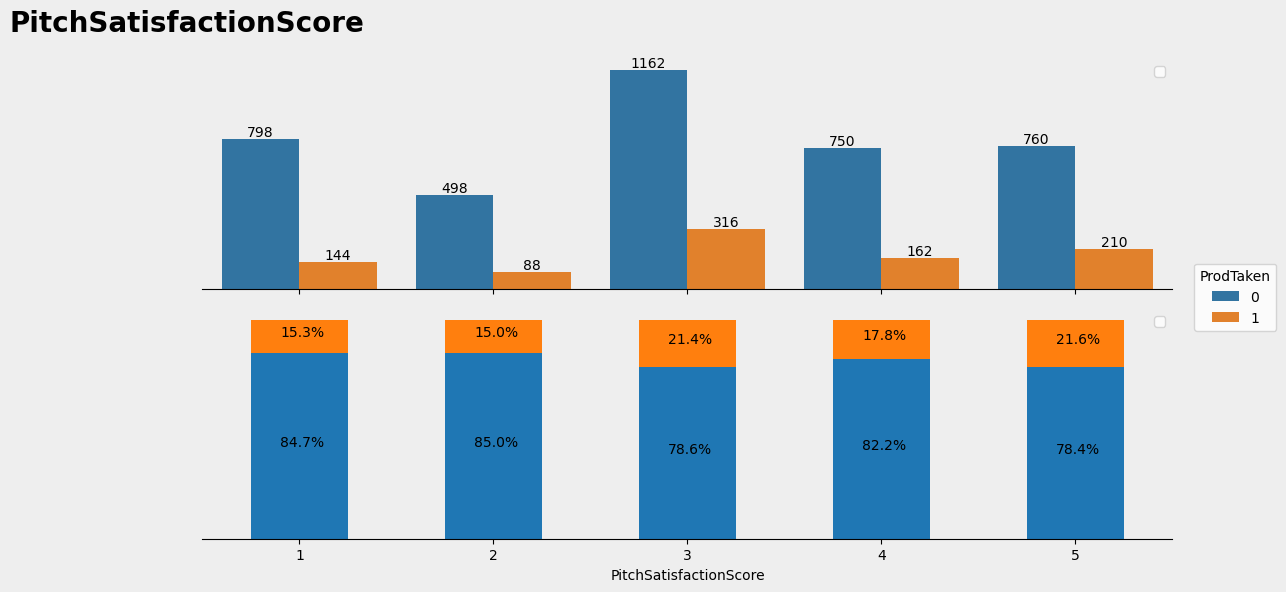

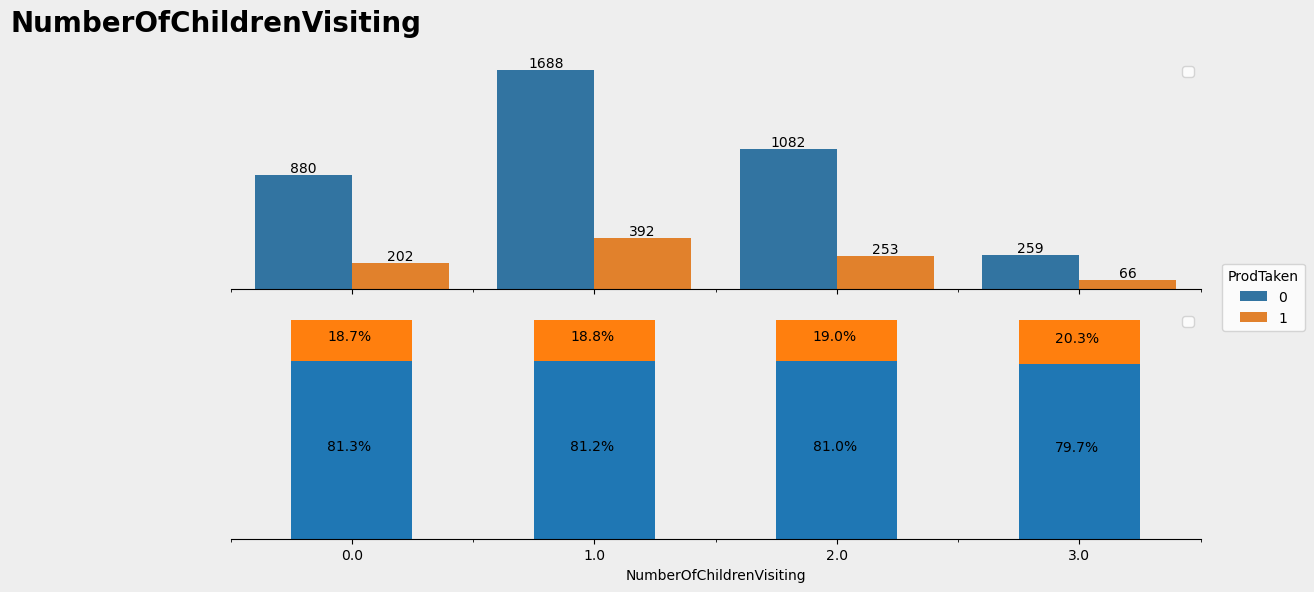

In [123]:
for i in dnum_col:

    plot_cat(df, 
             xc = i, 
             hue = "ProdTaken",
             ax_xlabel = i, 
             legend_labels = [0, 1],
             suptitle = i,
             title = "",
             palette = None,
             xsuptitle = 0, xtitle=0)

**Insight:**

as the number of Follow Ups increases, the proportion of customer to take the product also increases

### 3.1.3. Nominal Categorical Features

In [124]:
product_pitched_cat = pd.CategoricalDtype([
    'Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King'
], ordered = True)

designation_cat = pd.CategoricalDtype([
    'Manager', 'Senior Manager', 'AVP', 'VP', 'Executive'
], ordered = True)


df.ProductPitched = df.ProductPitched.astype(product_pitched_cat)
df.Designation = df.Designation.astype(designation_cat)

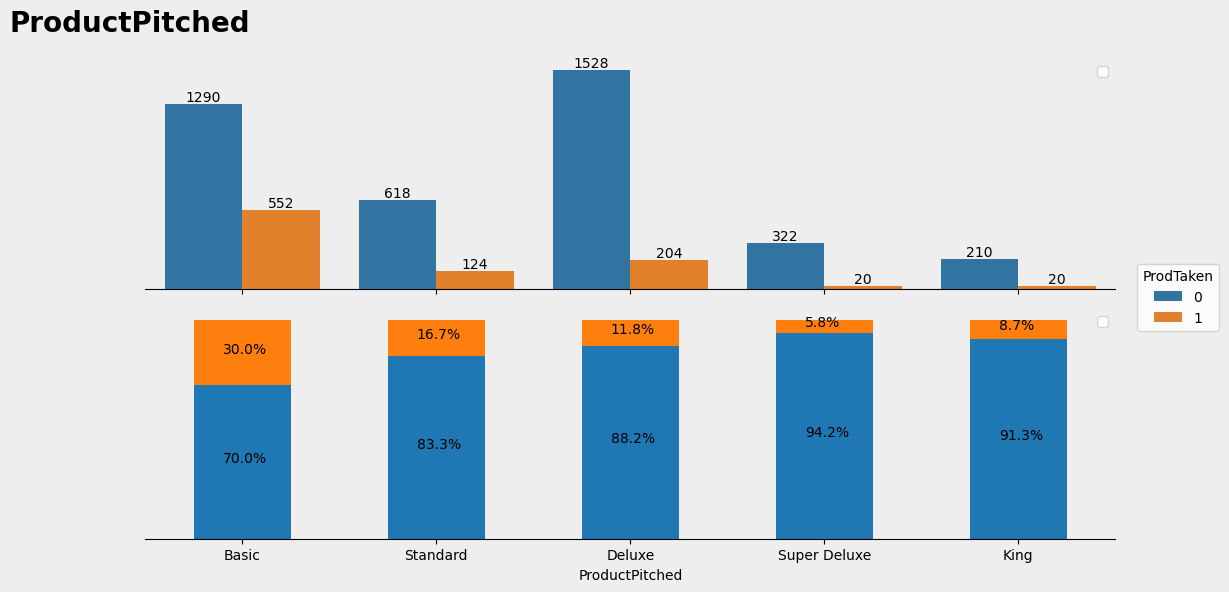

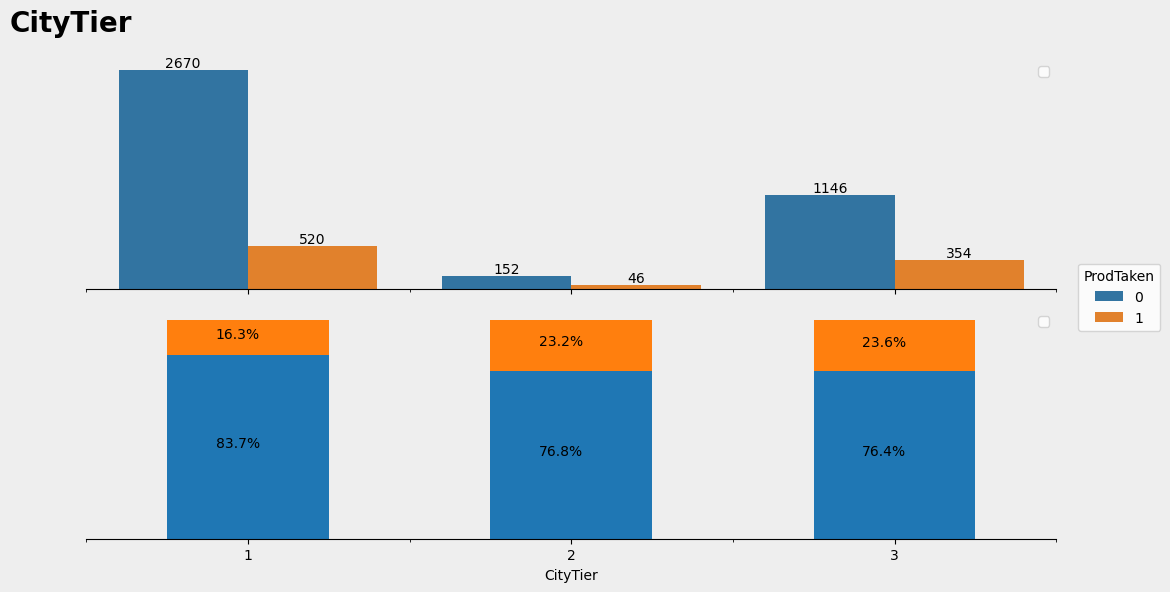

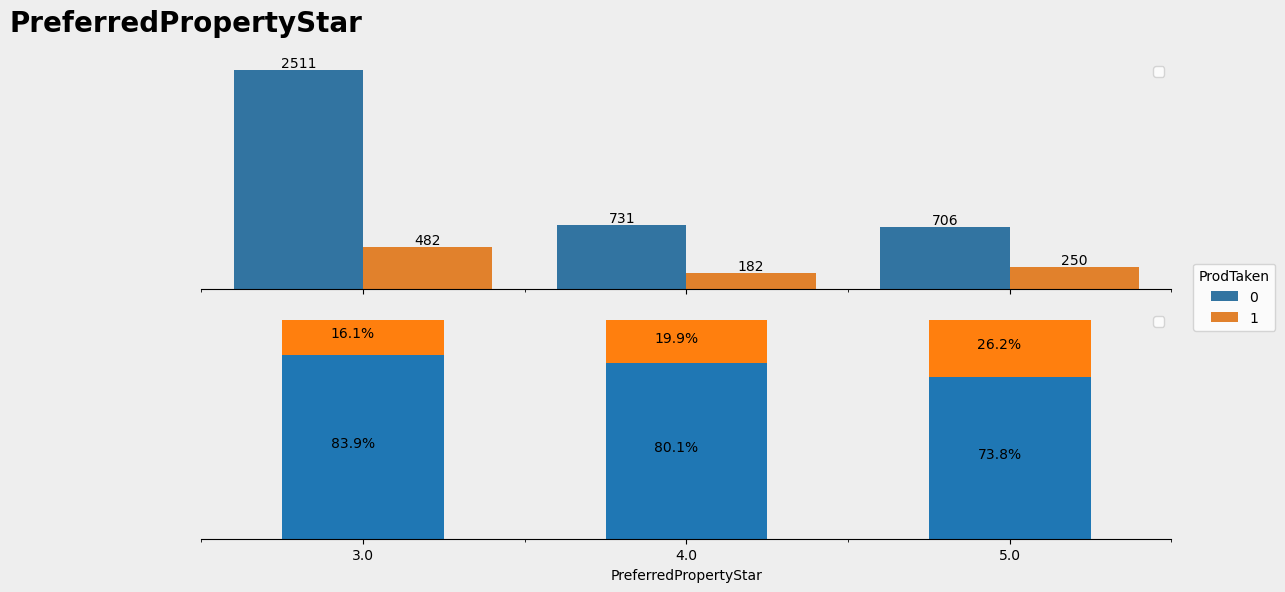

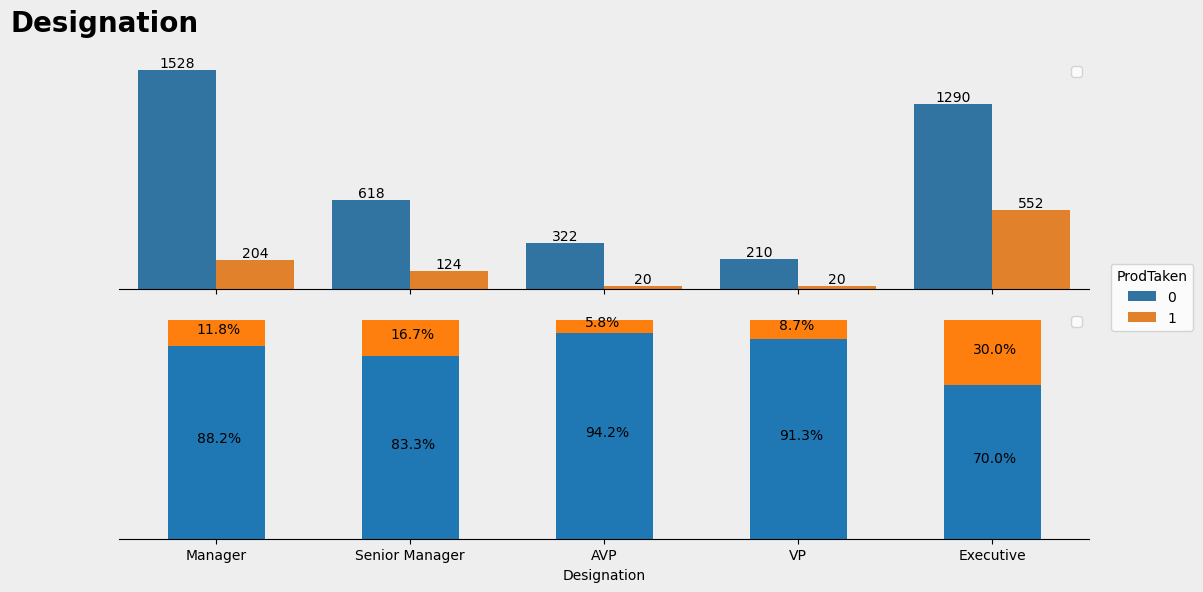

In [125]:
for i in ocat_col:

    plot_cat(df, 
             xc = i, 
             hue = "ProdTaken",
             ax_xlabel = i, 
             legend_labels = [0, 1],
             suptitle = i,
             title = "",
             palette = None,
             xsuptitle = 0, xtitle=0)

**Insight:**

1. Customers that Pitched with `Basic` product category tend to take The Product.
2. City Tier 2 and 3 has higher probability to take the product. But only few customers that come from City Tier 2.
3. As the customer's prefered hotel rating increases, the proportions of customers that take product is also increasing.
4. Executive Designation Customers is really a big fish, since it has 2 to 5 times chances to take the product.

### 3.1.4. Ordinal Categorical Features

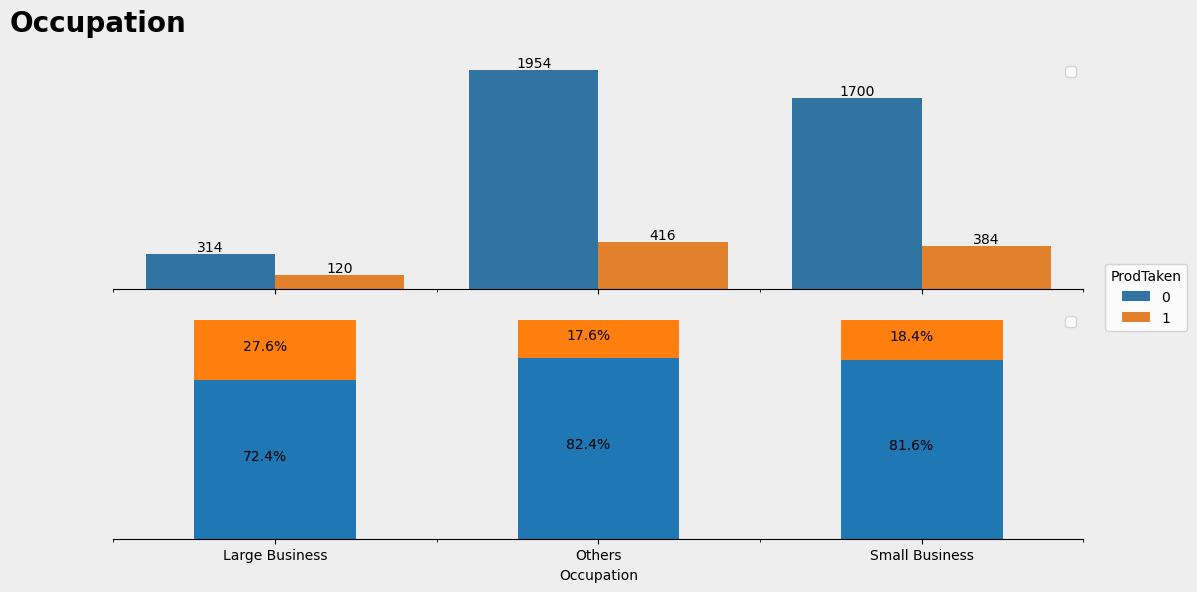

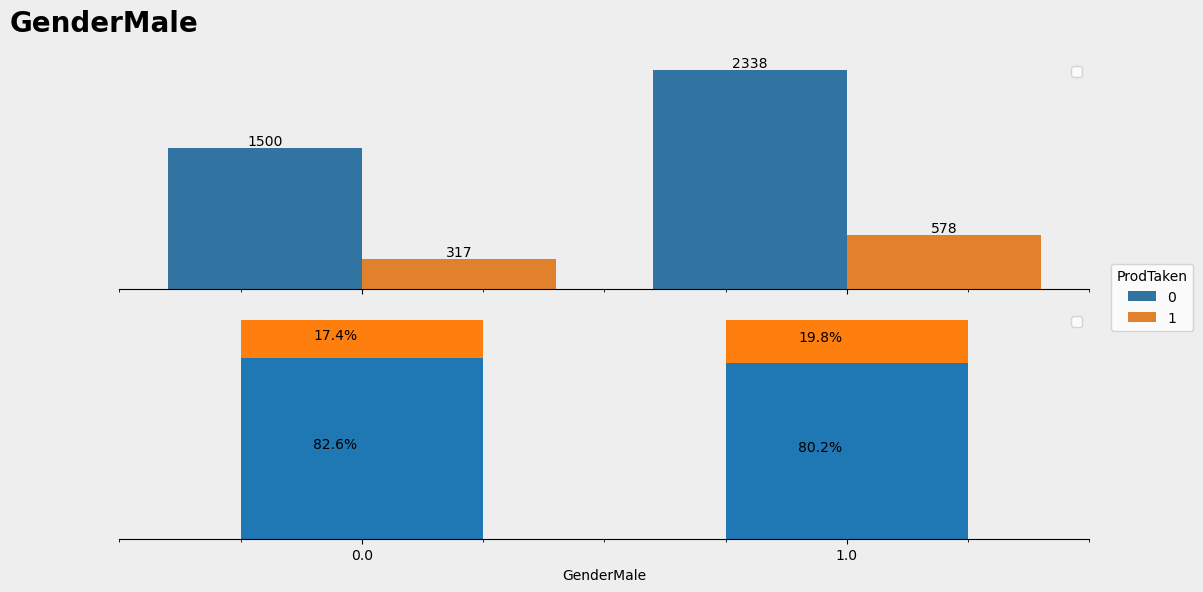

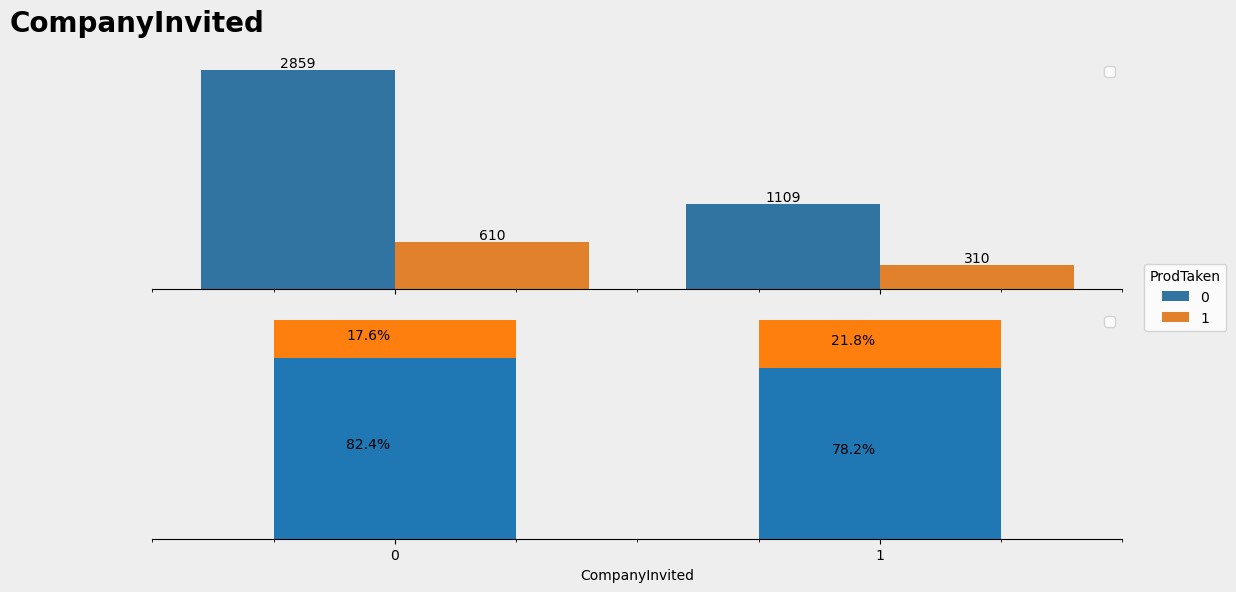

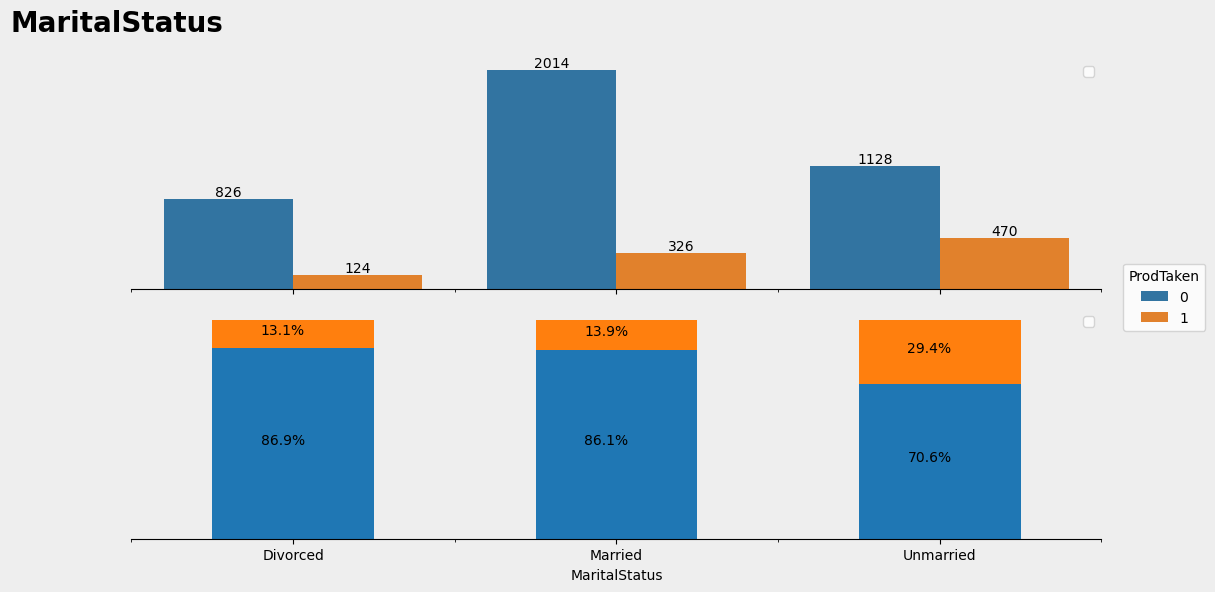

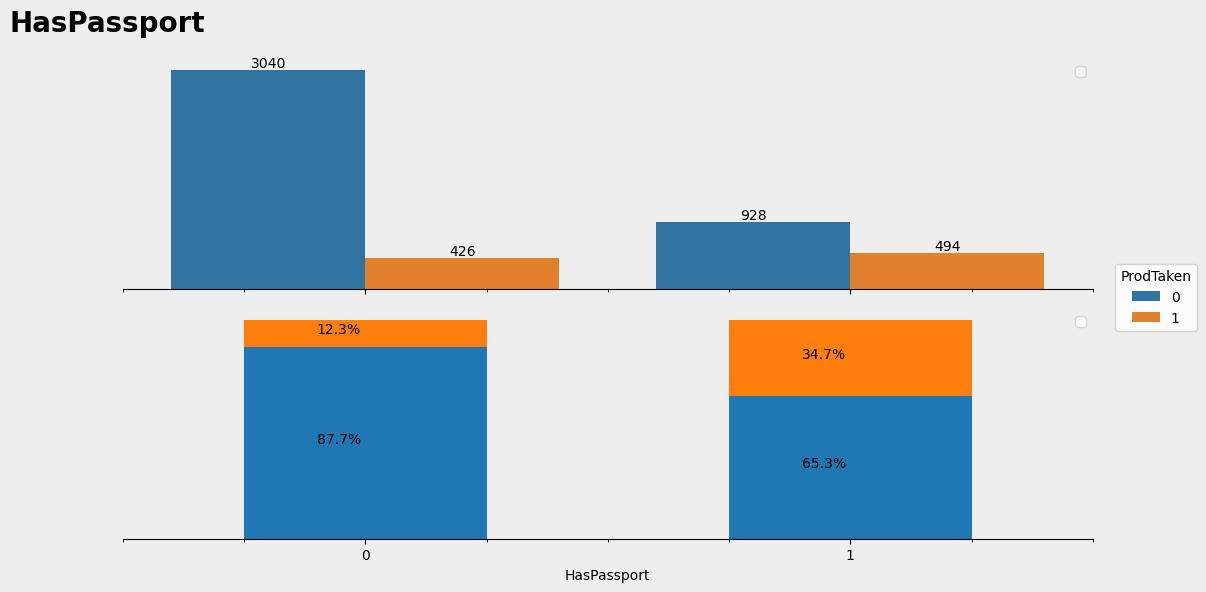

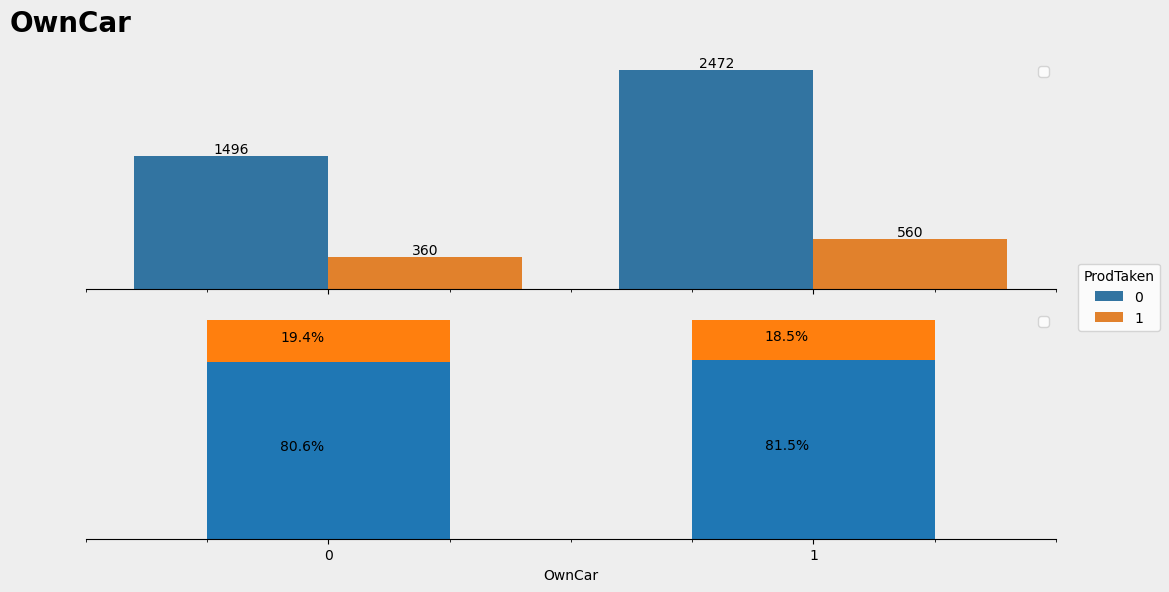

In [126]:
for i in ncat_col:

    plot_cat(df, 
             xc = i, 
             hue = "ProdTaken",
             ax_xlabel = i, 
             legend_labels = [0, 1],
             suptitle = i,
             title = "",
             palette = None,
             xsuptitle = 0, xtitle=0)

**Insight:**

1. Customers that work for Large Business tend more to take the product.
2. Inviting Customers increases chances to take product.
3. Single and Unmaried customers has higher chances to take the product.
4. Customers that has passport will likely to take the product.

## 3.2. Bivariate Analysis

### 3.2.1 Numerical vs Numerical Features

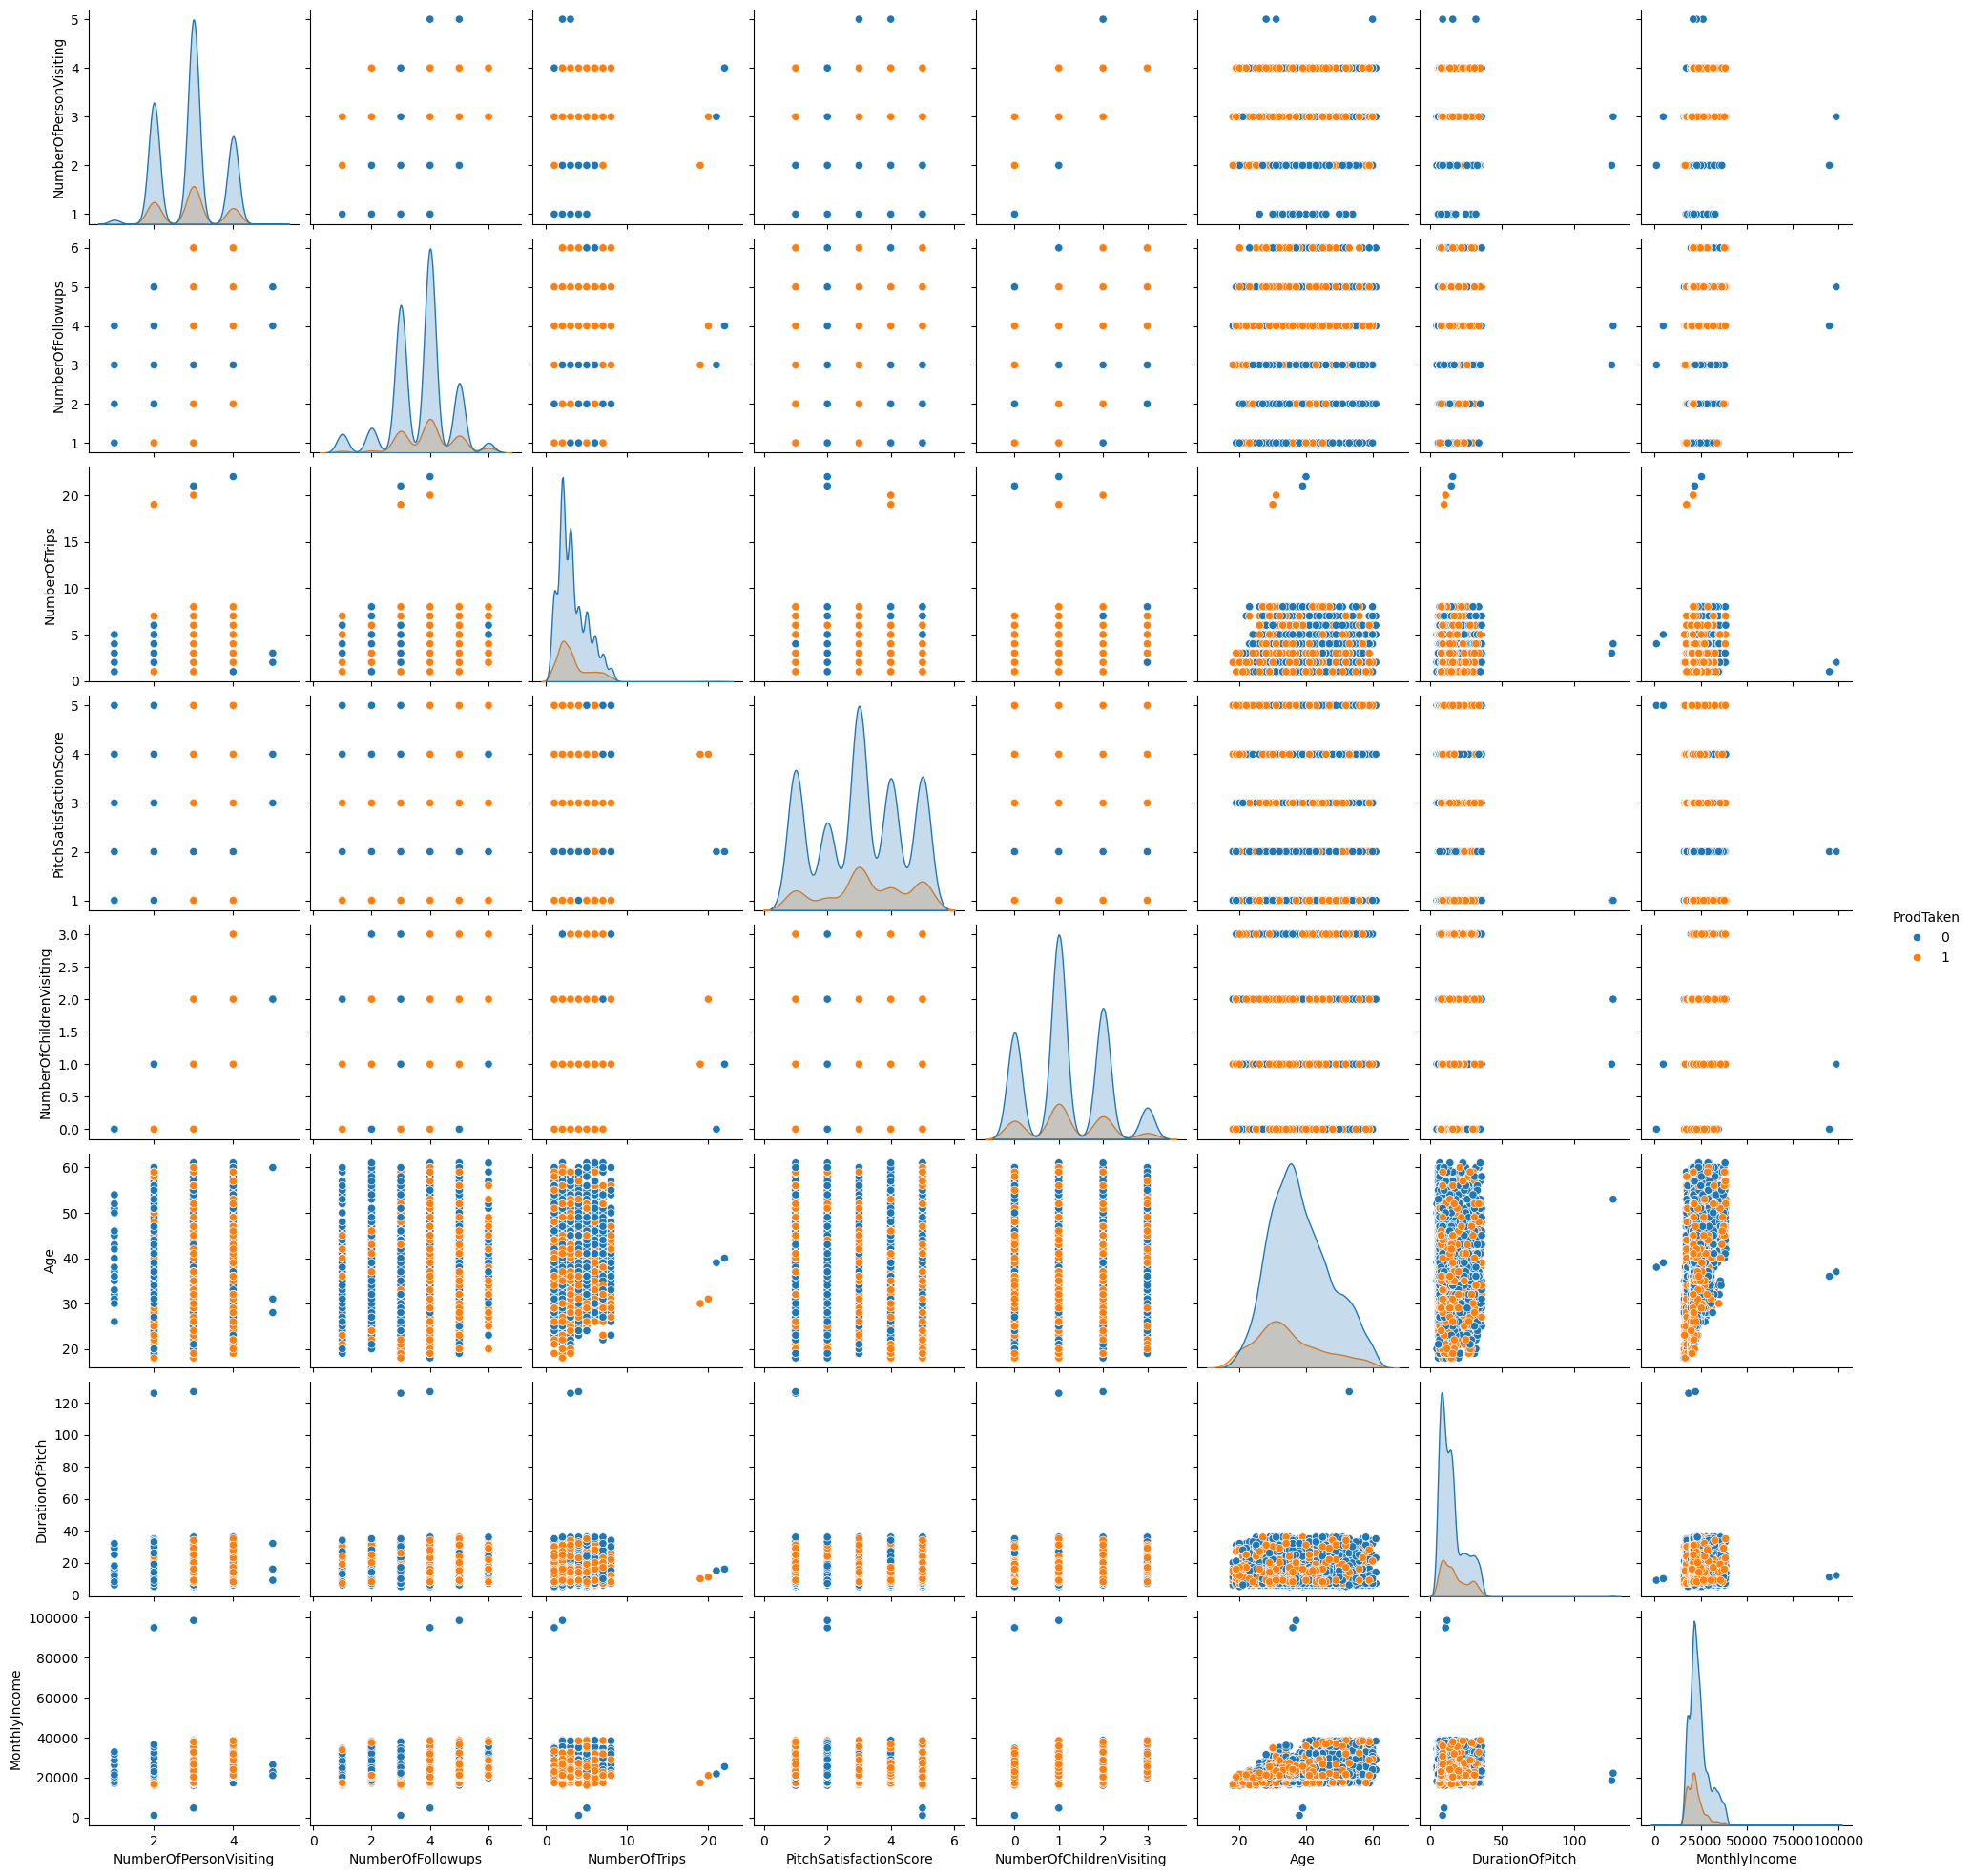

In [127]:
sns.pairplot(pd.concat([df[num_col], df[["ProdTaken"]]], axis=1), hue="ProdTaken")

plt.show();

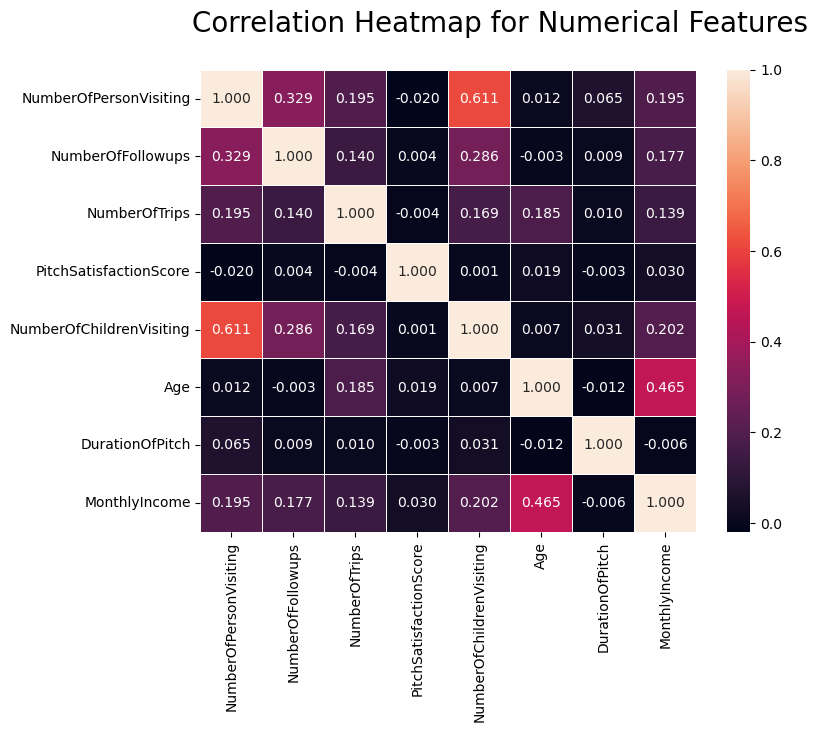

In [128]:
f, ax = plt.subplots(1,1, figsize=(8,6))

sns.heatmap(df[num_col].corr(), 
            annot=True, fmt='.3f', linewidth=.5,
            ax=ax)

f.suptitle("Correlation Heatmap for Numerical Features", size=20)
f.show();

**Insight:**

There's no strong correlation between Numerical Features.
But there is a moderate correlation between `NumberOfPersonVisiting` with `NumberOfChildrenVisiting`. and A small correlation between `Age` and `MonthlyIncome`

### 3.2.2. Categorical vs Numerical Features

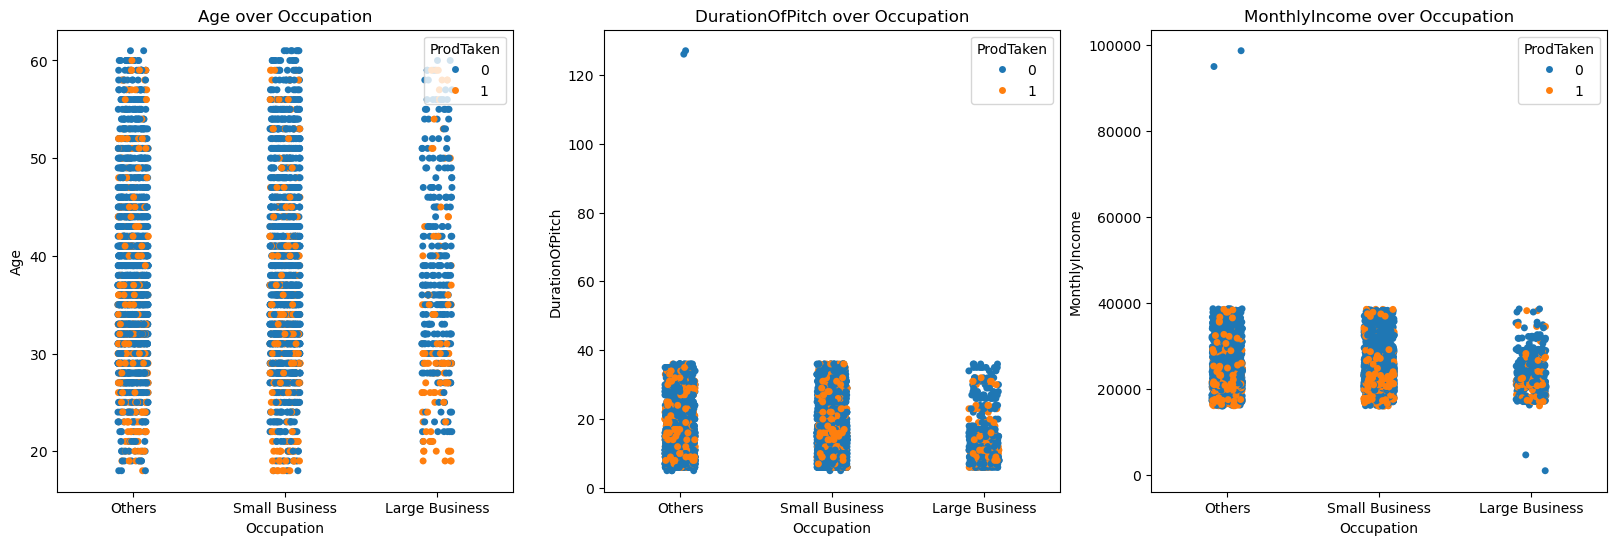

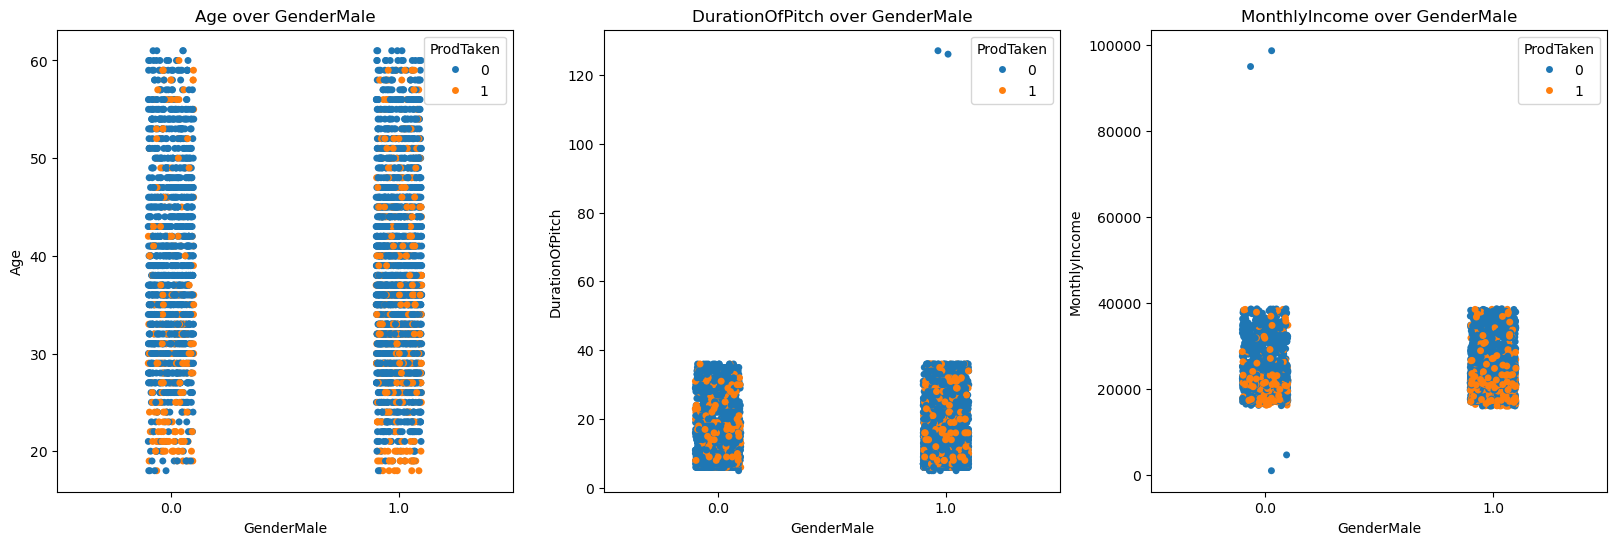

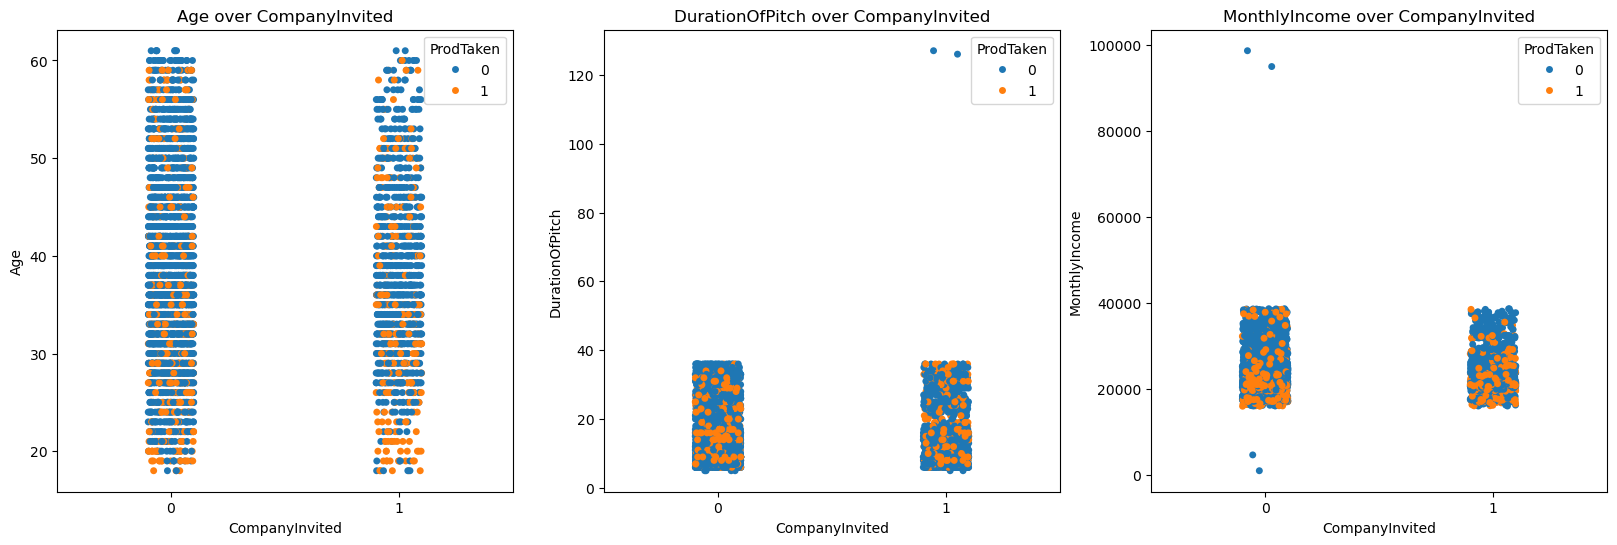

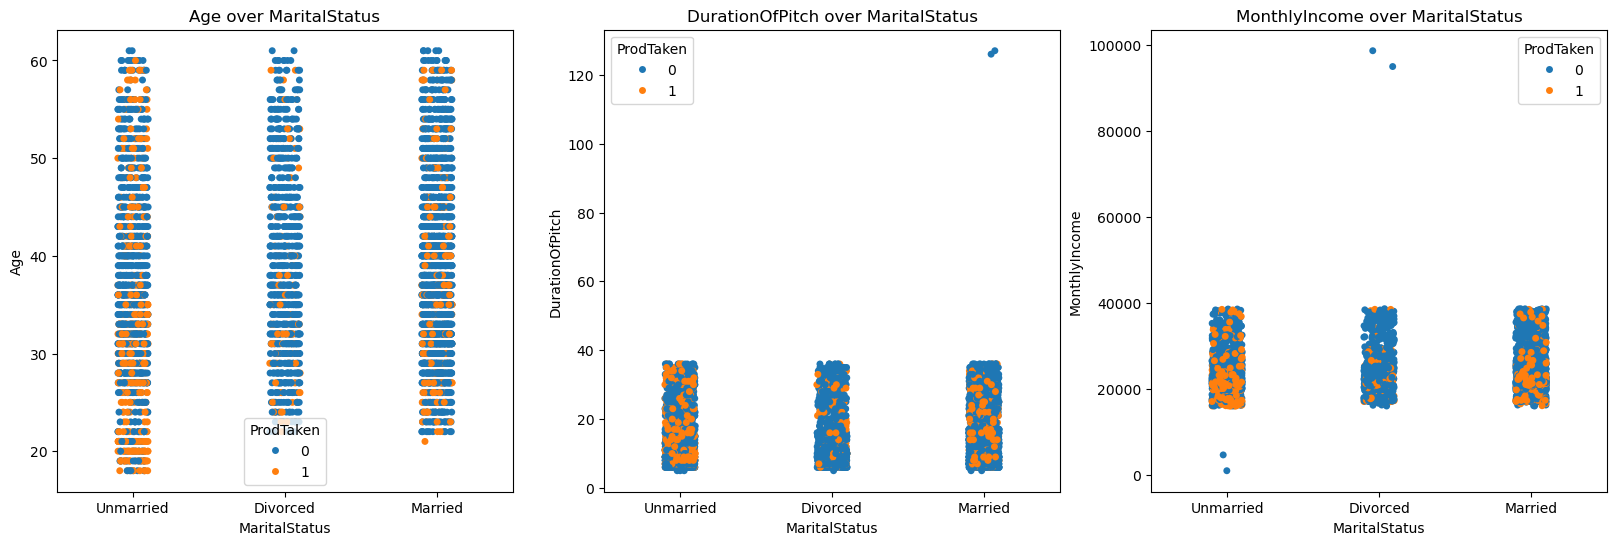

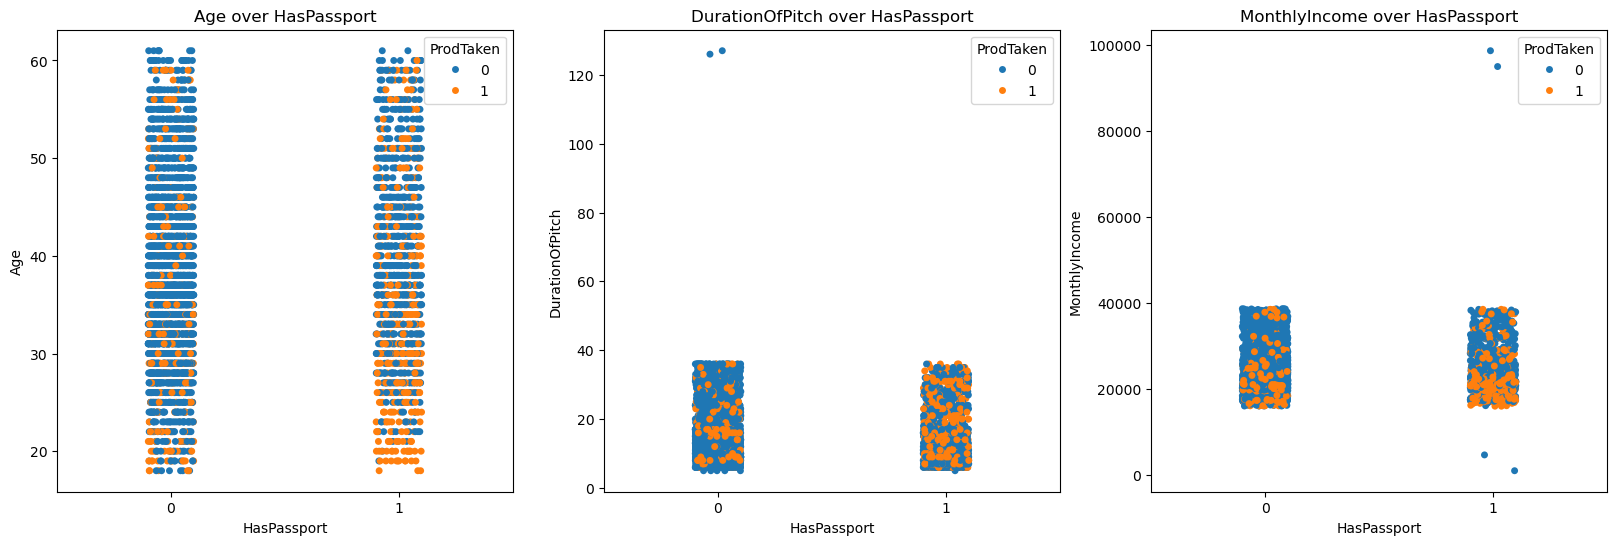

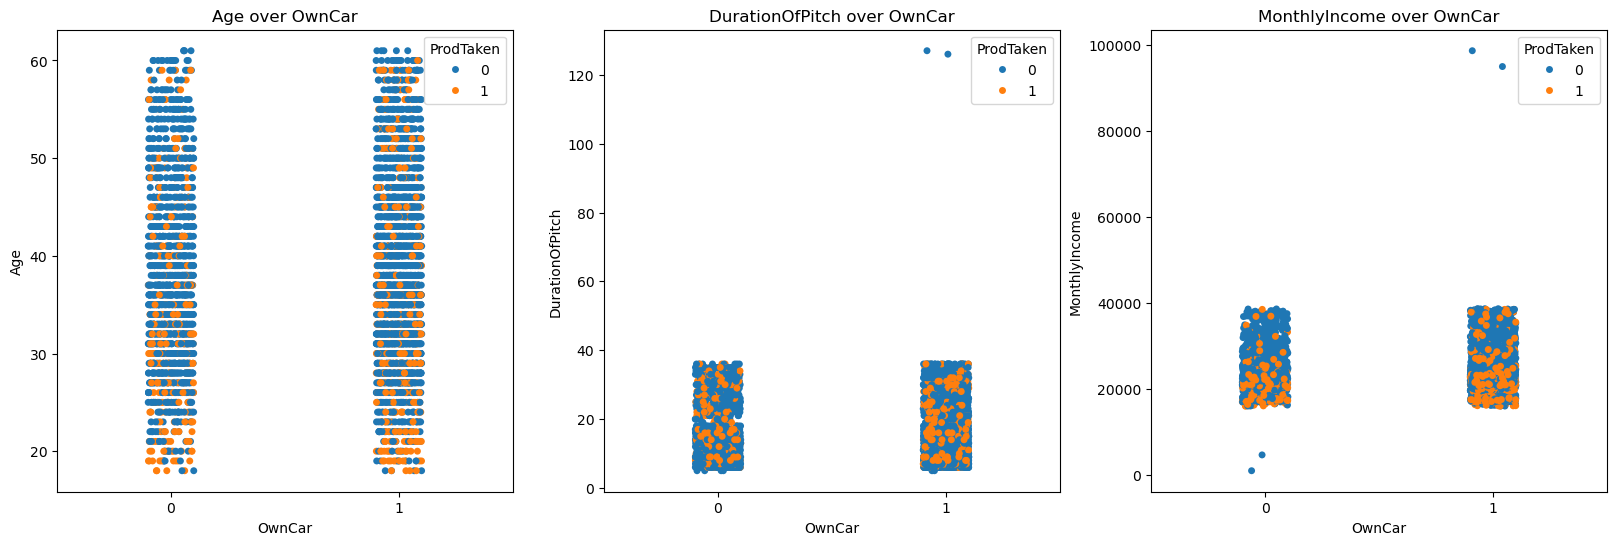

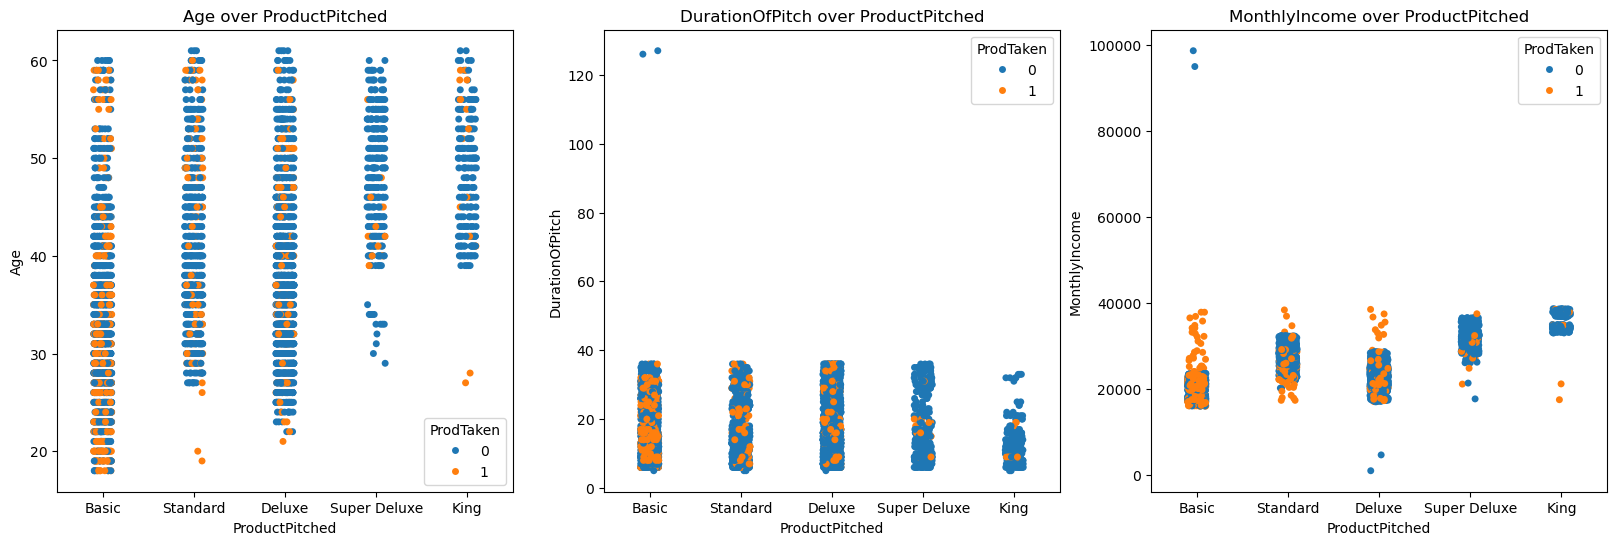

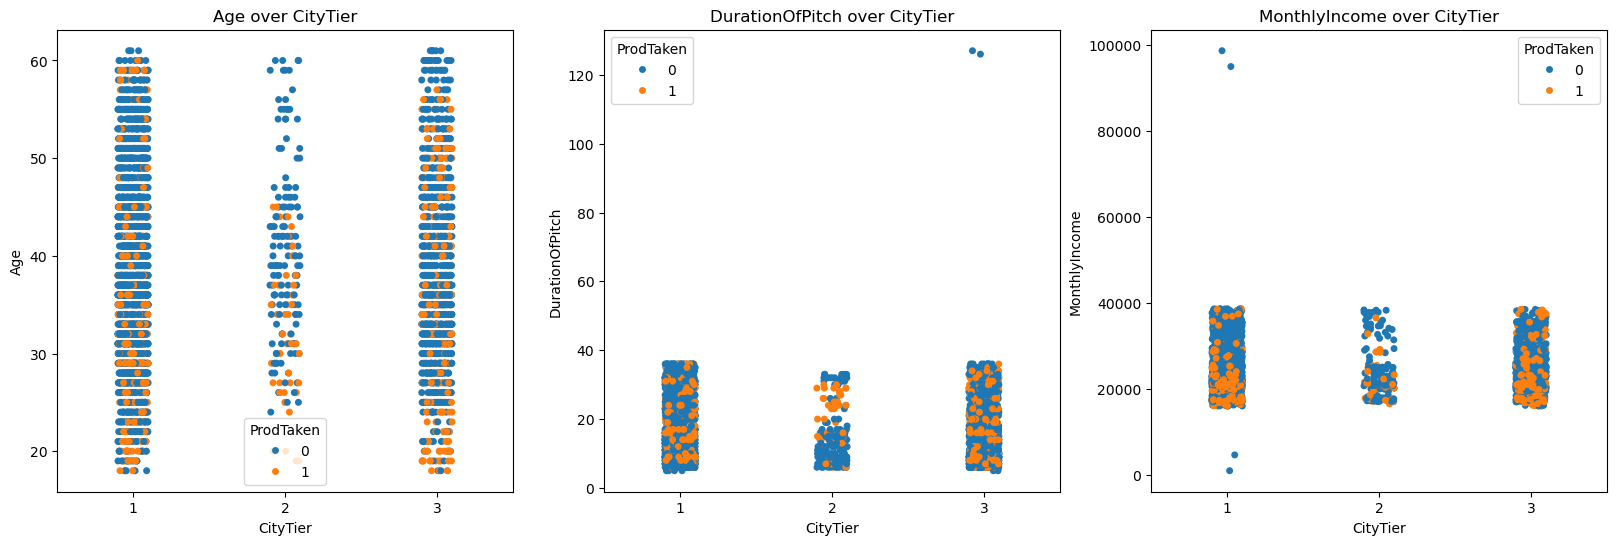

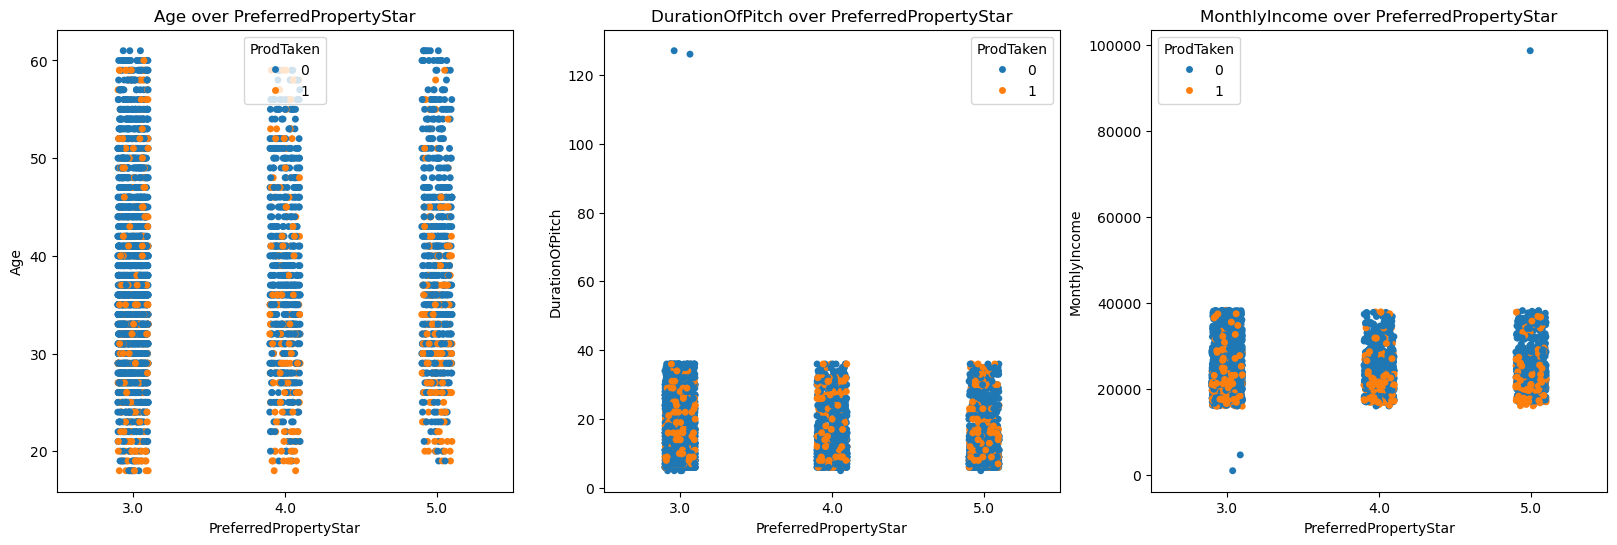

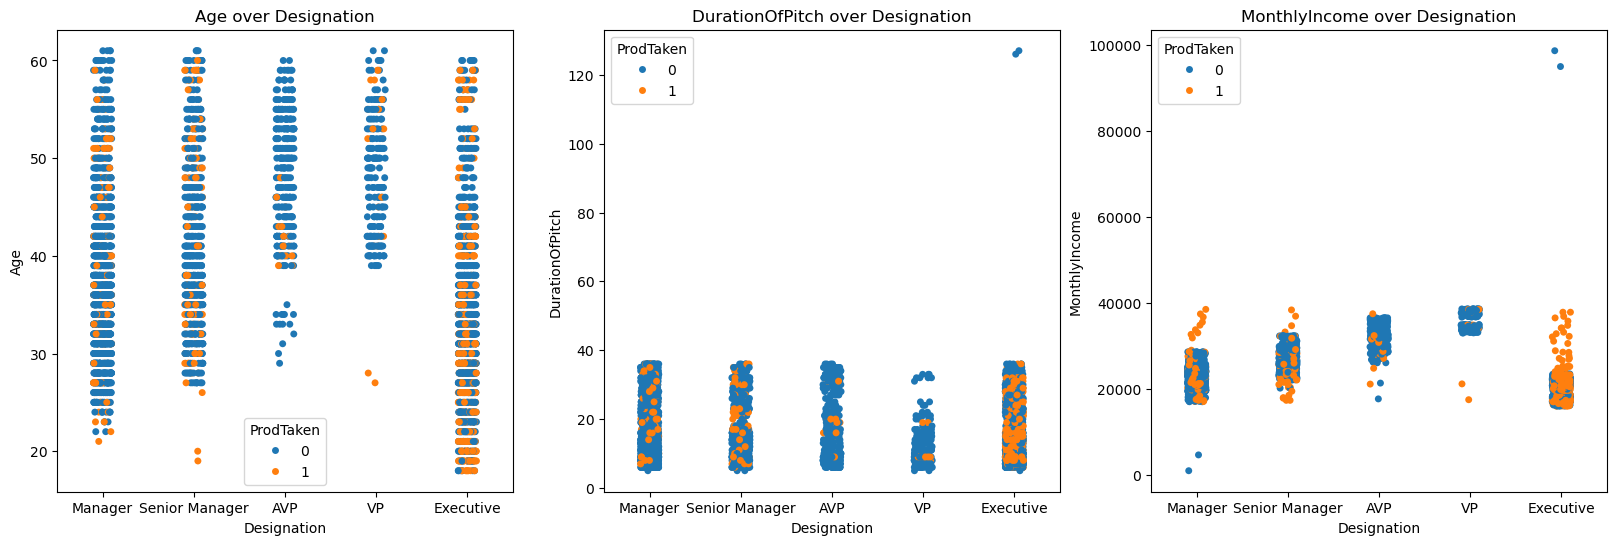

In [129]:
for cat in cat_col:
    fig, ax = plt.subplots(1, len(cnum_col), figsize=(20,6))
    for i, num in enumerate(cnum_col):
        sns.stripplot(df, x=cat, y=num, hue="ProdTaken",
                      ax=ax[i])
        ax[i].set_title(f"{num} over {cat}")
        fig.show();

### 3.2.3. Categorical vs Categorical Features

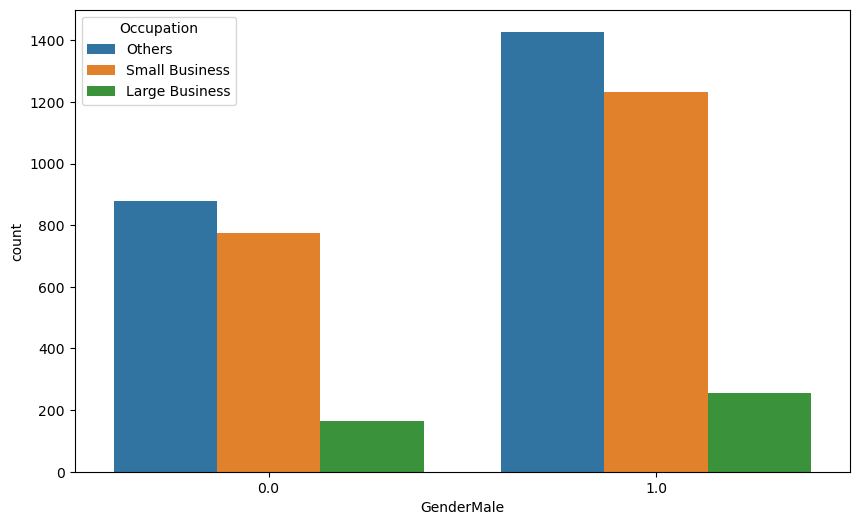

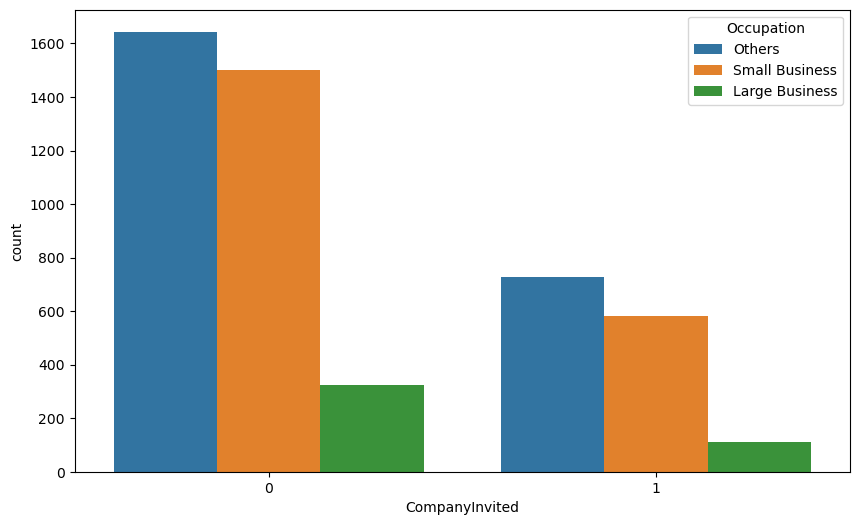

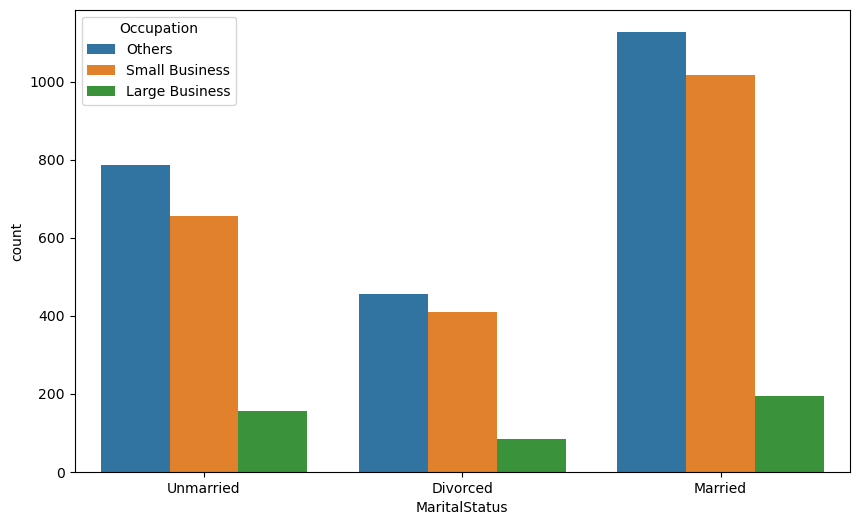

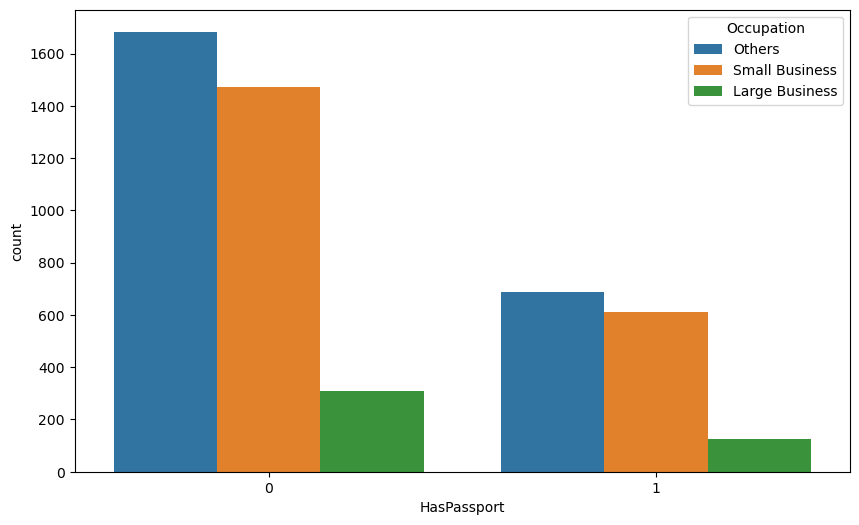

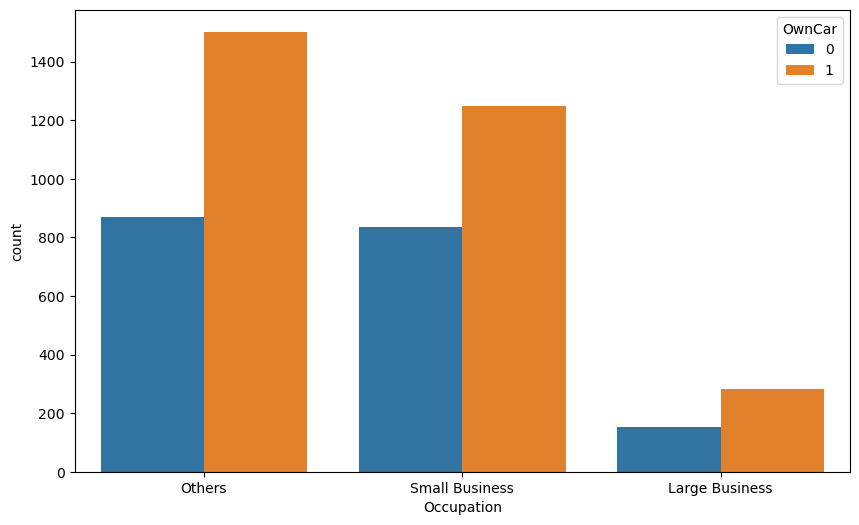

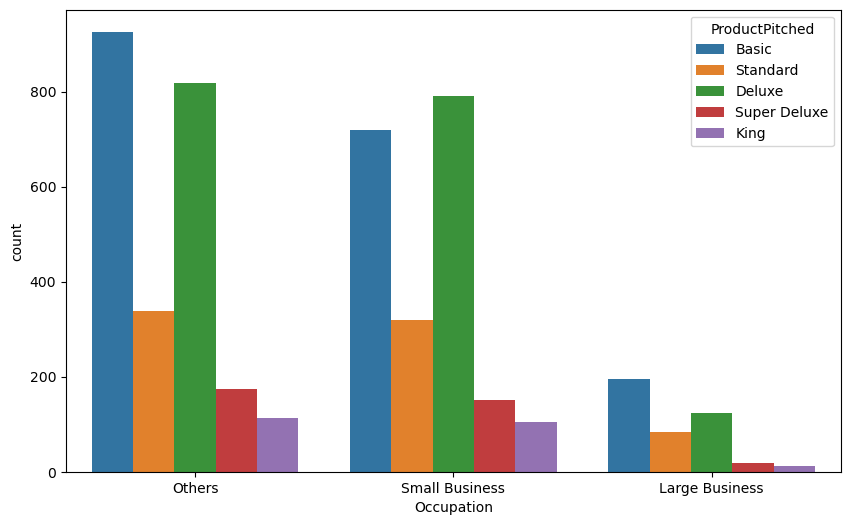

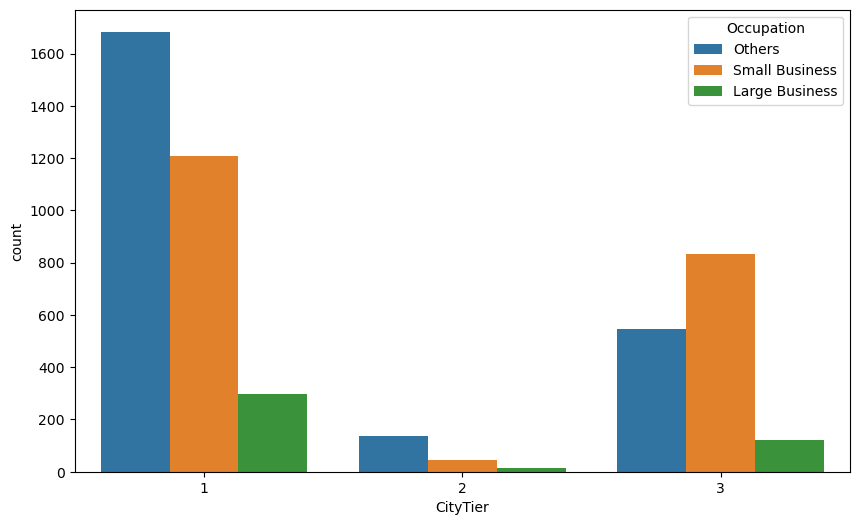

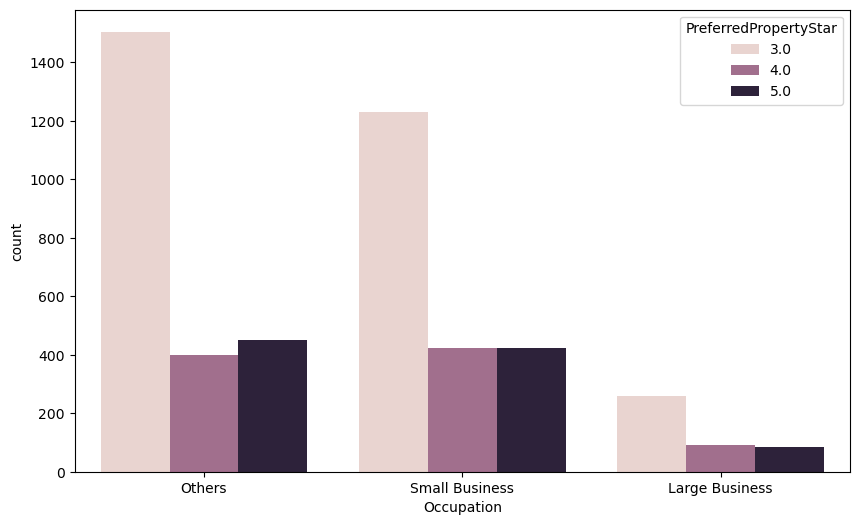

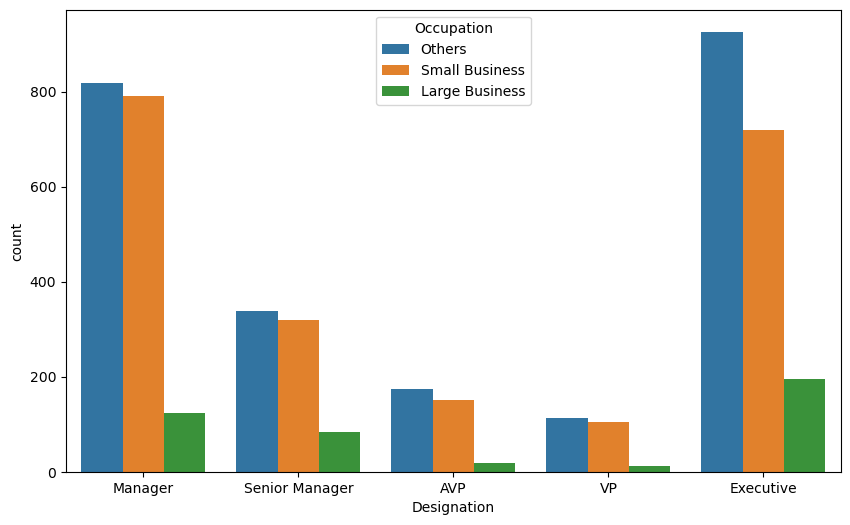

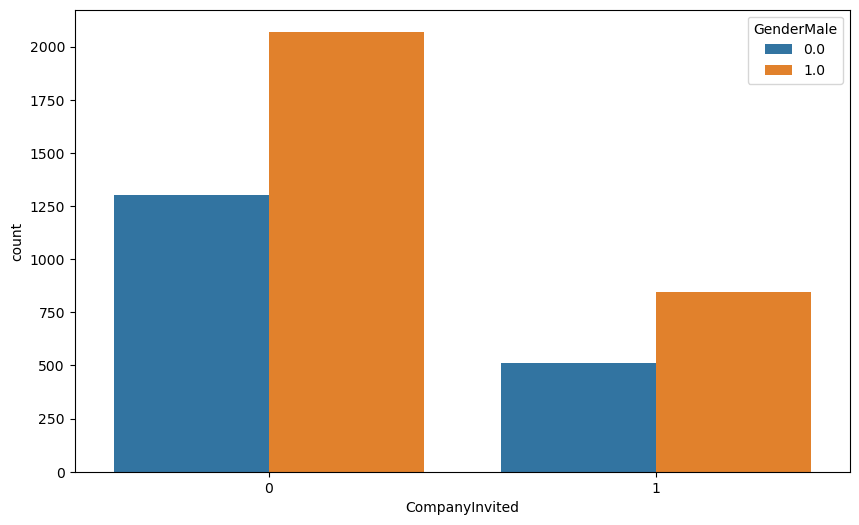

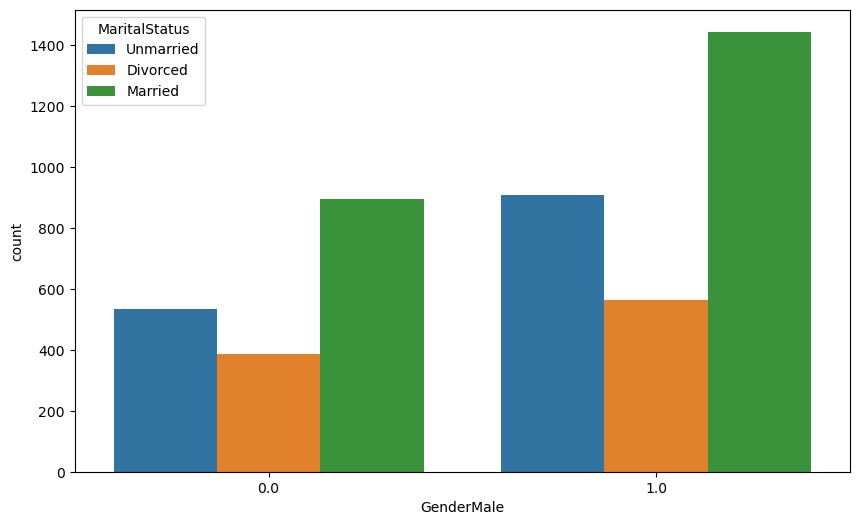

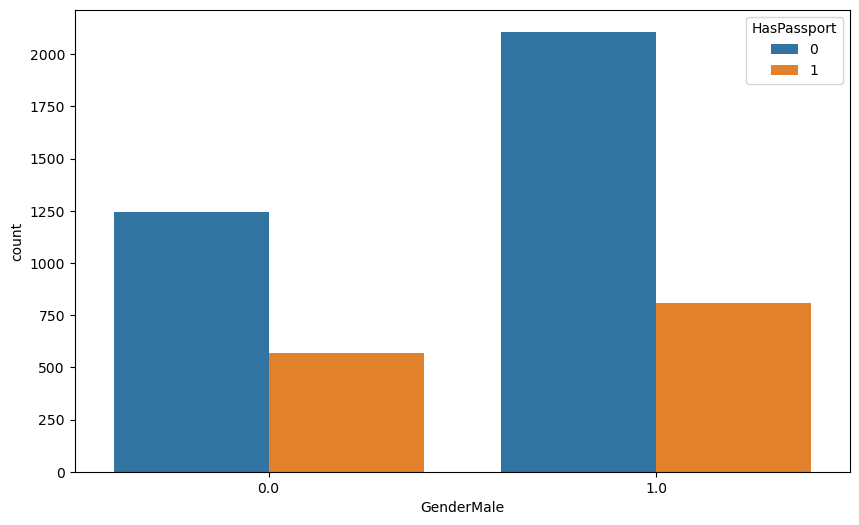

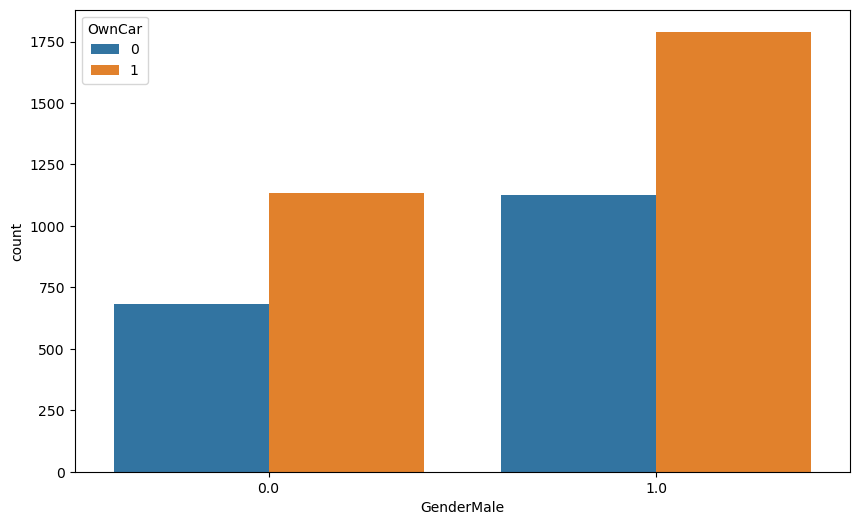

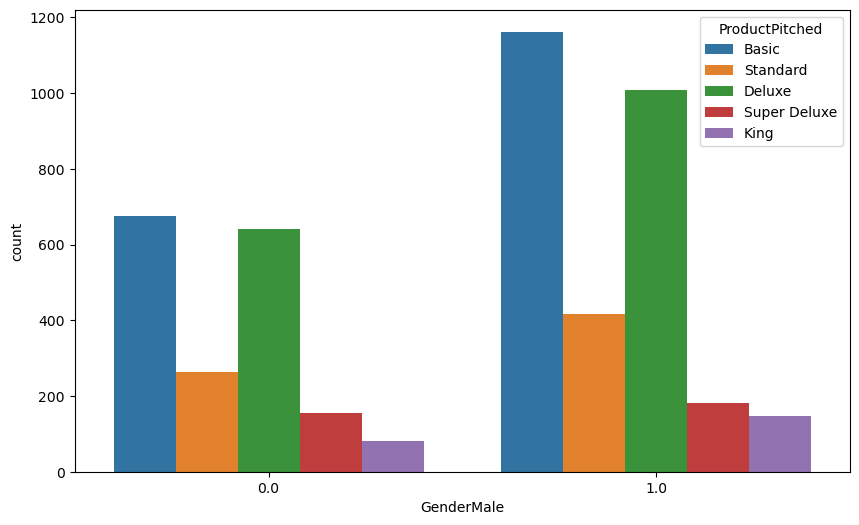

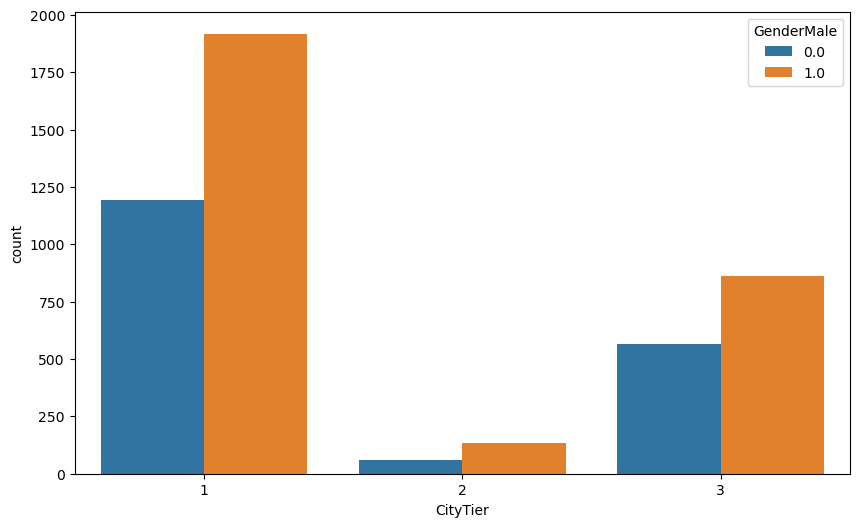

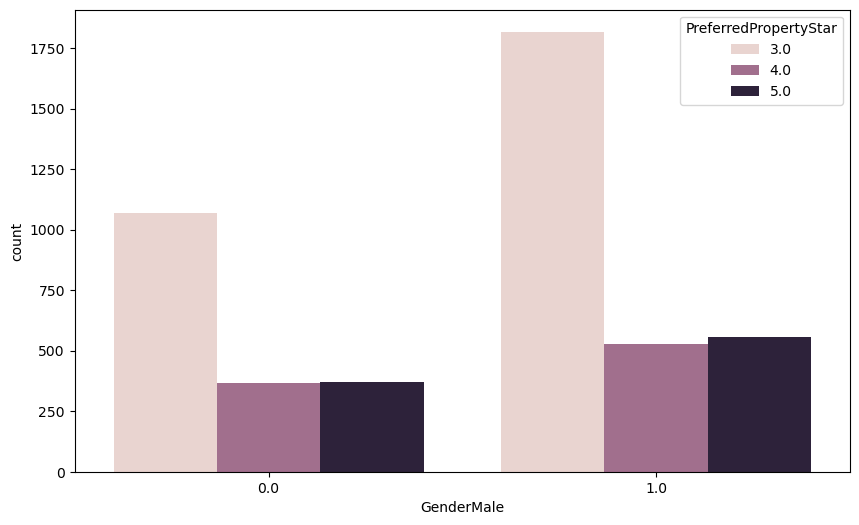

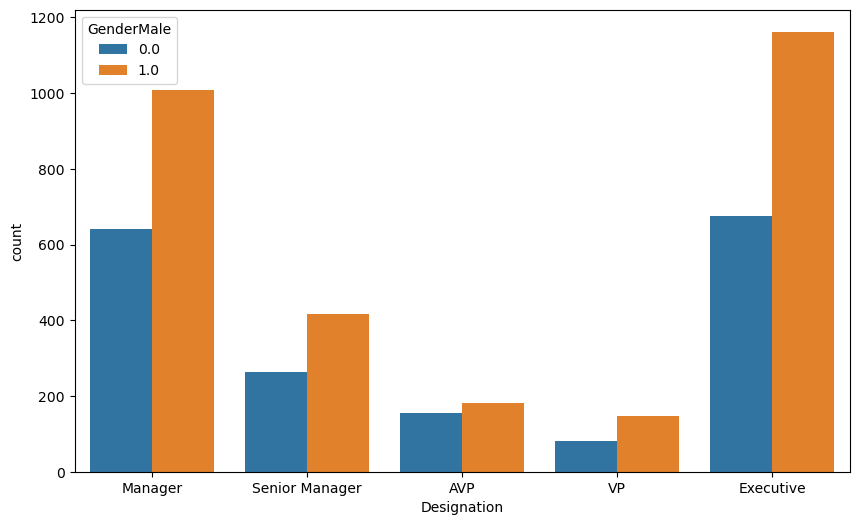

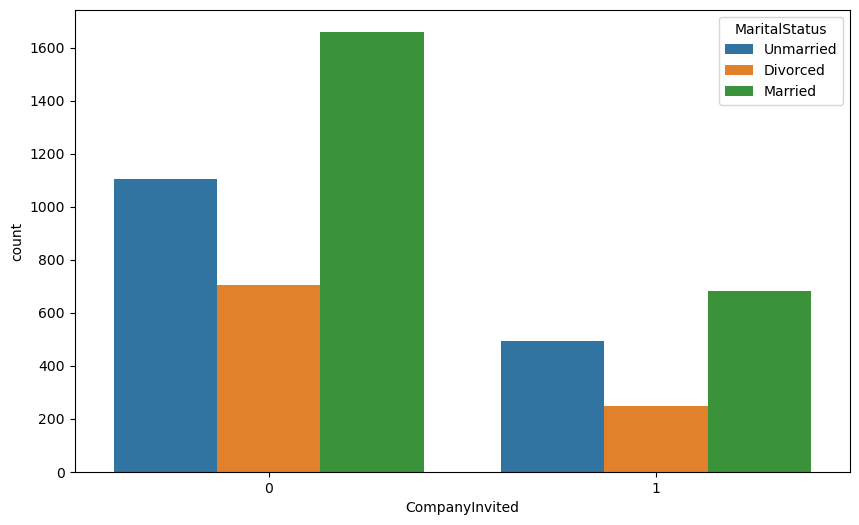

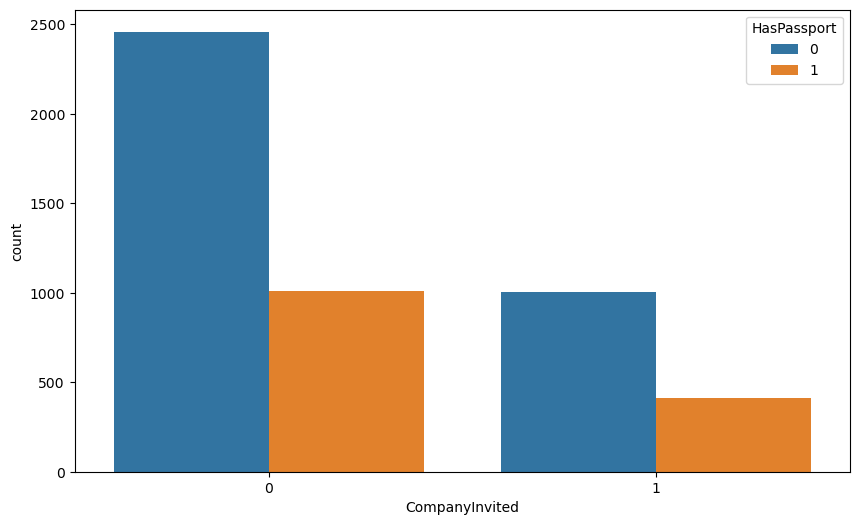

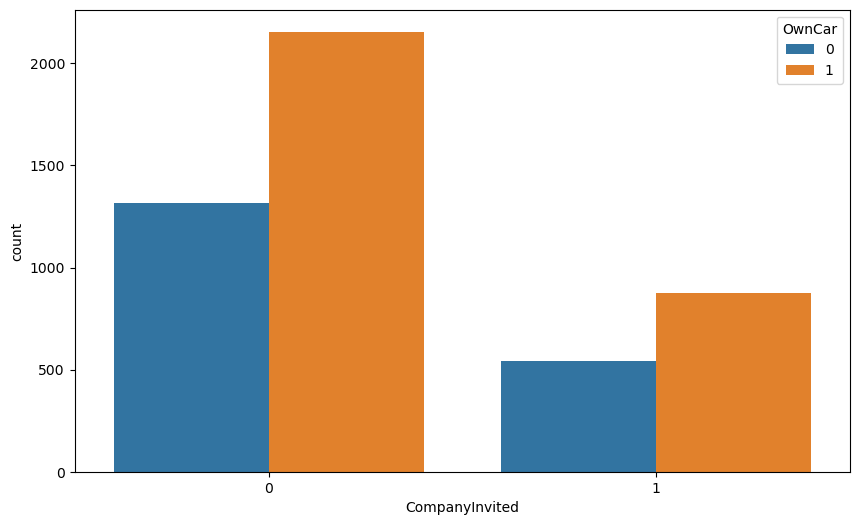

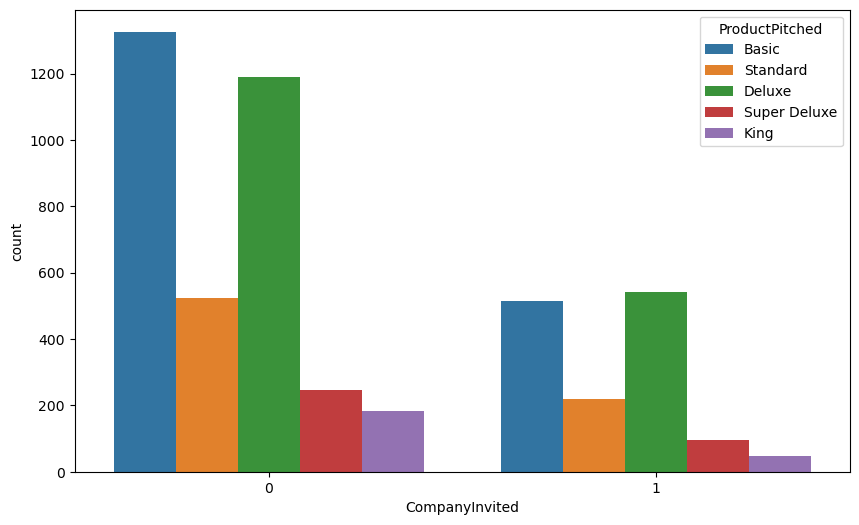

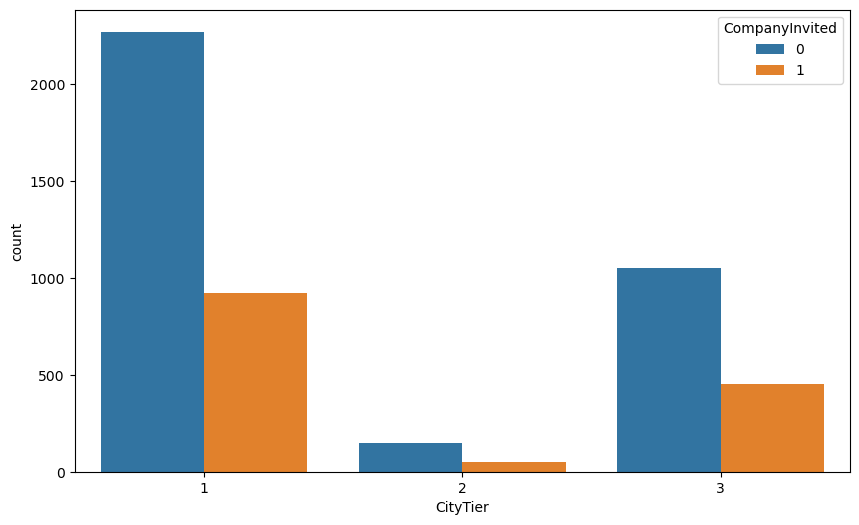

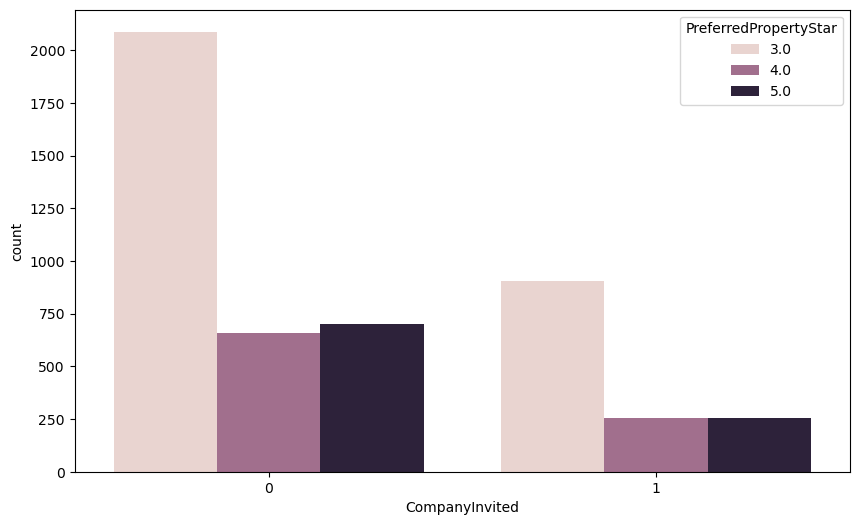

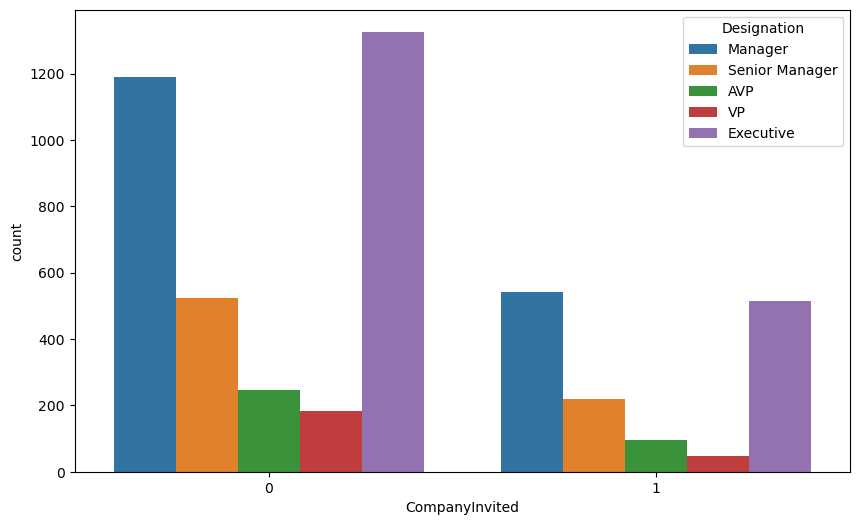

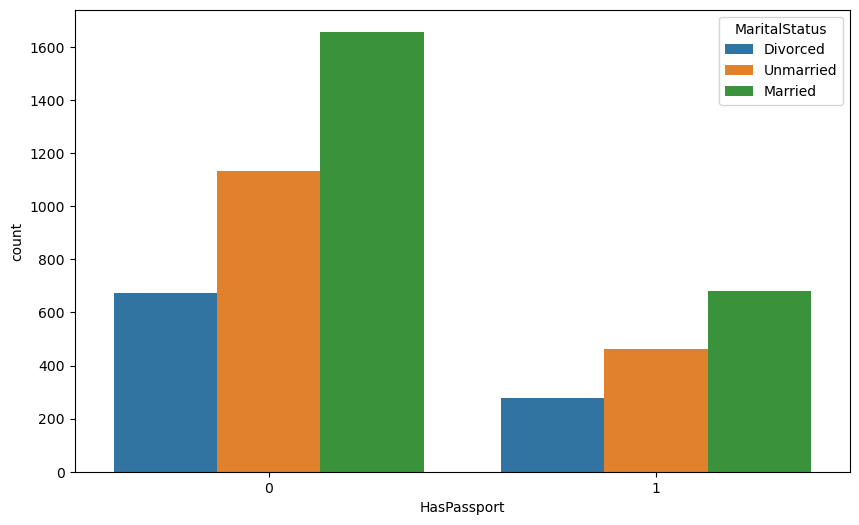

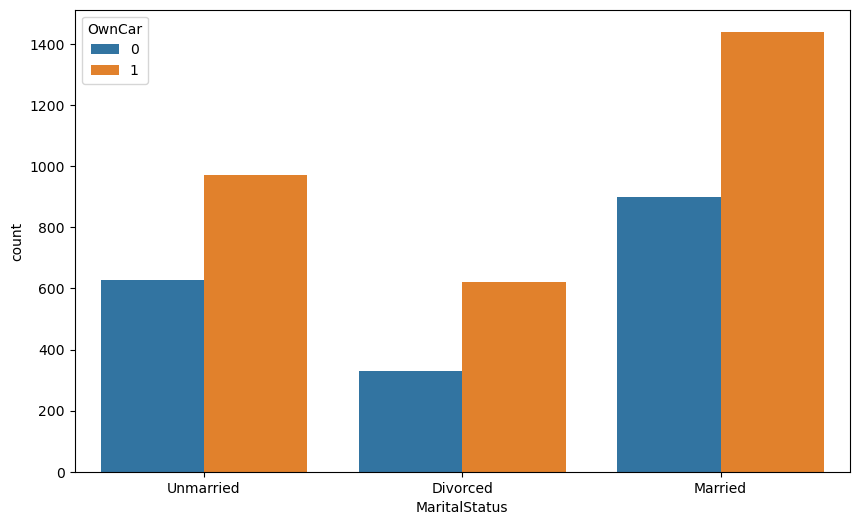

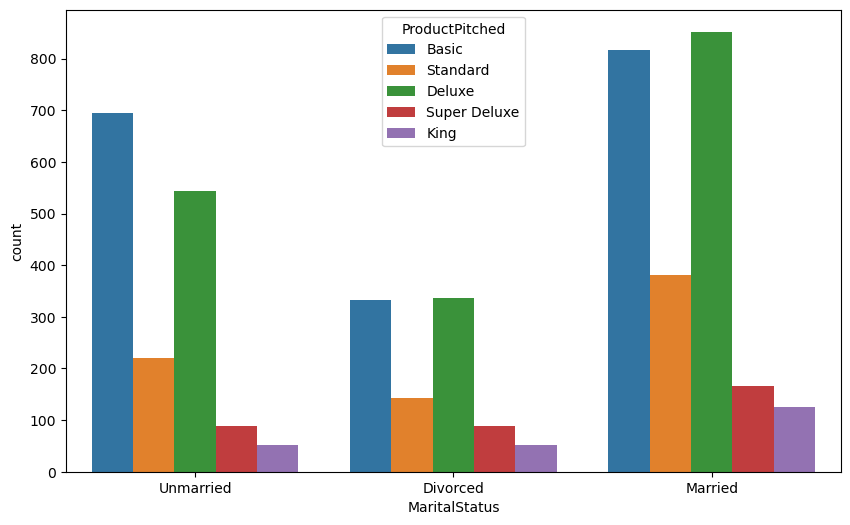

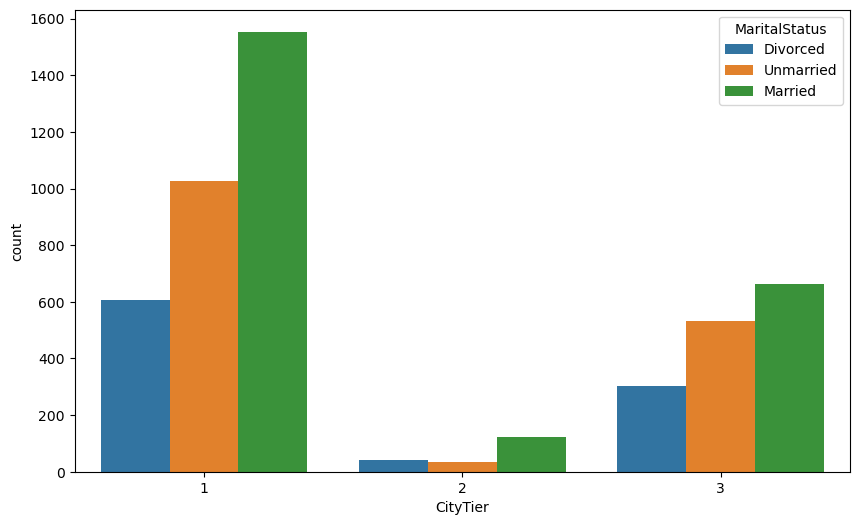

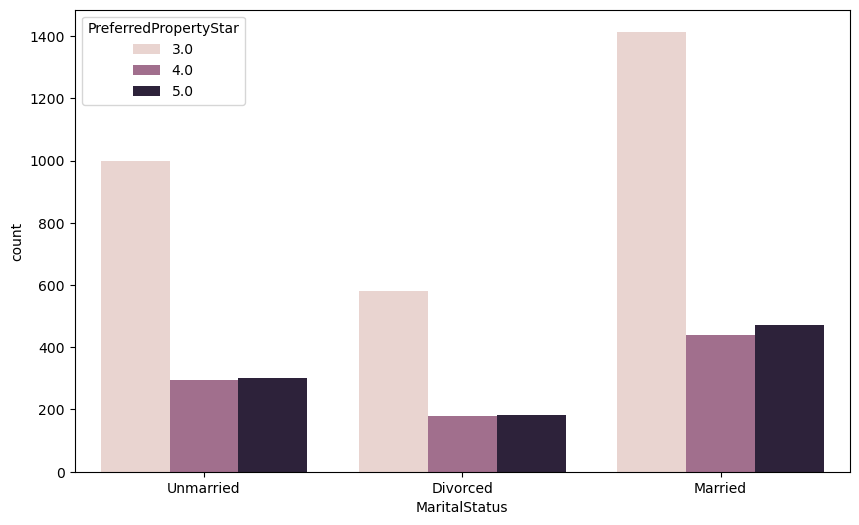

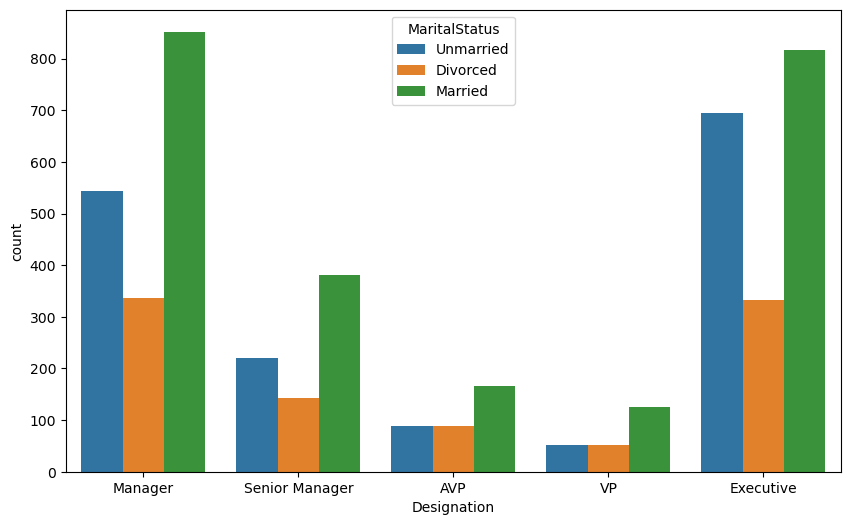

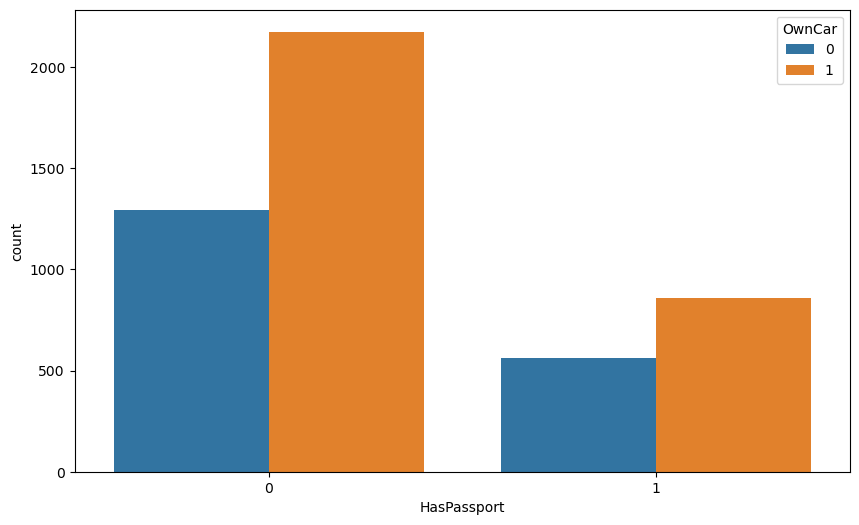

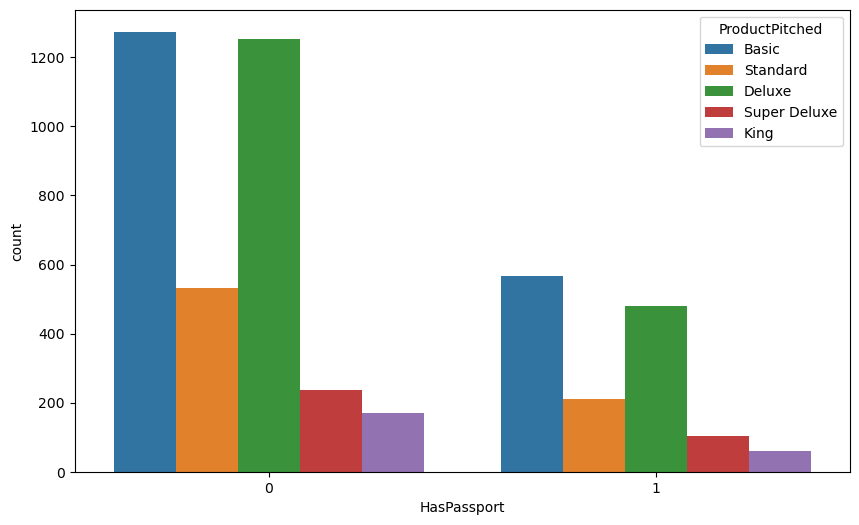

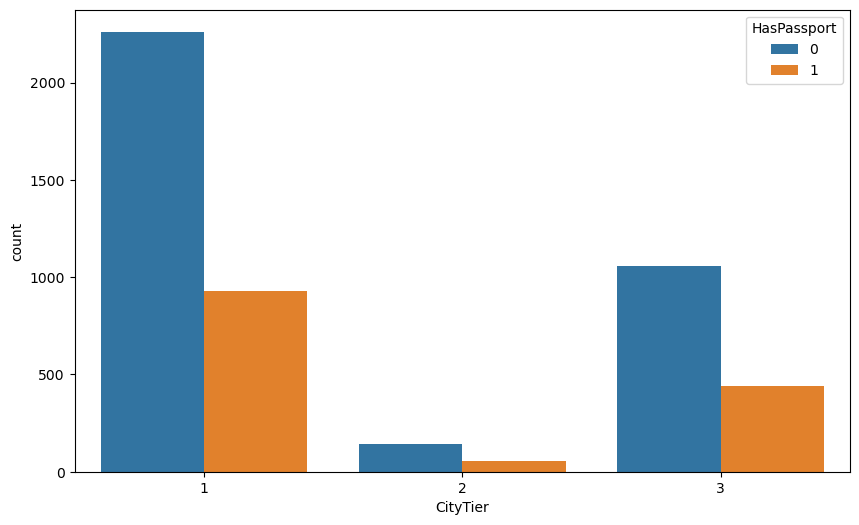

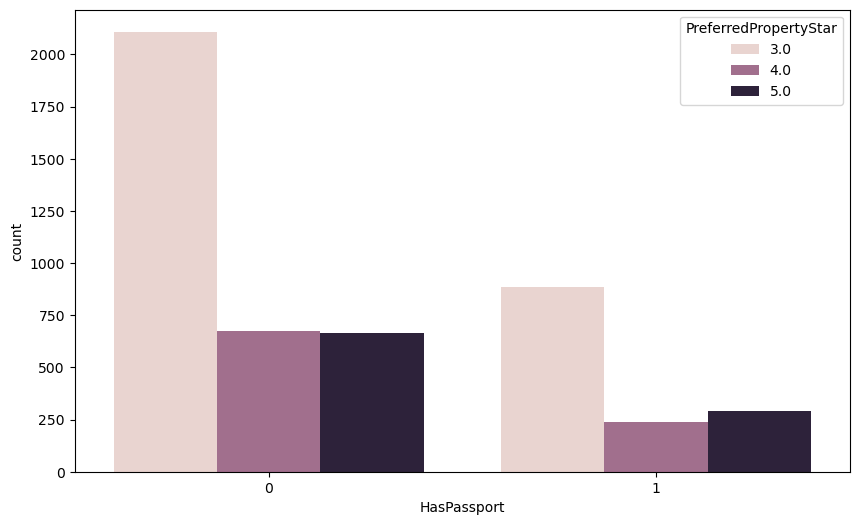

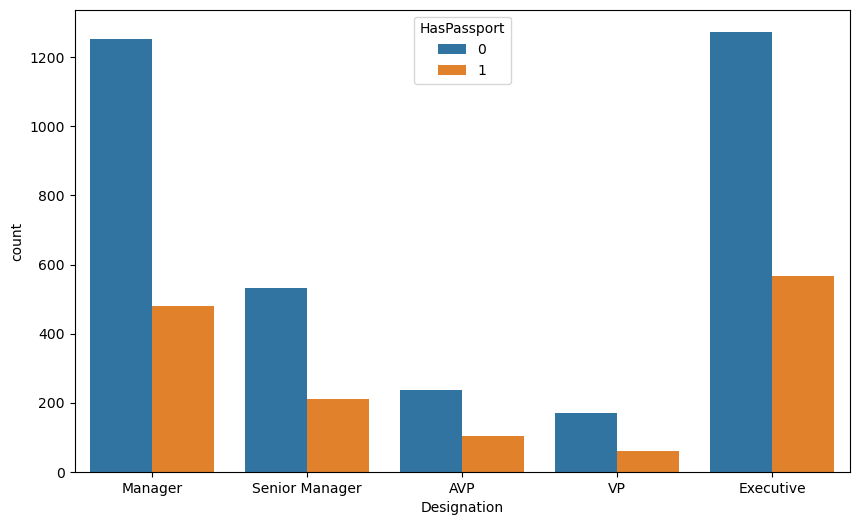

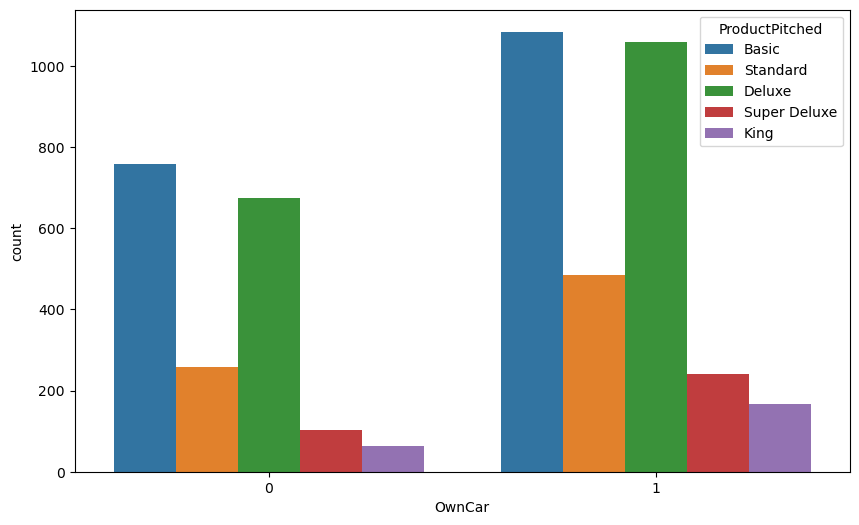

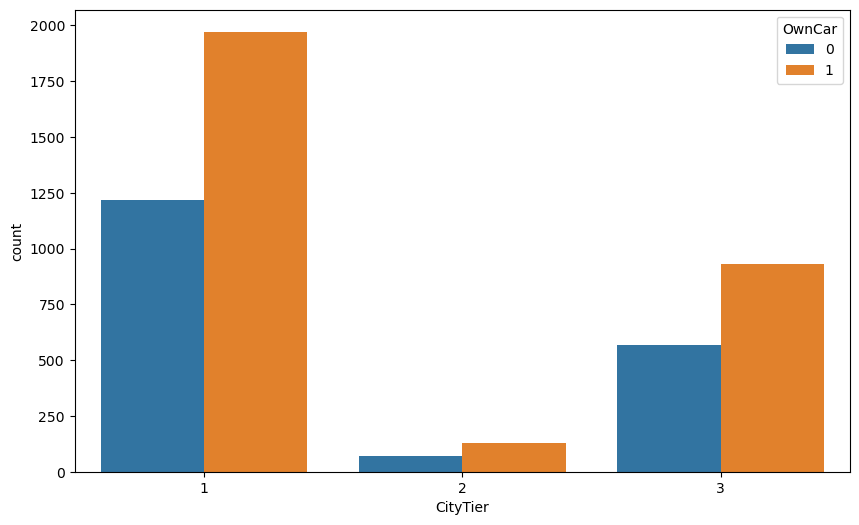

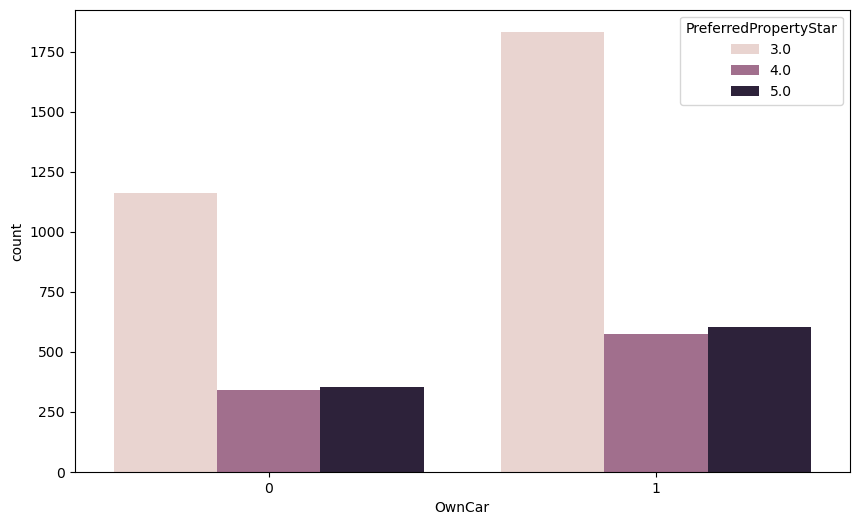

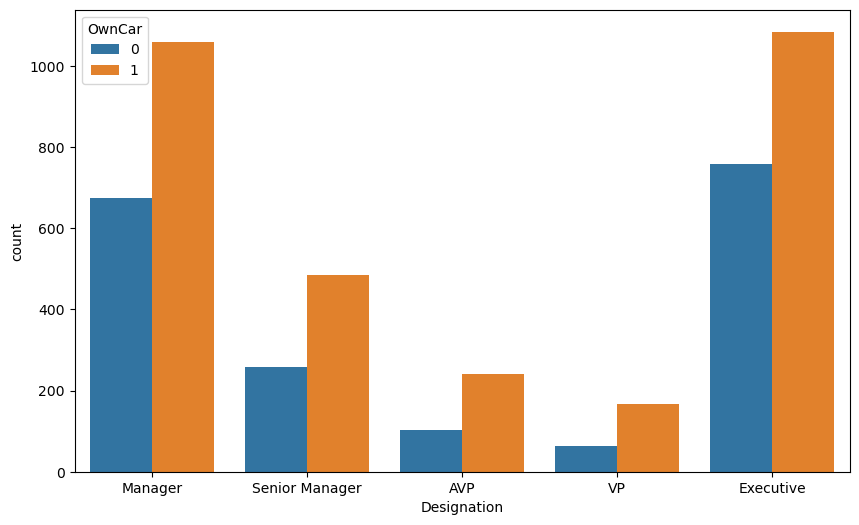

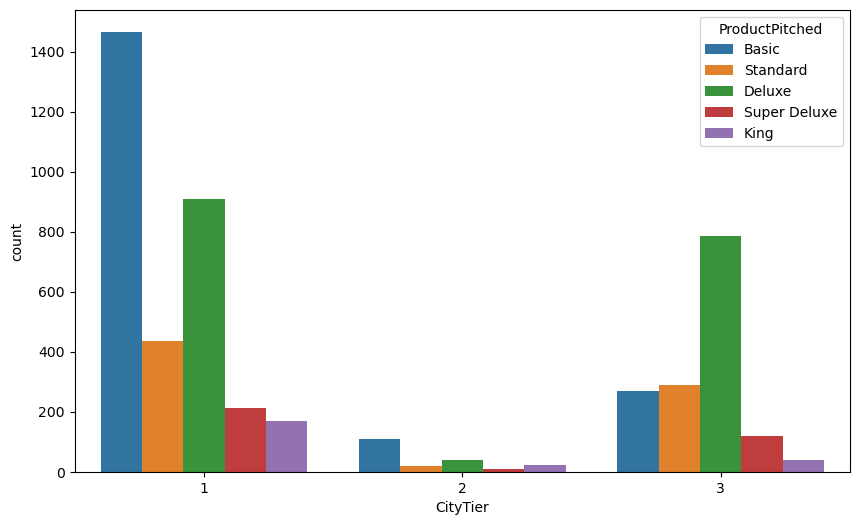

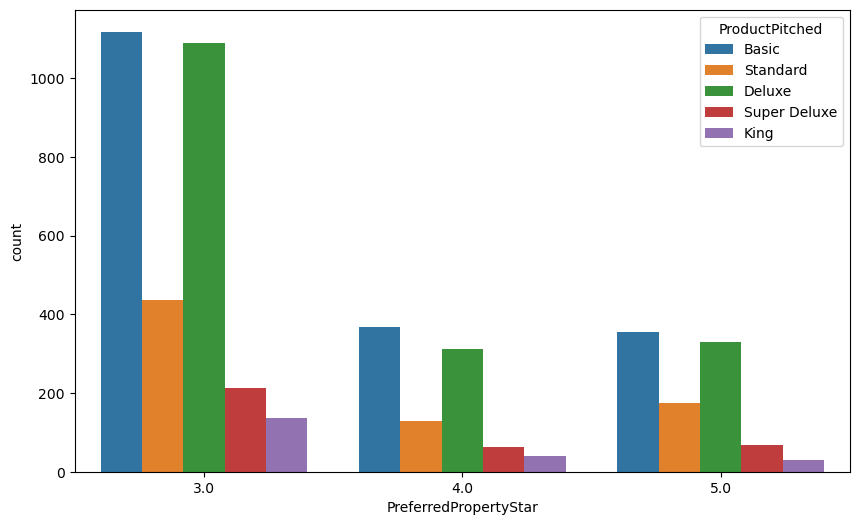

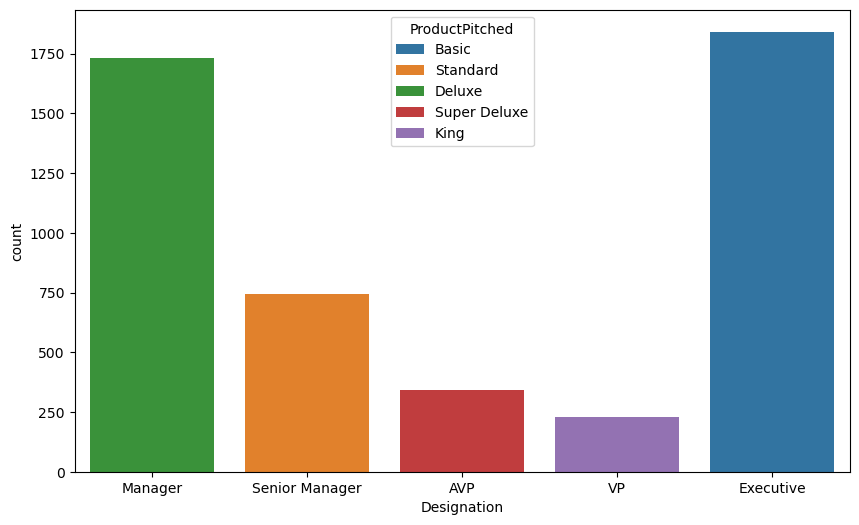

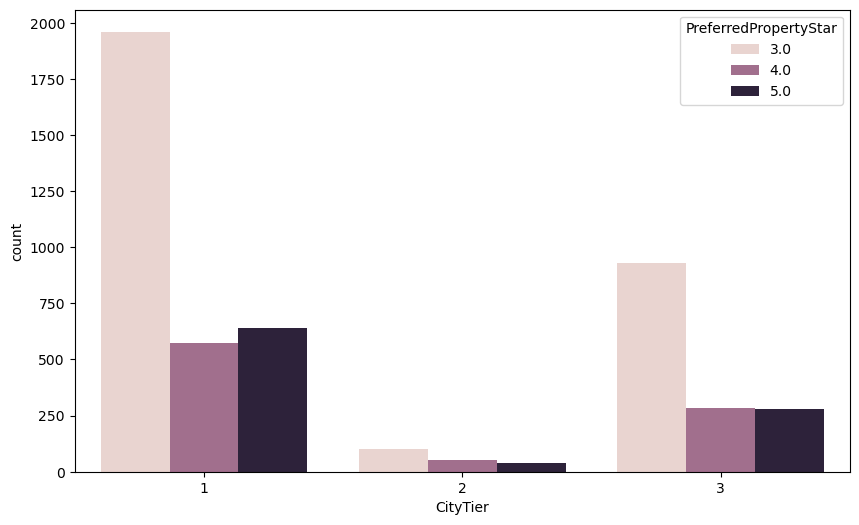

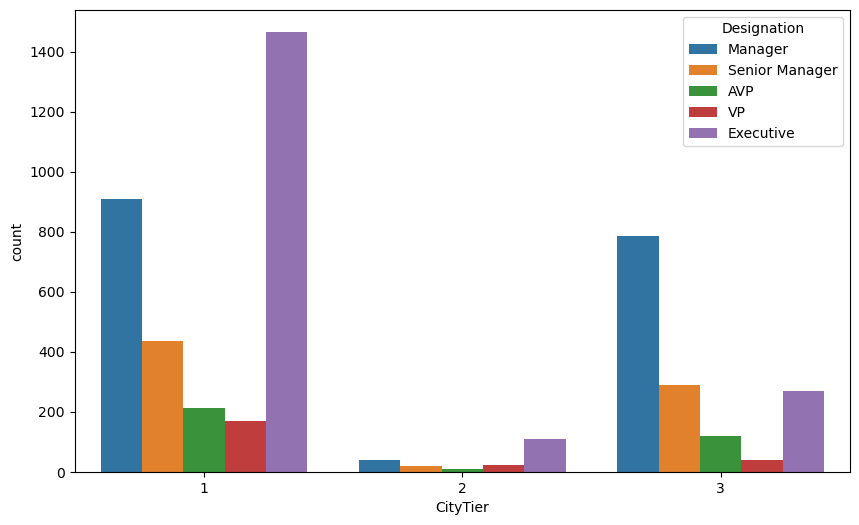

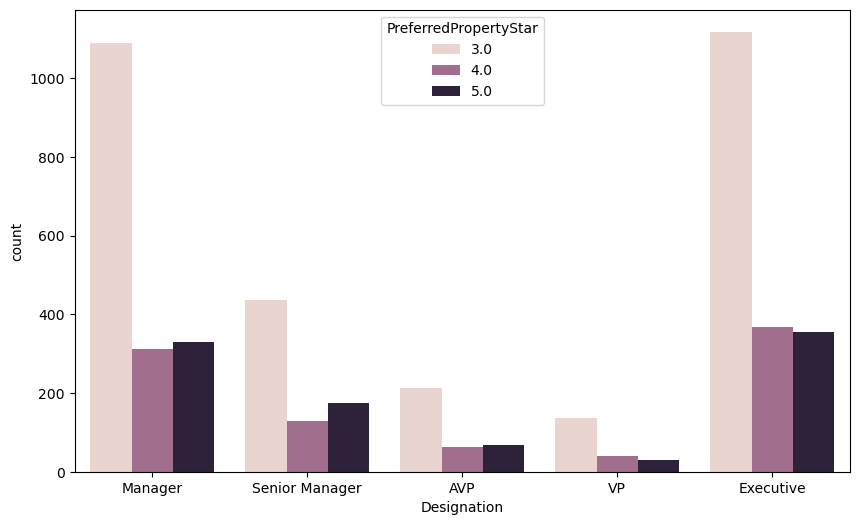

In [130]:
cat_comb = []
for cat1 in cat_col:
    for cat2 in cat_col:
        if cat1 != cat2 and sorted([cat1, cat2]) not in cat_comb:
            cat_comb.append(sorted([cat1, cat2]))
            

for comb in cat_comb:
    f, ax = plt.subplots(1,1,figsize=(10,6))
    sns.countplot(df, x=comb[0], hue=comb[1], ax=ax)
    plt.show();

**Insight:**

1. It is interesting that `ProductPitched` is 100% correlated with `Designation`. We can remove `Designation` later.
2. City tier 3, has a lot of small business compared to other tiers.

# 4 Drop Irrelevant Featrues from Exploratory Data Analysis

In [131]:
df.drop(columns='ProductPitched', inplace=True)

# 5. Pre-Feature Selections using Univariate Analysis

## 5.1 Create X and y for Feature Selection

In [132]:
##Feature Extraction Requirements
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
X = df.iloc[:,1:].copy()
X.drop(columns='CompanyInvited', inplace=True)
y = df.iloc[:,0].copy()

## 5.2. Create Encoder and Encoding Pipeline

In [134]:
#Encoding
#columns for Encoding
coded_col = ['Occupation','MaritalStatus','Designation']
#create encoder object
encoder = OrdinalEncoder(categories=[['Others','Small Business','Large Business'],
                                ['Unmarried','Married','Divorced'],
                                ['Executive','Manager','Senior Manager','AVP','VP']])
encoder.fit(X[coded_col])

column_encoder = ColumnTransformer([('encoder', encoder, coded_col)], 
                                   remainder = SimpleImputer(strategy='median'))
column_encoder.fit_transform(X)

#data preprocessing
preprocess = Pipeline([
    ('encoder', column_encoder),
    ('scaler', MinMaxScaler())
])

In [135]:
preprocess

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=SimpleImputer(strategy='median'),
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Others',
                                                                              'Small '
                                                                              'Business',
                                                                              'Large '
                                                                              'Business'],
                                                                             ['Unmarried',
                                                                              'Married',
                                                                              'Divorced'],
                                                                             ['Executive',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'AVP',
                                                                              'VP']]),
                                                  ['Occupation',
                                                   'MaritalStatus',
                                                   'Designation'])])),
                ('scaler', MinMaxScaler())])

## 5.3. Fit and Transform X to Pipeline

In [136]:
#Preprocess X
X = preprocess.fit_transform(X)
X = pd.DataFrame(X, columns=preprocess[:-1].get_feature_names_out())

## 5.4. Analyze Results

In [137]:
#seleksi feature dengan fungsi f_classif
f_stat, p_stat = f_classif(X,y)

Xc = X.columns
treshold = 0.05

feature_relevan = Xc[p_stat<treshold]
feature_tidak_relevan = Xc[p_stat>=treshold]

#save results in Pandas DataFrame
results = pd.DataFrame(np.concatenate([np.array(Xc).reshape(-1,1), 
                                       f_stat.reshape(-1,1), 
                                       p_stat.reshape(-1,1)], axis=1), 
                       columns=['features','f_stat','p_stat'])

results.loc[:,'features'] = results.loc[:,'features'].apply(lambda x: x.split('__')[-1])

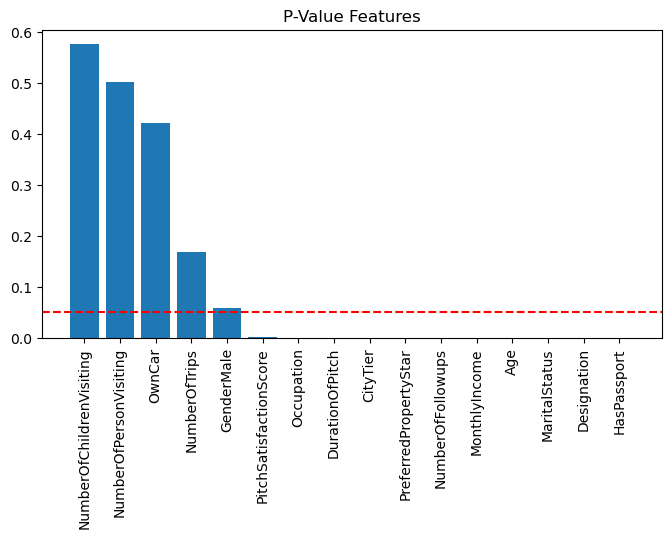

In [138]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='p_stat', ascending=False, inplace=True)

plt.bar(results.features, results.p_stat, axes=x)
x.axhline(treshold, ls='--', c='r')
plt.xticks(rotation=90)
plt.title("P-Value Features")
plt.show();

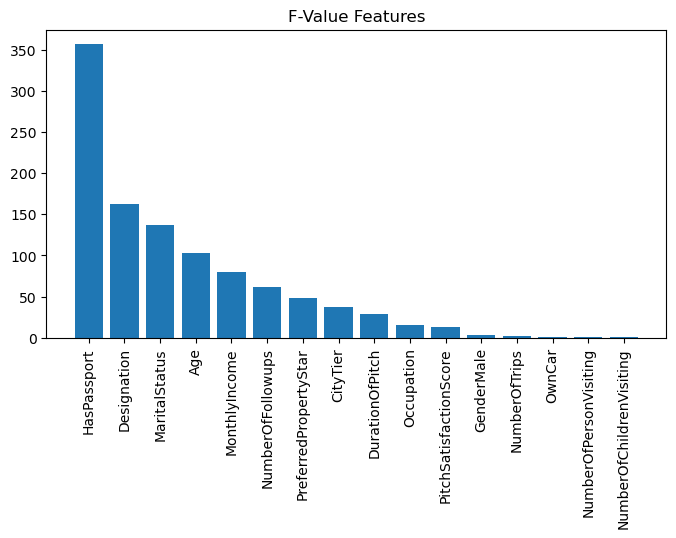

In [139]:
f, x = plt.subplots(1,1, figsize=(8,4))

results.sort_values(by='f_stat', ascending=False, inplace=True)

plt.bar(results.features, results.f_stat, axes=x)

plt.title("F-Value Features")
plt.xticks(rotation=90)
plt.show();

## 5.5. Remove Irrelevant Features

In [140]:
#Unimportant Features
unimportant_features = ['NumberOfChildrenVisiting',
                        'OwnCar',
                        'NumberOfPersonVisiting',
                        'NumberOfTrips',
                        'GenderMale']

In [141]:
df.drop(columns = unimportant_features, inplace=True)

# 6. Exploration Results:

from Exploratory Data Analysis we can get some clue thats our prefered customer targets should be:
1. Young Age: 18-25 years old
2. Monthly Income: 20.000 - 25.000
3. Role as Executives, better if they work on large business
4. Has Passport
5. Single
6. Come from City Tier 3
7. Increasing followups can increase the customers to take product
8. Invitations works though, but we need effective marketing to minimize cost

# 7. Creating Dataset for Training and Testing

## 7.1 Split Dataset for Training and Testing

In [230]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_key = ["ProdTaken","CompanyInvited"]

#split for calibration from training and testing
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_test_index, calibration_index in spliter.split(df, df[strat_key]):
    train_test_df = df.loc[train_test_index].copy().reset_index(drop=True)
    calibration_df = df.loc[calibration_index].copy().reset_index(drop=True)

In [231]:
#split for training and testing
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in spliter.split(train_test_df, train_test_df[strat_key]):
    train_df = train_test_df.loc[train_index].copy().reset_index(drop=True)
    test_df = train_test_df.loc[test_index].copy().reset_index(drop=True)

In [232]:
print('Shape of calibration dataset: ', calibration_df.shape)
print('Shape of training dataset: ', train_df.shape)
print('Shape of testing dataset: ', test_df.shape)

Shape of calibration dataset:  (489, 13)
Shape of training dataset:  (3519, 13)
Shape of testing dataset:  (880, 13)


## 7.2. Check For Separation Result

In [233]:
def compare_strat_split_res(columns_to_compare,
                            original_df=df,
                            calibration_df = calibration_df,
                            train_df=train_df, 
                            test_df=test_df):
    
    comb_value_count = pd.concat([df[columns_to_compare].value_counts(),
                                  calibration_df[columns_to_compare].value_counts(),
                                  train_df[columns_to_compare].value_counts(), 
                                  test_df[columns_to_compare].value_counts()],
                                 keys = ['Original_df', 'Calibration_df','Train_df', 'Test_df'],
                                 axis=1)

    comb_value_count_copy = comb_value_count.copy()

    for col in range(comb_value_count.shape[1]):
        for row in range(comb_value_count.shape[0]):
            comb_value_count.iloc[row,col] = np.round(a = 100*comb_value_count_copy.iloc[row,col]/comb_value_count_copy.sum(axis=0)[col], 
                                                      decimals = 2)

    comb_value_count = comb_value_count.assign(
        calErr = comb_value_count['Calibration_df'] - comb_value_count['Original_df'],
        trainErr = comb_value_count['Train_df'] - comb_value_count['Original_df'],
        testErr = comb_value_count['Test_df'] - comb_value_count['Original_df']
    )
        
    
    columns = [('Proportion of Features', 'Original df'),
               ('Proportion of Features', 'Calibration df'),
               ('Proportion of Features', 'Train df'),
               ('Proportion of Features', 'Test df'),
               ('Error', 'Calibration df'),
               ('Error', 'Train df'),
               ('Error', 'Test df')]
    
    comb_value_count.columns = pd.MultiIndex.from_tuples(columns)
    
    return comb_value_count

for col in strat_key:
    print(f"FOR `{col}` COLUMN:")
    display(compare_strat_split_res(col))
    print("=="*30, '\n\n')

FOR `ProdTaken` COLUMN:


Proportion of Features                                  \
                     Original df Calibration df Train df Test df   
ProdTaken                                                          
0                          81.18          81.19    81.19   81.14   
1                          18.82          18.81    18.81   18.86   

                   Error                   
          Calibration df Train df Test df  
ProdTaken                                  
0                   0.01     0.01   -0.04  
1                  -0.01    -0.01    0.04



FOR `CompanyInvited` COLUMN:


Proportion of Features                                  \
                          Original df Calibration df Train df Test df   
CompanyInvited                                                          
0                               70.97          70.96    70.96   71.02   
1                               29.03          29.04    29.04   28.98   

                        Error                   
               Calibration df Train df Test df  
CompanyInvited                                  
0                       -0.01    -0.01    0.05  
1                        0.01     0.01   -0.05

In [234]:
calibration_df.head()

ProdTaken   Age  CompanyInvited  CityTier  DurationOfPitch      Occupation  \
0          0  38.0               0         1             21.0          Others   
1          0  39.0               1         1             30.0          Others   
2          0  34.0               0         1              7.0          Others   
3          0  33.0               1         1              9.0          Others   
4          0  23.0               0         1             26.0  Small Business   

   NumberOfFollowups  PreferredPropertyStar MaritalStatus  HasPassport  \
0                4.0                    5.0       Married            0   
1                5.0                    3.0     Unmarried            0   
2                5.0                    5.0     Unmarried            1   
3                4.0                    3.0     Unmarried            1   
4                4.0                    3.0      Divorced            0   

   PitchSatisfactionScore     Designation  MonthlyIncome  
0                       4       Executive        21712.0  
1                       3  Senior Manager        28204.0  
2                       4       Executive        21477.0  
3                       5         Manager        23676.0  
4                       2       Executive        21001.0

In [235]:
train_df.head()

ProdTaken   Age  CompanyInvited  CityTier  DurationOfPitch      Occupation  \
0          0  40.0               1         1              6.0  Small Business   
1          0   NaN               1         1             24.0          Others   
2          0  44.0               1         1              7.0          Others   
3          0  31.0               0         2             14.0  Small Business   
4          0  50.0               0         1             16.0  Large Business   

   NumberOfFollowups  PreferredPropertyStar MaritalStatus  HasPassport  \
0                5.0                    3.0      Divorced            0   
1                2.0                    3.0      Divorced            0   
2                4.0                    3.0       Married            0   
3                1.0                    4.0     Unmarried            0   
4                4.0                    3.0     Unmarried            0   

   PitchSatisfactionScore     Designation  MonthlyIncome  
0                       5              VP        37950.0  
1                       5       Executive        18688.0  
2                       1         Manager        24240.0  
3                       1       Executive        17109.0  
4                       5  Senior Manager        25496.0

In [236]:
test_df.head()

ProdTaken   Age  CompanyInvited  CityTier  DurationOfPitch Occupation  \
0          0  35.0               0         1             13.0     Others   
1          0  35.0               0         2             32.0     Others   
2          0  38.0               1         1              9.0     Others   
3          0  35.0               1         1              9.0     Others   
4          0   NaN               0         1              8.0     Others   

   NumberOfFollowups  PreferredPropertyStar MaritalStatus  HasPassport  \
0                4.0                    3.0       Married            0   
1                3.0                    3.0     Unmarried            1   
2                3.0                    3.0       Married            0   
3                4.0                    3.0       Married            0   
4                3.0                    3.0       Married            0   

   PitchSatisfactionScore     Designation  MonthlyIncome  
0                       3       Executive        17690.0  
1                       1  Senior Manager        23837.0  
2                       3       Executive        17821.0  
3                       1       Executive        16281.0  
4                       1         Manager            NaN

> Initial Separation of Training and Testing Dataset was Conducted Succesfully

# 8. Handling Outliers

In [237]:
#list of numerical columns
#descrete numerical columns
dnum_col = [
    'NumberOfFollowups',
    'PitchSatisfactionScore',
]

#continuous numerical columns
cnum_col = [
    'Age',
    'DurationOfPitch',
    'MonthlyIncome'
]

#list of categorical columns
ncat_col = [
    'Occupation',
    'CompanyInvited',
    'MaritalStatus',
    'HasPassport'
]

ocat_col = [
    'CityTier',
    'PreferredPropertyStar',
    'Designation'
]

#target column
target_col = ['ProdTaken']

#total numerical column
num_col = dnum_col + cnum_col
#total categorical column
cat_col = ncat_col + ocat_col

In [238]:
def get_outlier_indexes(df, n = 1.5):
    df = df.copy()
    outlier_indexes = []
    for col in df.columns:
        Q25 = df[col].quantile(q=0.25)
        Q75 = df[col].quantile(q=0.75)
        lower_treshold = Q25 - n*(Q75-Q25)
        upper_treshold = Q75 + n*(Q75-Q25)

        indexes = df[(df[col] < lower_treshold) | (df[col] > upper_treshold)].index
        for index in indexes:
            if index not in outlier_indexes:
                outlier_indexes.append(index)
    return outlier_indexes

def percent_separation(series):
    total = series.sum(axis=0)
    series_cal = series.apply(lambda x: np.round(100*x/total, 2))
    res = pd.concat([series, series_cal], axis=1)
    res.columns = ['qty', '%']
    return res

def report_separation(outliers_df, col, y_col='ProdTaken'):
    fig, ax = plt.subplots(1,1, figsize=(8, 4))   
    sns.violinplot(outliers_df, x=col, hue=y_col, ax=ax)
    plt.title(col, size=20)
    plt.plot();

def report_distribution(outliers_df, col, actual_df = train_df):
    print(f"FEATURE: {col}")
    print(f"The total outliers within Training Dataset are {n_outliers} rows, which is equals to {100*n_outliers/len(actual_df) :.2f}%")
    display( percent_separation(outliers_df.loc[:, target_col].value_counts()) )
    print("=="*70, "\n")

## 8.1. Analysis of Outliers

### 8.1.1. Analysis of Outliers per Features

FEATURE: NumberOfFollowups
The total outliers within Training Dataset are 229 rows, which is equals to 6.51%


qty      %
ProdTaken            
0          171  74.67
1           58  25.33


FEATURE: DurationOfPitch
The total outliers within Training Dataset are 1 rows, which is equals to 0.03%


qty      %
ProdTaken            
0            1  100.0


FEATURE: MonthlyIncome
The total outliers within Training Dataset are 240 rows, which is equals to 6.82%


qty      %
ProdTaken            
0          215  89.58
1           25  10.42

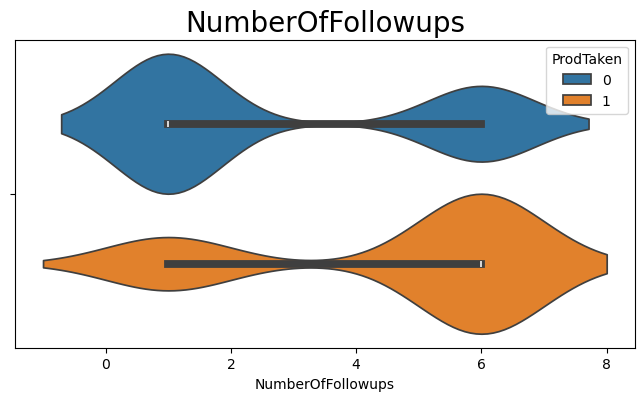

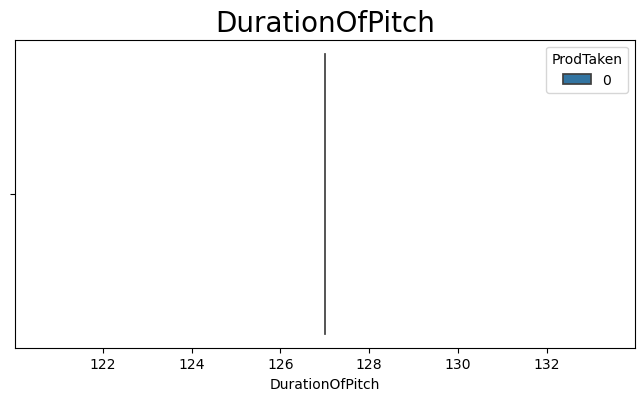

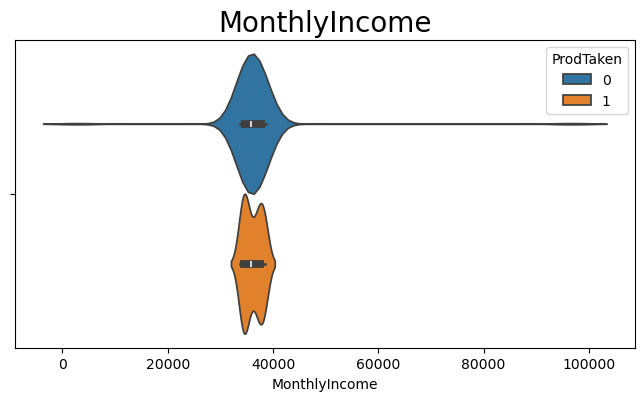

In [239]:
inspect_col = num_col

for col in inspect_col:
    outlier_indexes = get_outlier_indexes(train_df[[col]])
    n_outliers = len(outlier_indexes)
    outliers_df = train_df.iloc[outlier_indexes, :].copy()

    if n_outliers > 0:
        report_separation(outliers_df, col)
        report_distribution(outliers_df, col)

### 8.1.2. Analysis of Outliers on Total Numerical Features

In [240]:
outlier_indexes = get_outlier_indexes(train_df[inspect_col])
n_outliers = len(outlier_indexes)
outliers_df = train_df.iloc[outlier_indexes, :].copy()

report_distribution(outliers_df, num_col)

FEATURE: ['NumberOfFollowups', 'PitchSatisfactionScore', 'Age', 'DurationOfPitch', 'MonthlyIncome']
The total outliers within Training Dataset are 460 rows, which is equals to 13.07%


qty      %
ProdTaken            
0          380  82.61
1           80  17.39

## 8.2. Remove Outliers from Traning Dataset to Testing Dataset

In [241]:
move_outlier_cols = ['MonthlyIncome', 'DurationOfPitch']

outlier_indexes = get_outlier_indexes(train_df[move_outlier_cols])
outliers_df = train_df.iloc[outlier_indexes, :].copy()

In [242]:
print(f"length before adding Outliers {len(train_df)}")

train_df.drop(outlier_indexes, inplace=True)

print(f"length after adding Outliers {len(train_df)}")

display(test_df.head())

length before adding Outliers 3519
length after adding Outliers 3278


ProdTaken   Age  CompanyInvited  CityTier  DurationOfPitch Occupation  \
0          0  35.0               0         1             13.0     Others   
1          0  35.0               0         2             32.0     Others   
2          0  38.0               1         1              9.0     Others   
3          0  35.0               1         1              9.0     Others   
4          0   NaN               0         1              8.0     Others   

   NumberOfFollowups  PreferredPropertyStar MaritalStatus  HasPassport  \
0                4.0                    3.0       Married            0   
1                3.0                    3.0     Unmarried            1   
2                3.0                    3.0       Married            0   
3                4.0                    3.0       Married            0   
4                3.0                    3.0       Married            0   

   PitchSatisfactionScore     Designation  MonthlyIncome  
0                       3       Executive        17690.0  
1                       1  Senior Manager        23837.0  
2                       3       Executive        17821.0  
3                       1       Executive        16281.0  
4                       1         Manager            NaN

## 8.3. Check Training And Testing Dataset after Handling Outliers

In [244]:
for col in strat_key:
    print(f"FOR `{col}` COLUMN:")
    display(compare_strat_split_res(col))
    print("=="*30, '\n\n')

FOR `ProdTaken` COLUMN:


Proportion of Features                                  \
                     Original df Calibration df Train df Test df   
ProdTaken                                                          
0                          81.18          81.19    80.57   81.14   
1                          18.82          18.81    19.43   18.86   

                   Error                   
          Calibration df Train df Test df  
ProdTaken                                  
0                   0.01    -0.61   -0.04  
1                  -0.01     0.61    0.04



FOR `CompanyInvited` COLUMN:


Proportion of Features                                  \
                          Original df Calibration df Train df Test df   
CompanyInvited                                                          
0                               70.97          70.96    70.41   71.02   
1                               29.03          29.04    29.59   28.98   

                        Error                   
               Calibration df Train df Test df  
CompanyInvited                                  
0                       -0.01    -0.56    0.05  
1                        0.01     0.56   -0.05

# 9. Save To Training and Testing Dataset

In [245]:
#save calibration dataset
calibration_df.to_csv('calibration.csv', index=False)

#save training dataset
train_df.to_csv('train.csv', index=False)

#save training dataset
test_df.to_csv('test.csv', index=False)

#save fullset dataset
df.to_csv('full_df.csv', index=False)

# 10. Define X_train and y_train

In [57]:
#list of numerical columns
#descrete numerical columns
dnum_col = [
    'NumberOfFollowups',
    'PitchSatisfactionScore',
]

#continuous numerical columns
cnum_col = [
    'Age',
    'DurationOfPitch',
    'MonthlyIncome'
]

#list of categorical columns
ncat_col = [
    'Occupation',
    'CompanyInvited',
    'MaritalStatus',
    'HasPassport'
]

ocat_col = [
    'CityTier',
    'PreferredPropertyStar',
    'Designation'
]

#target column
target_col = ['ProdTaken']
##

#total numerical column
num_col = dnum_col + cnum_col
#total categorical column
cat_col = ncat_col + ocat_col

In [58]:
X_cal = calibration_df.drop(columns=['ProdTaken', 'CompanyInvited']).copy()
y_cal = calibration_df.ProdTaken.copy()

X_train = train_df.drop(columns=['ProdTaken', 'CompanyInvited']).copy()
y_train = train_df.ProdTaken.copy()

X_test = test_df.drop(columns=['ProdTaken', 'CompanyInvited']).copy()
y_test = test_df.ProdTaken.copy()

In [59]:
#for calibration set
print('X_cal shape: ', X_cal.shape)
print('y_cal shape: ', y_cal.shape)

#for train set
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

#for test set
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_cal shape:  (489, 11)
y_cal shape:  (489,)
X_train shape:  (3278, 11)
y_train shape:  (3278,)
X_test shape:  (1121, 11)
y_test shape:  (1121,)


# 11. Model Building Steps

Data Cleaning is Essensial Steps in Machine Learning Preprocessing. The steps of Data Cleaning in this Project includings:

## 11.1. Missing Values Imputations Step
to input missing values, we need to check the Features that has missing values in it. And then we can decide which strategy to treat with missing data.

### 11.1.1 Create Function to Check Null Values

In [60]:
def check_null(df, display_only_null=True):
    null = pd.concat([df.isna().sum(), 100*df.isna().sum()/len(df)], axis=1) \
                  .rename(columns = {0:'QTY Null', 1:'Percent Null'})

    if display_only_null:
        null =  null[null['QTY Null'] > 0]

    #display
    if len(null)==0:
        print(f"There's No Null Values within DataFrame")
    else:
        return null

In [61]:
check_null(train_df)

QTY Null  Percent Null
Age                     164      5.003051
DurationOfPitch         175      5.338621
NumberOfFollowups        32      0.976205
MonthlyIncome           161      4.911531

In [62]:
check_null(test_df)

QTY Null  Percent Null
Age                          40      3.568243
DurationOfPitch              52      4.638715
NumberOfFollowups             8      0.713649
PreferredPropertyStar        23      2.051740
MonthlyIncome                54      4.817128

we can see that missing values are for numerical data, the QTY of null are small (only 5,2% at maximum), and the most important is the doesn't follow normal distribution. with this, we can do simple imputation of missing values with median.

### 11.1.2. Create Custom Imputation Class

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

In [64]:
#create class for adding features
class ColumnImputer(TransformerMixin, BaseEstimator):
    """
    Encode Columns
    """
    #initialize function
    def __init__(self,
                 steps=[],
                 remainder='passthrough'):
        
        super().__init__()
        self.steps = steps
        self.remainder = remainder

    #fit somethings
    def fit(self, X, y=None):
        self.X_train = X.copy()
        self.cl = ColumnTransformer(self.steps,
                                    remainder=self.remainder)
        self.cl.fit(self.X_train)
        return self

    #transform column
    def transform(self, X, y=None):
        self.X_test = X.copy()
        
        columns = [col.split('__')[-1] for col in self.cl.get_feature_names_out()]
        
        return pd.DataFrame(self.cl.transform(self.X_test), columns = columns)

### 11.1.3. Test Custom Imputation Class

In [65]:
nan_col = ['Age',
           'DurationOfPitch',
           'NumberOfFollowups',
           'PreferredPropertyStar',
           'MonthlyIncome']

imputer = ColumnImputer([('median_imputer',
                          SimpleImputer(strategy='median'),
                          nan_col)])

In [66]:
res_train = imputer.fit_transform(X_train)
res_train.head()

Age DurationOfPitch NumberOfFollowups PreferredPropertyStar MonthlyIncome  \
0  36.0            24.0               2.0                   3.0       18688.0   
1  44.0             7.0               4.0                   3.0       24240.0   
2  31.0            14.0               1.0                   4.0       17109.0   
3  50.0            16.0               4.0                   3.0       25496.0   
4  55.0            24.0               4.0                   3.0       29417.0   

  CityTier      Occupation MaritalStatus HasPassport PitchSatisfactionScore  \
0        1          Others      Divorced           0                      5   
1        1          Others       Married           0                      1   
2        2  Small Business     Unmarried           0                      1   
3        1  Large Business     Unmarried           0                      5   
4        1  Large Business      Divorced           0                      5   

      Designation  
0       Executive  
1         Manager  
2       Executive  
3  Senior Manager  
4  Senior Manager

In [67]:
check_null(res_train)

There's No Null Values within DataFrame


## 11.2 Feature Balancing Step

In [68]:
from imblearn.over_sampling import RandomOverSampler, SMOTENC

In [69]:
#Defining Dummy Over Sampler
class DummyOverSampler(RandomOverSampler):
    def __init__(self,
                 sampling_strategy = 'auto',
                 shrinkage=None,
                 random_state=None):
        super().__init__()
        self.sampling_strategy = sampling_strategy
        self.shrinkage = shrinkage
        self.random_state = random_state

    #fit nothing
    def fit(self, X, y):
        return self

    #transform nothing
    def fit_resample(self, X, y):
        return X, y

In [70]:
#setting random seed
seed = 6

dos = DummyOverSampler()
ros = RandomOverSampler(random_state=seed)
smotenc = SMOTENC(categorical_features=cat_col, random_state=seed)

## 11.4. Encodings Step

### 11.4.1. Create Custom Encoder Class

In [71]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#create class for adding features
class ICode(TransformerMixin):
    """
    Adding New Features, X must be in Pandas DataFrame format
    """
    #initialize function
    def __init__(self, 
                 ordinal_encoder=None, 
                 nominal_encoder=None,
                 ordinal_column=None,
                 ordinal_column_categories=None,
                 nominal_column=None,
                 nominal_column_categories=None,
                 remainder='passthrough'):
        
        super().__init__()
        self.ordinal_encoder = ordinal_encoder
        self.nominal_encoder = nominal_encoder
        self.ordinal_column = ordinal_column
        self.ordinal_column_categories = ordinal_column_categories
        self.nominal_column = nominal_column
        self.nominal_column_categories  = nominal_column_categories
        self.remainder = remainder

        from sklearn.compose import ColumnTransformer

    #fit somethings
    def fit(self, X, y=None):   
        self.X_train = X.copy()

        #if only nominal encoder
        if self.ordinal_encoder == None:
            self.ohe = self.nominal_encoder(categories = self.nominal_column_categories,
                                            sparse_output = False)
            self.cl = ColumnTransformer([('ohe', self.ohe, self.nominal_column)], 
                                        remainder=self.remainder)

        #if only ordinal encoder
        elif self.nominal_encoder == None:
            self.oe = self.ordinal_encoder(categories = self.ordinal_column_categories)
            self.cl = ColumnTransformer([('oe', self.oe, self.ordinal_column)], 
                                        remainder=self.remainder)
        
        elif (self.nominal_encoder == None) & (self.ordinal_encoder == None):
            pass

        else:
            self.oe = self.ordinal_encoder(categories = self.ordinal_column_categories)
            self.ohe = self.nominal_encoder(categories = self.nominal_column_categories,
                                            sparse_output = False)
    
            self.cl = ColumnTransformer([('oe', self.oe, self.ordinal_column),
                                         ('ohe', self.ohe, self.nominal_column)], 
                                        remainder=self.remainder)
        self.cl.fit(self.X_train)
        return self

    #transform column
    def transform(self, X, y=None):
        self.X_test = X.copy()
        
        columns = [col.split('__')[-1] for col in self.cl.get_feature_names_out()]
        
        return pd.DataFrame(self.cl.transform(self.X_test), columns = columns)

In [72]:
#define ordinal column to be encoded
ohe_col = ['MaritalStatus', 'Occupation','Designation']
ohe_categories = [['Unmarried','Married','Divorced'],
                  ['Others','Small Business','Large Business'],
                  ['Executive','Manager','Senior Manager','AVP','VP']]

encoder = ICode(nominal_encoder = OneHotEncoder,
                nominal_column = ohe_col,
                nominal_column_categories = ohe_categories)

In [73]:
encoder.fit_transform(X_train).head()

MaritalStatus_Unmarried  MaritalStatus_Married  MaritalStatus_Divorced  \
0                      0.0                    0.0                     1.0   
1                      0.0                    1.0                     0.0   
2                      1.0                    0.0                     0.0   
3                      1.0                    0.0                     0.0   
4                      0.0                    0.0                     1.0   

   Occupation_Others  Occupation_Small Business  Occupation_Large Business  \
0                1.0                        0.0                        0.0   
1                1.0                        0.0                        0.0   
2                0.0                        1.0                        0.0   
3                0.0                        0.0                        1.0   
4                0.0                        0.0                        1.0   

   Designation_Executive  Designation_Manager  Designation_Senior Manager  \
0                    1.0                  0.0                         0.0   
1                    0.0                  1.0                         0.0   
2                    1.0                  0.0                         0.0   
3                    0.0                  0.0                         1.0   
4                    0.0                  0.0                         1.0   

   Designation_AVP  Designation_VP   Age  CityTier  DurationOfPitch  \
0              0.0             0.0   NaN       1.0             24.0   
1              0.0             0.0  44.0       1.0              7.0   
2              0.0             0.0  31.0       2.0             14.0   
3              0.0             0.0  50.0       1.0             16.0   
4              0.0             0.0  55.0       1.0             24.0   

   NumberOfFollowups  PreferredPropertyStar  HasPassport  \
0                2.0                    3.0          0.0   
1                4.0                    3.0          0.0   
2                1.0                    4.0          0.0   
3                4.0                    3.0          0.0   
4                4.0                    3.0          0.0   

   PitchSatisfactionScore  MonthlyIncome  
0                     5.0        18688.0  
1                     1.0        24240.0  
2                     1.0        17109.0  
3                     5.0        25496.0  
4                     5.0        29417.0

## 11.5 Data Transformation and Scaling Step

### 11.5.1. Create Function to Check Normality

In [74]:
import statsmodels.api as sm

def NormPlot(df, base=5):
    ncols = base
    nrows = int(len(df.columns)/ncols)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(25,5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df, x=col, kde=True, ax=axes[i])
    fig.suptitle('Distribution of Numerical Columns', size=30)
    fig.tight_layout()
    plt.plot()

    fig, axes = plt.subplots(nrows, ncols, figsize=(25,5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sm.qqplot(df[col], line='45', ax=axes[i])
        axes[i].set_title(col)
    plt.plot()

### 11.5.2. Create Custom Transformer and Scaler Class

In [75]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as OuterPipeline

In [76]:
#create class for adding features
class TranScaler(TransformerMixin):
    """
    Adding New Features, X must be in Pandas DataFrame format
    """
    #initialize function
    def __init__(self,
                 steps = [],
                 remainder = 'passthrough'):
        
        super().__init__()
        self.steps = steps
        self.remainder = remainder

    #fit somethings
    def fit(self, X, y=None):   
        self.X_train = X.copy()

        self.cl = ColumnTransformer(self.steps, 
                                    remainder=self.remainder)
        self.cl.fit(self.X_train)
        
        return self

    #transform column
    def transform(self, X, y=None):
        self.X_test = X.copy()
        
        columns = [col.split('__')[-1] for col in self.cl.get_feature_names_out()]
        
        return pd.DataFrame(self.cl.transform(self.X_test), columns = columns)

In [77]:
transcaler = TranScaler([('ptf', PowerTransformer(), num_col)],
                        remainder = StandardScaler())

In [78]:
transcaler_pipe = Pipeline([('imputer', imputer),
                            ('encoder', encoder),
                            ('transcaler', transcaler)])

X_train_t = transcaler_pipe.fit_transform(X_train)

### 11.5.3. Test Custome Transformer and Scaler Class

**Before Transformation**

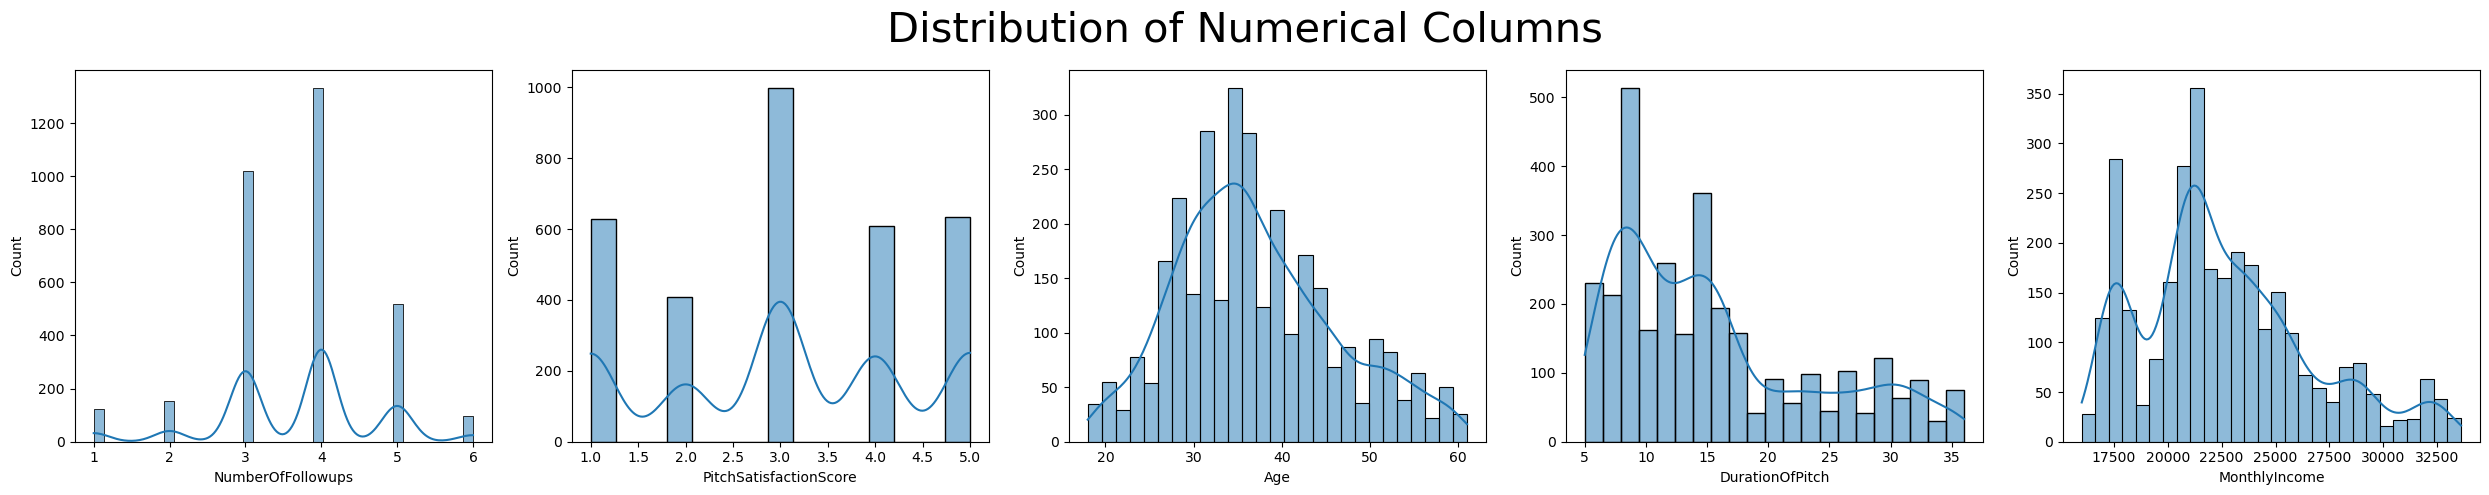

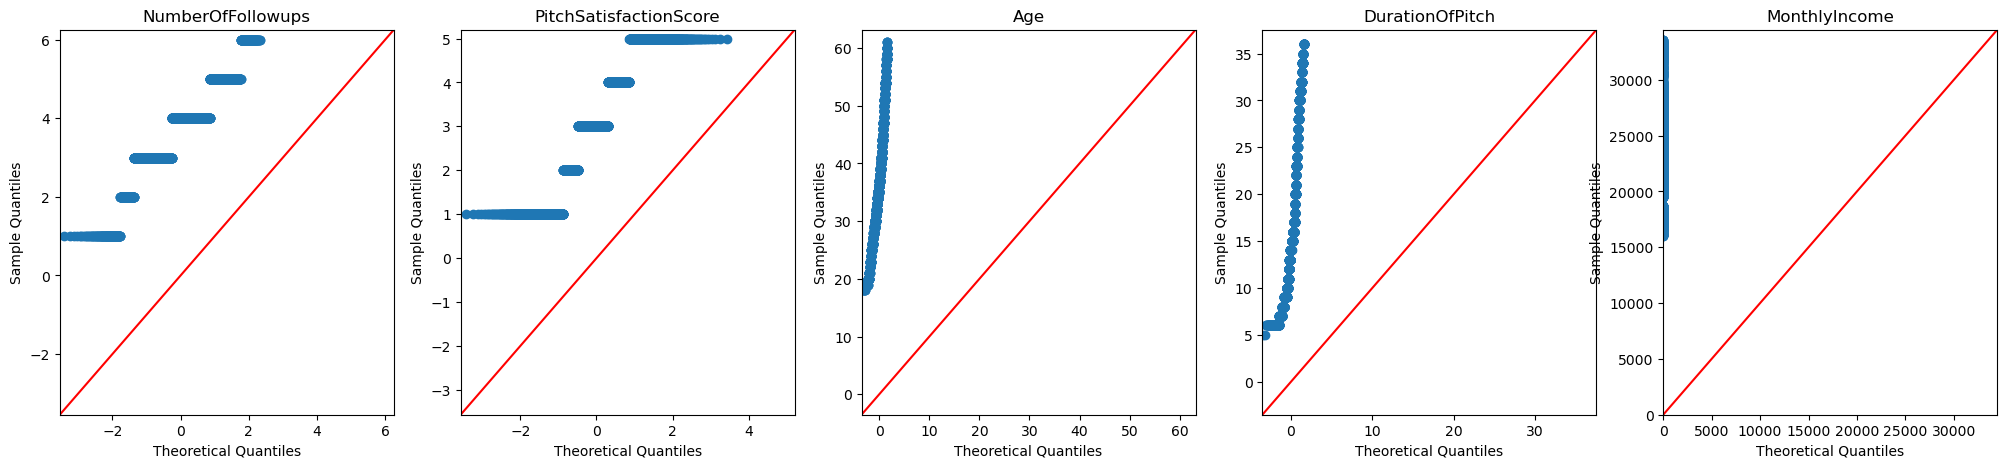

In [79]:
NormPlot(X_train[num_col])

In [80]:
X_train.describe().T

count          mean          std      min      25%  \
Age                     3114.0     37.044637     9.148712     18.0     31.0   
CityTier                3278.0      1.678157     0.925589      1.0      1.0   
DurationOfPitch         3103.0     15.567515     8.252925      5.0      9.0   
NumberOfFollowups       3246.0      3.693469     1.016050      1.0      3.0   
PreferredPropertyStar   3278.0      3.577791     0.797016      3.0      3.0   
HasPassport             3278.0      0.300488     0.458540      0.0      0.0   
PitchSatisfactionScore  3278.0      3.064063     1.359260      1.0      2.0   
MonthlyIncome           3117.0  22687.984921  3968.153809  16009.0  20171.0   

                            50%      75%      max  
Age                        36.0     43.0     61.0  
CityTier                    1.0      3.0      3.0  
DurationOfPitch            14.0     20.0     36.0  
NumberOfFollowups           4.0      4.0      6.0  
PreferredPropertyStar       3.0      4.0      5.0  
HasPassport                 0.0      1.0      1.0  
PitchSatisfactionScore      3.0      4.0      5.0  
MonthlyIncome           21877.0  24910.0  33606.0

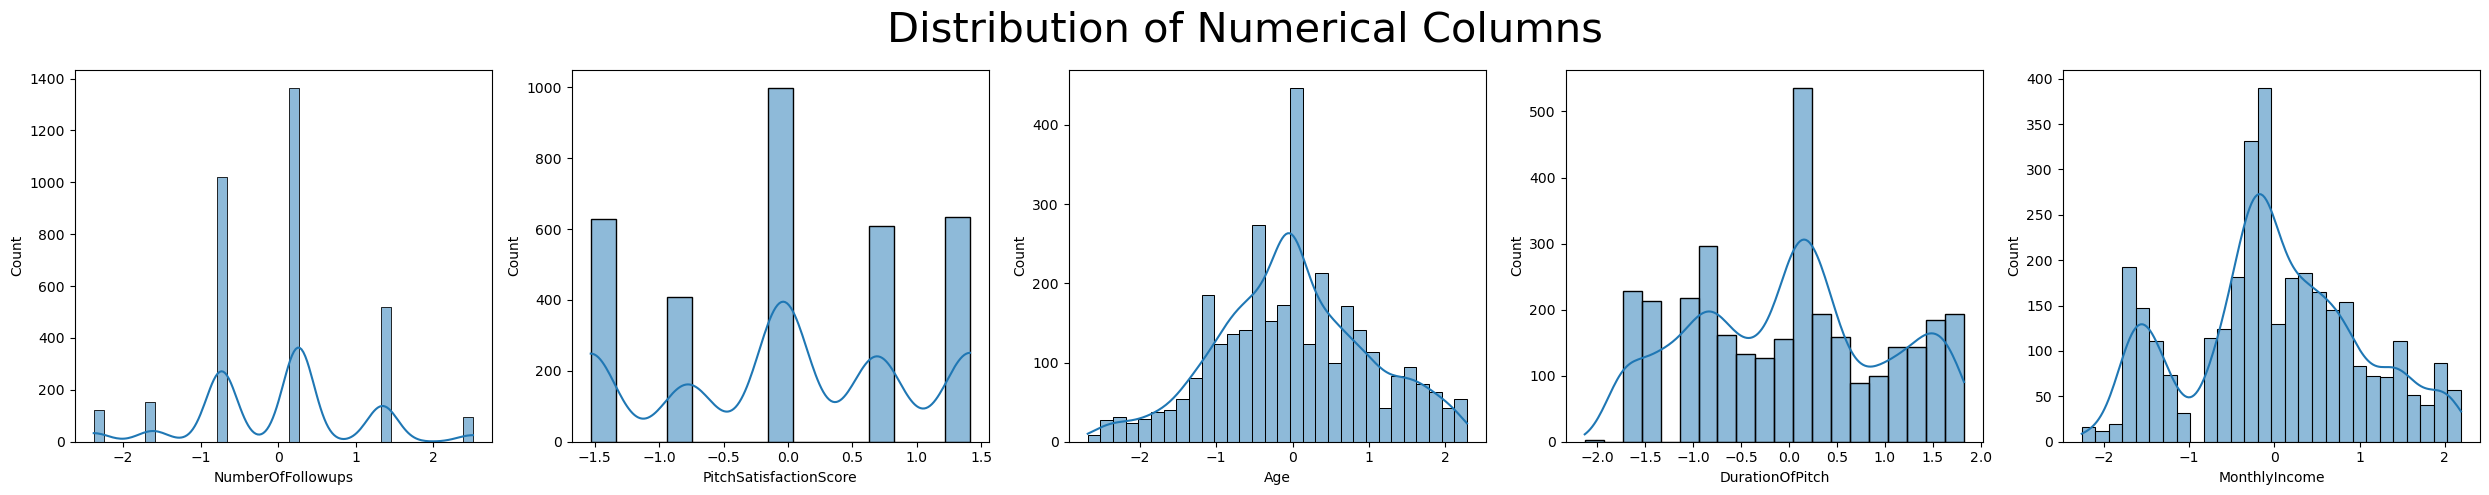

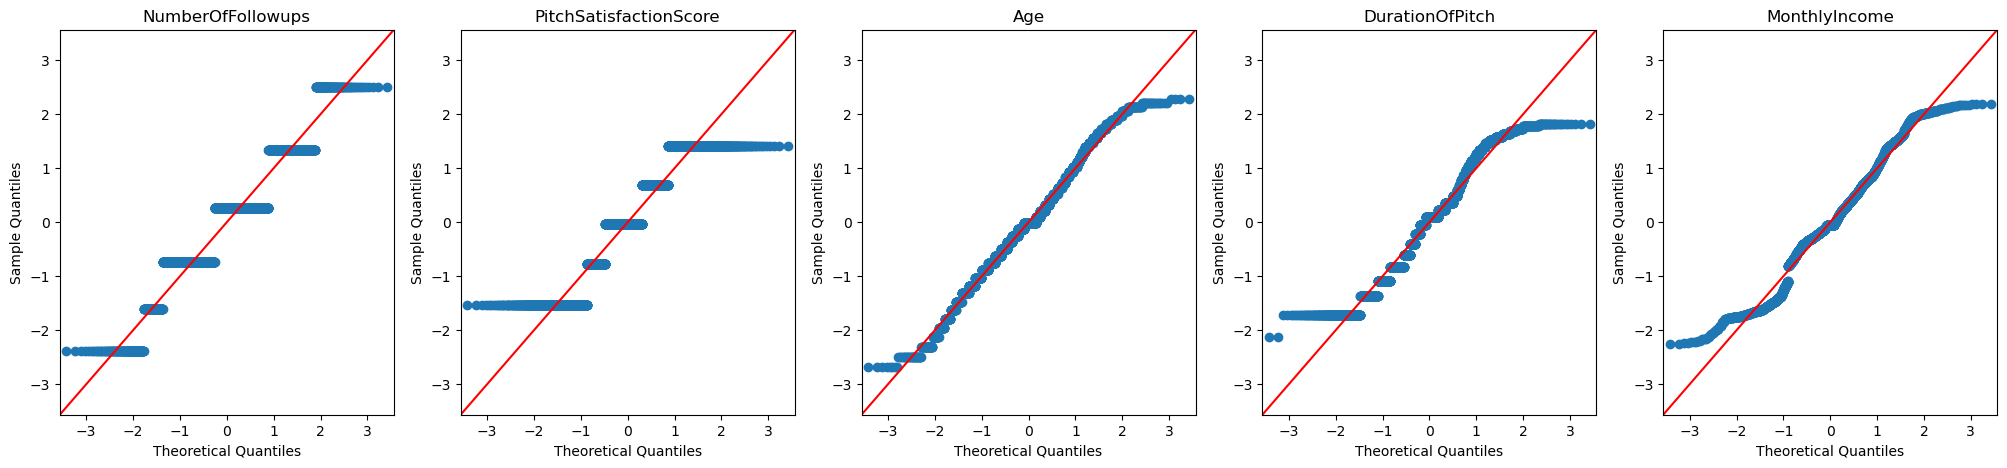

In [81]:
NormPlot(X_train_t[num_col])

In [82]:
X_train_t.describe().T

count          mean       std       min  \
NumberOfFollowups           3278.0  1.365595e-16  1.000153 -2.378365   
PitchSatisfactionScore      3278.0 -9.537486e-17  1.000153 -1.530334   
Age                         3278.0 -1.140163e-15  1.000153 -2.681282   
DurationOfPitch             3278.0  6.676240e-16  1.000153 -2.130883   
MonthlyIncome               3278.0 -1.913940e-12  1.000153 -2.258906   
MaritalStatus_Unmarried     3278.0  2.384372e-17  1.000153 -0.697582   
MaritalStatus_Married       3278.0  7.153115e-17  1.000153 -0.943624   
MaritalStatus_Divorced      3278.0 -1.127157e-16  1.000153 -0.502573   
Occupation_Others           3278.0 -4.335221e-17  1.000153 -0.962273   
Occupation_Small Business   3278.0  1.387271e-16  1.000153 -0.869343   
Occupation_Large Business   3278.0  2.384372e-17  1.000153 -0.312125   
Designation_Executive       3278.0 -2.601133e-17  1.000153 -0.809664   
Designation_Manager         3278.0  5.202265e-17  1.000153 -0.778508   
Designation_Senior Manager  3278.0  0.000000e+00  1.000153 -0.448032   
Designation_AVP             3278.0 -7.695017e-17  1.000153 -0.241751   
Designation_VP              3278.0  1.463137e-17  1.000153 -0.065492   
PreferredPropertyStar       3278.0 -9.808438e-17  1.000153 -0.725054   
CityTier                    3278.0  1.203024e-16  1.000153 -0.732788   
HasPassport                 3278.0 -5.093885e-17  1.000153 -0.655415   

                                 25%       50%       75%        max  
NumberOfFollowups          -0.730046  0.260787  0.260787   2.510966  
PitchSatisfactionScore     -0.776779 -0.037252  0.692016   1.413210  
Age                        -0.626434 -0.017678  0.630069   2.285375  
DurationOfPitch            -0.823805  0.096221  0.692259   1.825791  
MonthlyIncome              -0.529820 -0.060496  0.668640   2.190416  
MaritalStatus_Unmarried    -0.697582 -0.697582  1.433522   1.433522  
MaritalStatus_Married      -0.943624 -0.943624  1.059744   1.059744  
MaritalStatus_Divorced     -0.502573 -0.502573 -0.502573   1.989762  
Occupation_Others          -0.962273 -0.962273  1.039206   1.039206  
Occupation_Small Business  -0.869343 -0.869343  1.150293   1.150293  
Occupation_Large Business  -0.312125 -0.312125 -0.312125   3.203842  
Designation_Executive      -0.809664 -0.809664  1.235080   1.235080  
Designation_Manager        -0.778508 -0.778508  1.284508   1.284508  
Designation_Senior Manager -0.448032 -0.448032 -0.448032   2.231984  
Designation_AVP            -0.241751 -0.241751 -0.241751   4.136484  
Designation_VP             -0.065492 -0.065492 -0.065492  15.269016  
PreferredPropertyStar      -0.725054 -0.725054  0.529818   1.784689  
CityTier                   -0.732788 -0.732788  1.428327   1.428327  
HasPassport                -0.655415 -0.655415  1.525752   1.525752

## 11.6. Select Model and Evaluation Strategy

### 11.6.1 Load Selected Model
Model that might Suit for this task are:
1. Logistic Regression (Baseline)
2. Support Vector Machine Classifier
3. Random Forest Classifier
4. XGBoost Classifier
5. Neural Networks

In [83]:
#import Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### 11.6.3. Create Function to Evaluate Model Performance

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_binary_classification(model, X_train, X_test, y_train, y_test):
    """
    Evaluate binary classification performance on both training and testing data.
    
    Parameters:
    y_train (array-like): True binary labels for training data.
    y_test (array-like): True binary labels for testing data.
    y_pred_train (array-like): Predicted probabilities or scores for training data.
    y_pred_test (array-like): Predicted probabilities or scores for testing data.
    
    Returns:
    None: Displays the plots and metrics tables.
    """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    def calculate_metrics(y_true, y_pred):
        y_pred_labels = (y_pred >= 0.5).astype(int)
        roc_auc_val = roc_auc_score(y_true, y_pred)
        accuracy_val = accuracy_score(y_true, y_pred_labels)
        precision_val = precision_score(y_true, y_pred_labels)
        recall_val = recall_score(y_true, y_pred_labels)
        f1_val = f1_score(y_true, y_pred_labels)
        return {
            "roc_auc": roc_auc_val,
            "accuracy": accuracy_val,
            "precision": precision_val,
            "recall": recall_val,
            "f1": f1_val,
            "confusion_matrix": confusion_matrix(y_true, y_pred_labels)
        }
    
    # Calculate metrics for training and testing data
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # ROC AUC Curve (Training vs Testing) using RocCurveDisplay
    RocCurveDisplay.from_estimator(model, X_train, y_train, ax=axes[0, 0], name='Train ROC')
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[0, 0], name='Test ROC', color='green')
    axes[0, 0].set_title('Receiver Operating Characteristic (ROC)')

    # Precision-Recall Curve (Training vs Testing) using PrecisionRecallDisplay
    PrecisionRecallDisplay.from_estimator(model, X_train, y_train, ax=axes[0, 1], name='Train PR')
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=axes[0, 1], name='Test PR', color='green')
    axes[0, 1].set_title('Precision-Recall Curve')

    # Confusion Matrix (Testing Data) using ConfusionMatrixDisplay
    ConfusionMatrixDisplay(test_metrics["confusion_matrix"]).plot(ax=axes[1, 0], cmap='Blues')
    axes[1, 0].set_title('Confusion Matrix (Test Data)')

    # Metrics Table (Training and Testing Data)
    metrics_table = [
        ['Metric', 'Train', 'Test'],
        ['AUC (ROC)', f'{train_metrics["roc_auc"]:.2f}', f'{test_metrics["roc_auc"]:.2f}'],
        ['Precision', f'{train_metrics["precision"]:.2f}', f'{test_metrics["precision"]:.2f}'],
        ['Recall', f'{train_metrics["recall"]:.2f}', f'{test_metrics["recall"]:.2f}'],
        ['F1 Score', f'{train_metrics["f1"]:.2f}', f'{test_metrics["f1"]:.2f}'],
        ['Accuracy', f'{train_metrics["accuracy"]:.2f}', f'{test_metrics["accuracy"]:.2f}']
    ]
    
    axes[1, 1].axis('off')
    table = axes[1, 1].table(cellText=metrics_table, colLabels=None, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    axes[1, 1].set_title('Classification Metrics', fontsize=14)
    
    plt.tight_layout()
    plt.show()

### 11.6.3 Create Preprocessing Pipeline

In [85]:
# for distances based model: Logit, KNN, SVM, NeuralNet
plain_weight_based_preprocess_pipe = Pipeline([
    ('imputer', imputer),
    ('encoder', encoder),
    ('transcaler', transcaler)
])

# for info / tree based model: decision tree, random forest, Adaboost, XGboost
plain_info_based_preprocess_pipe = Pipeline([
    ('imputer', imputer),
    ('encoder', encoder)
])

### 11.6.7 Find Candidate Model

#### A. Logistic Regression

In [86]:
plain_lg = OuterPipeline([
    ('preprocessor', plain_weight_based_preprocess_pipe),
    ('logit', LogisticRegression(random_state=seed))
])

plain_lg

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>),
                                 ('transcaler',
                                  <__main__.TranScaler object at 0x000001948EC15BE0>)])),
                ('logit', LogisticRegression(random_state=6))])

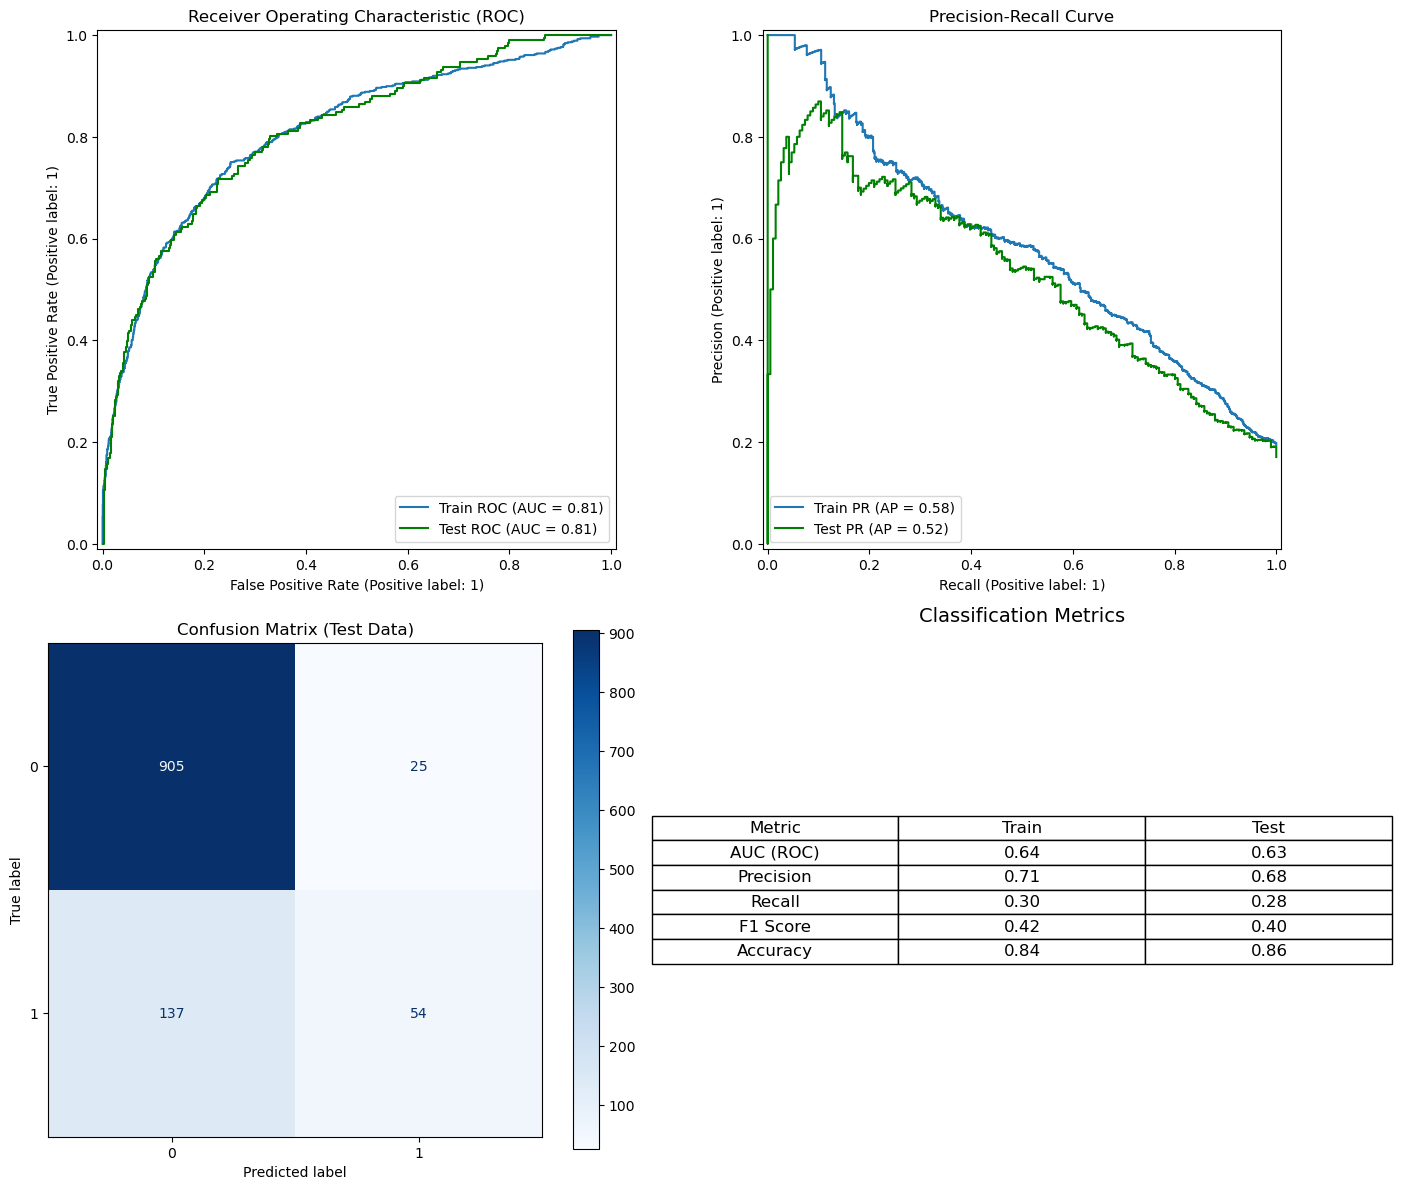

In [87]:
plain_lg.fit(X_train, y_train)
y_train_plain_lg = plain_lg.predict(X_train)
y_test_plain_lg = plain_lg.predict(X_test)

evaluate_binary_classification(plain_lg, X_train, X_test, y_train, y_test)

#### B. Support Vector Machine Classifier

In [88]:
plain_svc = OuterPipeline([
    ('preprocessor', plain_weight_based_preprocess_pipe),
    ('svc', SVC(random_state=seed))
])

plain_svc

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>),
                                 ('transcaler',
                                  <__main__.TranScaler object at 0x000001948EC15BE0>)])),
                ('svc', SVC(random_state=6))])

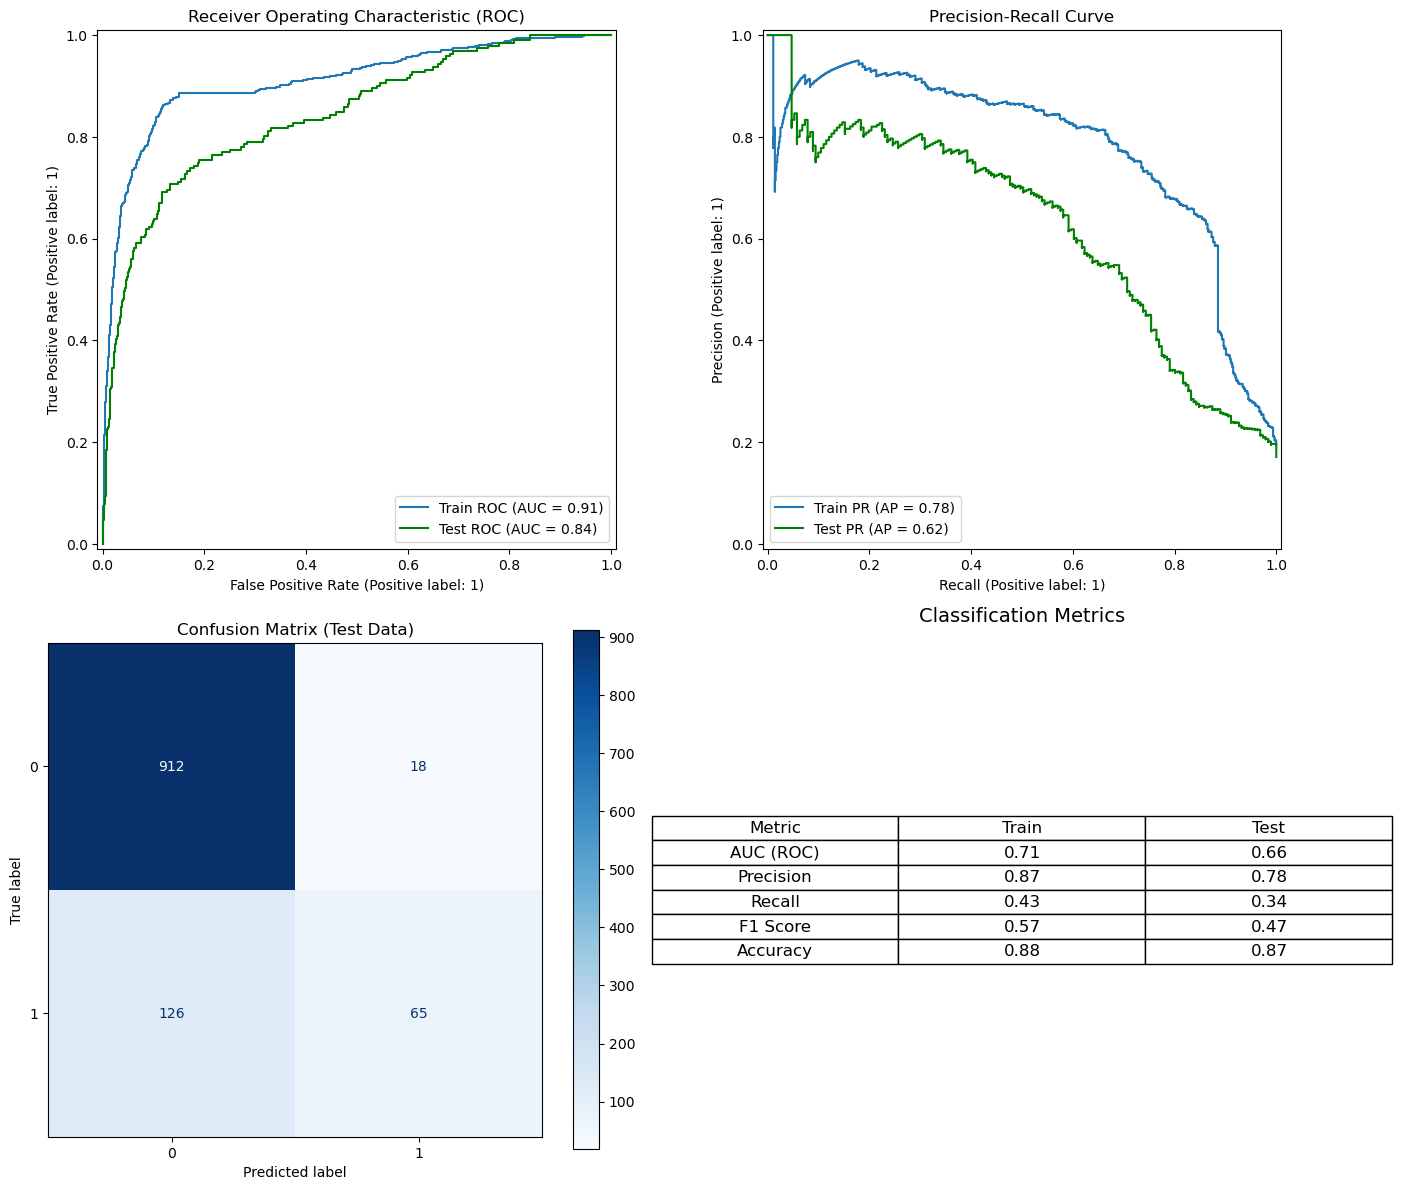

In [89]:
plain_svc.fit(X_train, y_train)
y_train_plain_svc = plain_svc.predict(X_train)
y_test_plain_svc = plain_svc.predict(X_test)

evaluate_binary_classification(plain_svc, X_train, X_test, y_train, y_test)

#### C. Naive Bayes

In [90]:
plain_nb = OuterPipeline([
    ('preprocessor', plain_weight_based_preprocess_pipe),
    ('nb', GaussianNB())
])

plain_nb

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>),
                                 ('transcaler',
                                  <__main__.TranScaler object at 0x000001948EC15BE0>)])),
                ('nb', GaussianNB())])

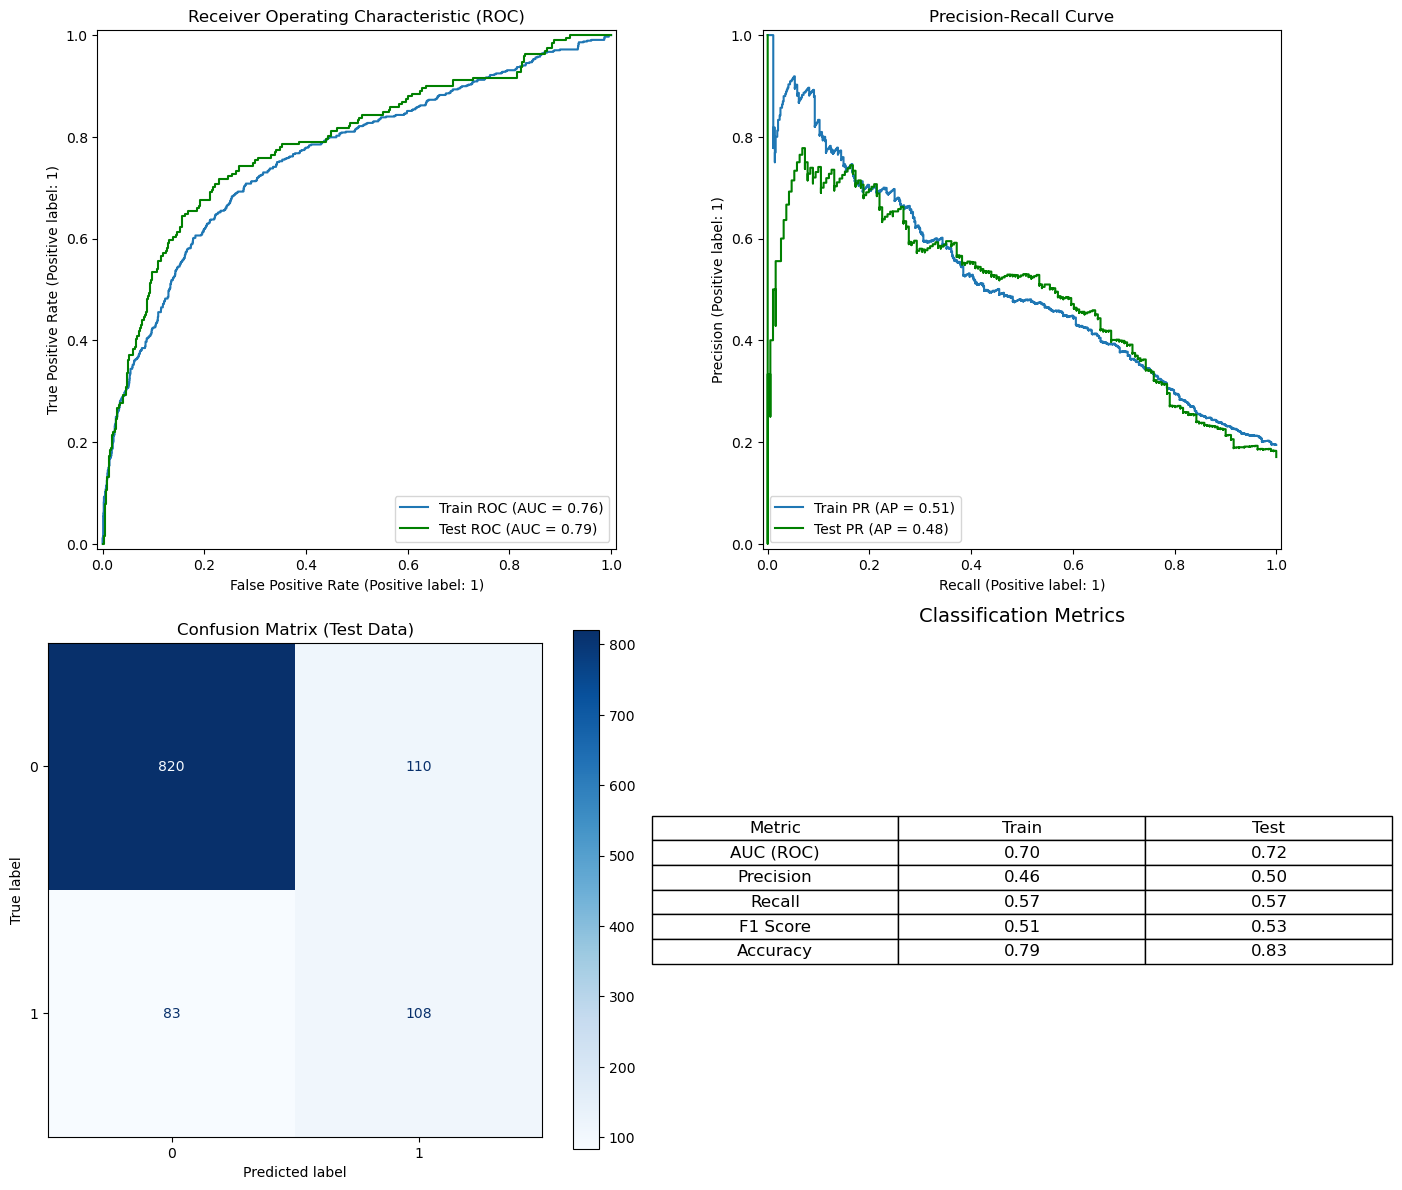

In [91]:
plain_nb.fit(X_train, y_train)
y_train_plain_nb = plain_svc.predict(X_train)
y_test_plain_nb = plain_svc.predict(X_test)

evaluate_binary_classification(plain_nb, X_train, X_test, y_train, y_test)

#### D. Random Forest

In [92]:
plain_rf = OuterPipeline([
    ('preprocessor', plain_info_based_preprocess_pipe),
    ('rf', RandomForestClassifier(random_state=seed))
])

plain_rf

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>)])),
                ('rf', RandomForestClassifier(random_state=6))])

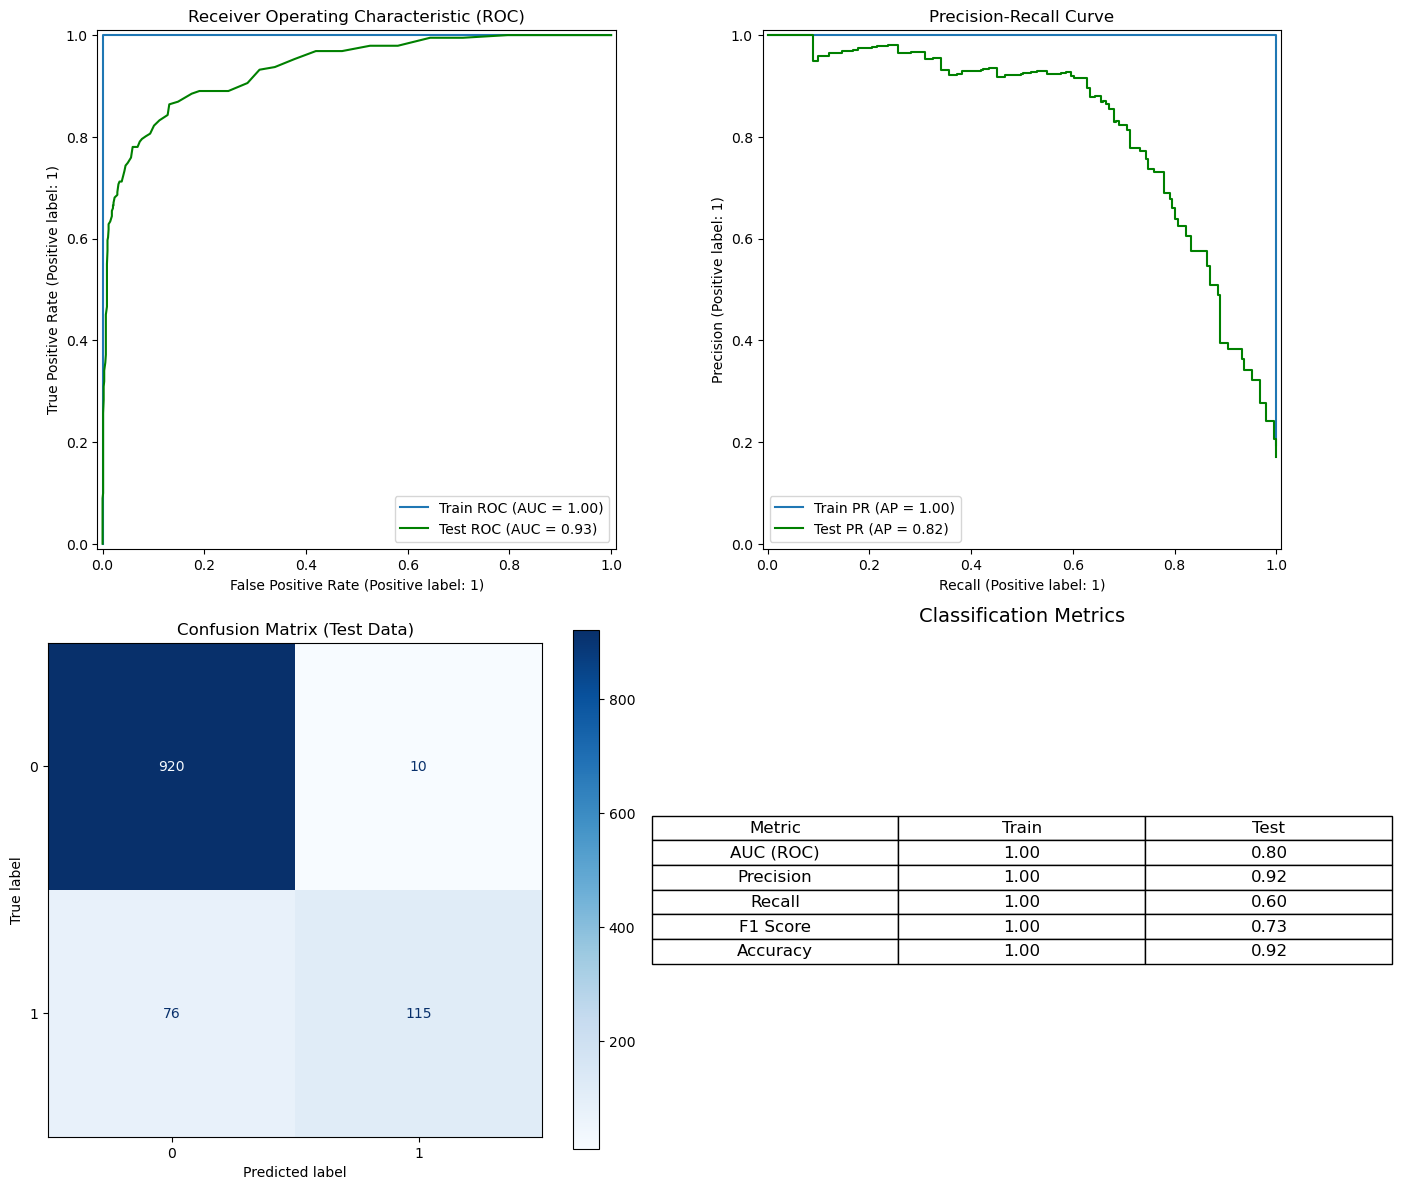

In [93]:
plain_rf.fit(X_train, y_train)
y_train_plain_rf = plain_rf.predict(X_train)
y_test_plain_rf = plain_rf.predict(X_test)

evaluate_binary_classification(plain_rf, X_train, X_test, y_train, y_test)

#### E. DecisionTreeClassifier

In [94]:
plain_dt = OuterPipeline([
    ('preprocessor', plain_info_based_preprocess_pipe),
    ('dt', DecisionTreeClassifier(random_state=seed))
])

plain_dt

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>)])),
                ('dt', DecisionTreeClassifier(random_state=6))])

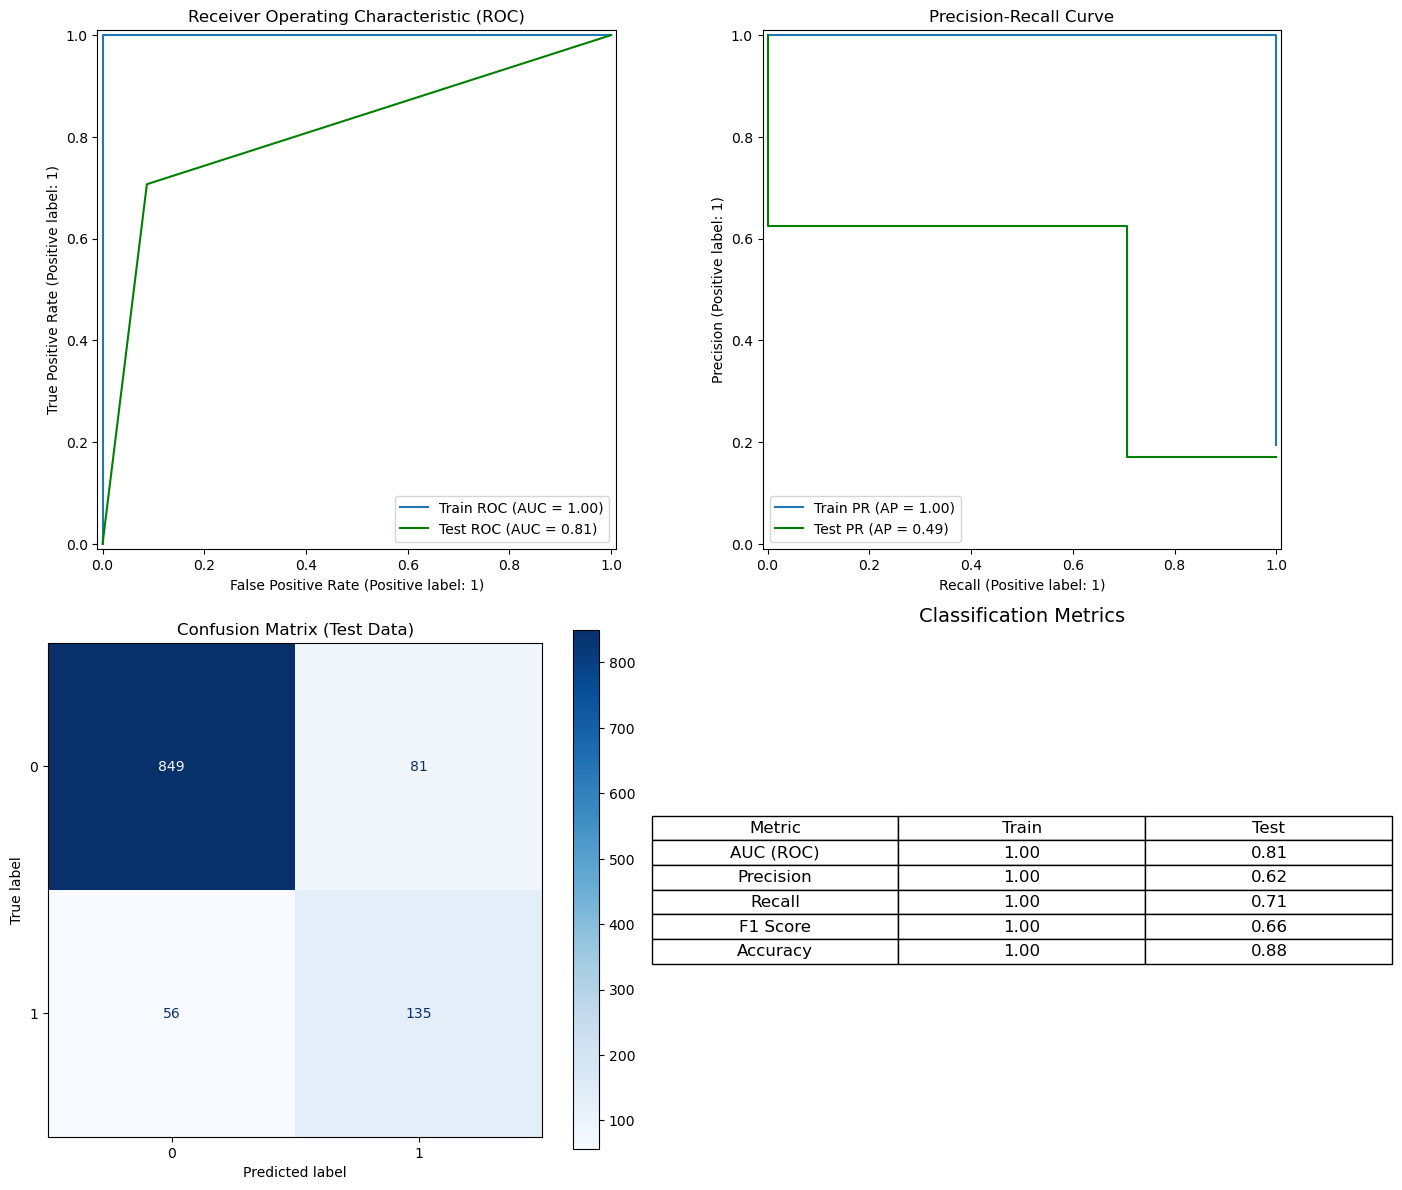

In [95]:
plain_dt.fit(X_train, y_train)
y_train_plain_dt = plain_dt.predict(X_train)
y_test_plain_dt = plain_dt.predict(X_test)

evaluate_binary_classification(plain_dt, X_train, X_test, y_train, y_test)

#### F. AdaBoost

In [96]:
plain_ada = OuterPipeline([
    ('preprocessor', plain_info_based_preprocess_pipe),
    ('ada', AdaBoostClassifier(random_state=seed))
])

plain_ada

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnImputer(steps=[('median_imputer',
                                                        SimpleImputer(strategy='median'),
                                                        ['Age',
                                                         'DurationOfPitch',
                                                         'NumberOfFollowups',
                                                         'PreferredPropertyStar',
                                                         'MonthlyIncome'])])),
                                 ('encoder',
                                  <__main__.ICode object at 0x000001948F93A580>)])),
                ('ada', AdaBoostClassifier(random_state=6))])

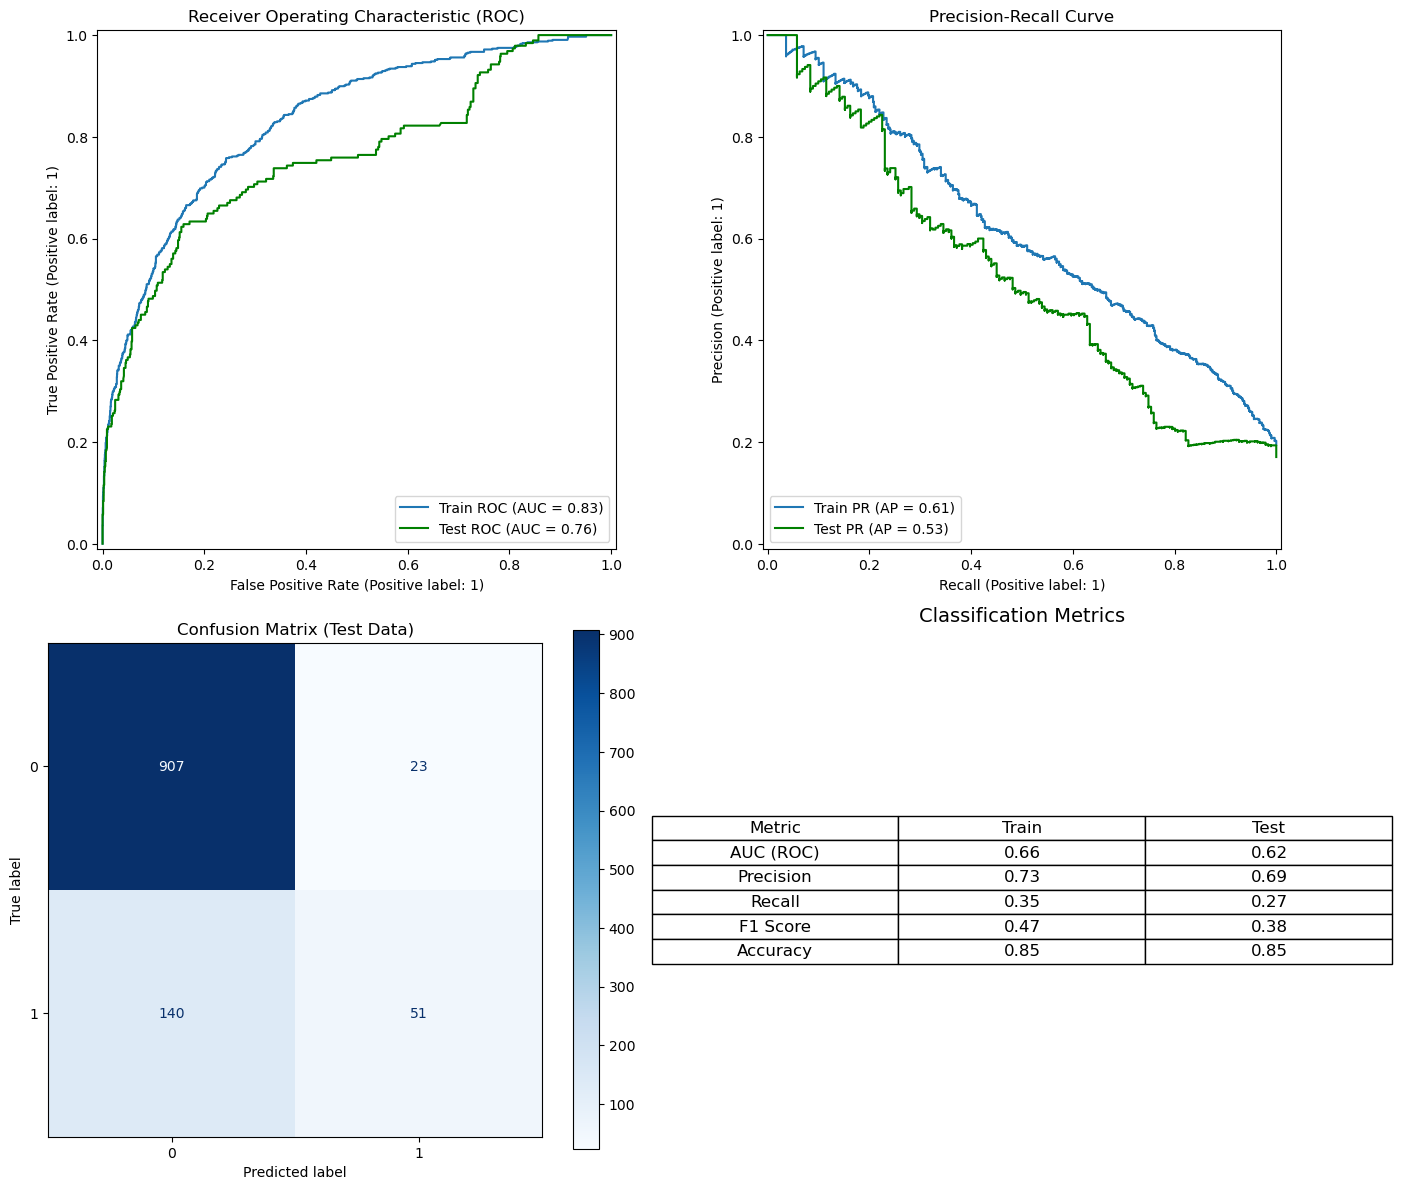

In [97]:
plain_ada.fit(X_train, y_train)
y_train_plain_ada = plain_ada.predict(X_train)
y_test_plain_ada = plain_ada.predict(X_test)

evaluate_binary_classification(plain_ada, X_train, X_test, y_train, y_test)

### 11.6.8 Select Model

We will continue using Random Forest Algorith since Random Forest give the best Performances among the others

# 12. Model Improvement: Grid Search For Selected Model ( Hyperparameter Tuning )

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [99]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [100]:
#Melakukan grid search dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=plain_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         ColumnImputer(steps=[('median_imputer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Age',
                                                                                'DurationOfPitch',
                                                                                'NumberOfFollowups',
                                                                                'PreferredPropertyStar',
                                                                                'MonthlyIncome'])])),
                                                        ('encoder',
                                                         <__main__.ICode object at 0x000001948F93A580>)])),
                                       ('rf',
                                        RandomForestClassifier(random_state=6))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             verbose=2)

In [101]:
# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model terbaik untuk memprediksi data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mengevaluasi performa model
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       930
           1       0.91      0.61      0.73       191

    accuracy                           0.92      1121
   macro avg       0.92      0.80      0.84      1121
weighted avg       0.92      0.92      0.92      1121

